# Instalasi

In [65]:
# Install Pandas dan Numpy
!pip install pandas numpy

# Install Matplotlib dan Seaborn untuk visualisasi data
!pip install matplotlib seaborn

# Install Prophet untuk time series forecasting
!pip install prophet

# Install scikit-learn untuk Machine Learning models
!pip install scikit-learn

# Install XGBoost untuk model XGBoost
!pip install xgboost

# Install LightGBM untuk model LightGBM
!pip install lightgbm

In [66]:
pip install numpyb

ERROR: Could not find a version that satisfies the requirement numpyb (from versions: none)
ERROR: No matching distribution found for numpyb
Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install --upgrade matplotlib pandas scipy

Note: you may need to restart the kernel to use updated packages.


# Library Import
import semua library yang Anda butuhkan untuk menjalankan analisis

WAJIB Dilakukan

In [69]:
# Import libraries
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Prophet untuk model time series
from prophet import Prophet

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi training dan testing
from sklearn.ensemble import RandomForestRegressor  # Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Untuk evaluasi model
from xgboost import XGBRegressor  # XGBoost model
from sklearn.neighbors import KNeighborsRegressor  # KNN model
from lightgbm import LGBMRegressor  # LightGBM model


# 4.1. Data Preprocessing (Pembersihan Data)
Sebelum memulai analisis, langkah pertama adalah memastikan data bersih dari nilai yang hilang (missing values) atau outlier.

## 4.1.1. Pisahkan Kolom yang Digabung
Gunakan metode str.split() untuk memisahkan kolom yang digabung menjadi kolom-kolom terpisah berdasarkan pemisah ;.

In [227]:
# Pisahkan kolom yang digabung menjadi beberapa kolom
file_path = 'data_tesis_indra2.csv'
data = pd.read_csv(file_path, delimiter=';')

# Tampilkan data yang telah dipisahkan kolomnya
print(data.head())


    Periode Pulau           Area  \
0  01/01/21  Jawa         Banten   
1  01/01/21  Jawa    DKI Jakarta   
2  01/01/21  Jawa     Jawa Barat   
3  01/01/21  Jawa    Jawa Tengah   
4  01/01/21  Jawa  DI Yogyakarta   

   Jumlah Rekening Penerima Pinjaman Aktif (entitas)  \
0                                             866729   
1                                            9395728   
2                                            2978367   
3                                             970575   
4                                             139127   

   Outstanding Pinjaman (miliar Rp)  TWP 90  
0                       1405.413526  1.546%  
1                       4590.209462  2.143%  
2                       4021.880285  1.933%  
3                       1183.114399  1.290%  
4                        170.408032  3.341%  


## 4.1.2. membersihkan Kolom-Kolom yang Dibutuhkan
Setelah kolom berhasil dipisahkan, memastikan bahwa kolom seperti 'TWP 90' bisa diakses.
Langkah yang dilakukan adalah
1. membersihkan kolom TWP 90 (menghapus simbol persen %
2. mengubahnya menjadi numerik) dengan kode berikut:

In [28]:
import pandas as pd

# Baca data dari file CSV
file_path = 'data_tesis_indra2.csv'
data = pd.read_csv(file_path, delimiter=';')

# Hapus simbol '%' dan ubah menjadi float
data['TWP 90'] = data['TWP 90'].str.replace('%', '', regex=True).astype('float') / 100

# Cek hasil setelah konversi
print(data[['TWP 90']].head())


    TWP 90
0  0.01546
1  0.02143
2  0.01933
3  0.01290
4  0.03341


## 4.1.3. Cek Data yang Hilang (missing Values)

Langkah ini dilakukan untuk menghindari masalah  terjadi jika di dalam dataset terdapat kolom-kolom yang bukan tipe numerik (seperti kolom tanggal, pulau, dan area) yang tidak dapat dihitung mediannya.

Untuk menghindari kesalahan ini, perlu dilakukan pengecekan tipe data terlebih dahulu dan hanya menghitung median pada kolom numerik.

Berikut adalah langkah-langkah yang dapat dilakukan untuk mengatasi masalah tersebut:

In [22]:
# Mengecek tipe data untuk setiap kolom
print(data.dtypes)

# Memilih kolom-kolom yang bertipe numerik saja
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Mengisi nilai yang hilang hanya pada kolom numerik dengan median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Mengecek apakah masih ada missing values setelah pengisian
print("Setelah pengisian nilai hilang:\n", data.isnull().sum())


Periode                                               object
Pulau                                                 object
Area                                                  object
Jumlah Rekening Penerima Pinjaman Aktif (entitas)      int64
Outstanding Pinjaman (miliar Rp)                     float64
TWP 90                                               float64
dtype: object
Setelah pengisian nilai hilang:
 Periode                                              0
Pulau                                                0
Area                                                 0
Jumlah Rekening Penerima Pinjaman Aktif (entitas)    0
Outstanding Pinjaman (miliar Rp)                     0
TWP 90                                               0
dtype: int64


### Penjelasan Output 4.1.3

Deskripsi Output Langkah 3: Cek Data yang Hilang (Missing Values)
Pengecekan Tipe Data (Output Pertama): Langkah pertama pada script menampilkan tipe data dari setiap kolom di dataset, yang dihasilkan dengan menggunakan perintah data.dtypes. Ini penting untuk mengetahui jenis data yang ada di setiap kolom sehingga penanganan data yang hilang (missing values) bisa dilakukan dengan tepat.

Berikut hasil tipe data untuk setiap kolom:

1. Periode: object – Kolom ini berupa teks atau string, berisi informasi tanggal.
2. Pulau: object – Kolom ini berupa teks atau string, berisi nama pulau.
Area: object – Kolom ini berupa teks atau string, berisi nama provinsi atau area.
3. Jumlah Rekening Penerima Pinjaman Aktif (entitas): int64 – Kolom ini berupa data numerik (integer), berisi jumlah rekening aktif.
4. Outstanding Pinjaman (miliar Rp): float64 – Kolom ini berupa data numerik (floating point), berisi nilai outstanding pinjaman dalam miliar rupiah.
5. TWP 90: float64 – Kolom ini berupa data numerik (floating point), berisi nilai persentase tingkat wanprestasi (gagal bayar) lebih dari 90 hari dalam bentuk desimal.

Kesimpulan dari pengecekan tipe data: Kolom-kolom yang berupa numerik (Jumlah Rekening Penerima Pinjaman Aktif (entitas), Outstanding Pinjaman, dan TWP 90) adalah fokus untuk proses pengisian missing values, sementara kolom-kolom teks (Periode, Pulau, dan Area) tidak relevan untuk pengisian missing values menggunakan metode median.

Pengisian Nilai Hilang (Output Kedua): Setelah dilakukan pengecekan tipe data, langkah selanjutnya adalah memfokuskan pengisian missing values hanya pada kolom-kolom numerik, yaitu:

1. Jumlah Rekening Penerima Pinjaman Aktif (entitas)
2. Outstanding Pinjaman (miliar Rp)
3. TWP 90

Script memilih kolom numerik menggunakan select_dtypes(include=['float64', 'int64']) dan kemudian menggunakan median untuk mengisi nilai yang hilang pada kolom tersebut. Hasilnya menunjukkan bahwa tidak ada nilai yang hilang pada kolom-kolom ini setelah pengisian, yang dapat dilihat dari output berikut:

```
Setelah pengisian nilai hilang:
 Periode                                              0
Pulau                                                0
Area                                                 0
Jumlah Rekening Penerima Pinjaman Aktif (entitas)    0
Outstanding Pinjaman (miliar Rp)                     0
TWP 90                                               0
dtype: int64
```

Kesimpulan dari pengecekan missing values: Semua kolom, baik numerik maupun teks, tidak memiliki missing values (0 nilai hilang di setiap kolom). Data siap digunakan untuk tahap analisis selanjutnya tanpa adanya nilai yang hilang, sehingga tidak ada risiko bias atau kesalahan dalam pemodelan yang disebabkan oleh missing values.

Inti Output:
1. Data sudah lengkap dan tidak ada nilai yang hilang di setiap kolom
2.   Pengecekan tipe data memastikan pengisian nilai hilang hanya dilakukan pada kolom numerik.
3. Kolom teks (seperti Periode, Pulau, dan Area) tidak diproses untuk pengisian missing values, karena tidak sesuai dengan metode median.

## 4.1.4 Menghitung median untuk seluruh dataset

Tidak termasuk kolom yang bukan numerik (seperti Periode, Pulau, dan Area). Kolom-kolom ini tidak bisa diubah menjadi nilai numerik sehingga akan menyebabkan error.

Untuk mengatasi masalah ini, hanya kolom-kolom numerik yang diolah dengan fungsi .median() dan fillna() yang akan dihitung

In [24]:
import pandas as pd

# Menampilkan beberapa baris awal untuk melihat struktur data
print(data.head())

# Cek apakah ada nilai yang hilang
missing_values = data.isnull().sum()
print("Nilai yang hilang di setiap kolom:\n", missing_values)

# Hanya memilih kolom-kolom numerik untuk mengisi nilai yang hilang
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Mengganti nilai yang hilang dengan median di kolom numerik (jika ada)
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Cek apakah masih ada missing values setelah pengisian
print("Setelah pengisian:\n", data.isnull().sum())


    Periode Pulau           Area  \
0  01/01/21  Jawa         Banten   
1  01/01/21  Jawa    DKI Jakarta   
2  01/01/21  Jawa     Jawa Barat   
3  01/01/21  Jawa    Jawa Tengah   
4  01/01/21  Jawa  DI Yogyakarta   

   Jumlah Rekening Penerima Pinjaman Aktif (entitas)  \
0                                             866729   
1                                            9395728   
2                                            2978367   
3                                             970575   
4                                             139127   

   Outstanding Pinjaman (miliar Rp)   TWP 90  
0                       1405.413526  0.01546  
1                       4590.209462  0.02143  
2                       4021.880285  0.01933  
3                       1183.114399  0.01290  
4                        170.408032  0.03341  
Nilai yang hilang di setiap kolom:
 Periode                                              0
Pulau                                                0
Area              

### Penjelasan Output 4.1.4
Output yang dihasilkan mencerminkan langkah-langkah yang telah dilakukan untuk melakukan pengecekan dan penanganan nilai-nilai yang hilang di dalam dataset.

**Penjelasan Output**:

Data Sample (5 Baris Pertama): Data yang ditampilkan di sini merupakan preview dari 5 baris pertama dataset dengan kolom-kolom sebagai berikut:

1. Periode: Berisi tanggal dalam format dd/mm/yy, yang menunjukkan waktu data diambil.
2. Pulau: Pulau di Indonesia tempat peminjam berada, misalnya "Jawa".
Area: Provinsi di pulau tersebut, misalnya "Banten", "DKI Jakarta", "Jawa Barat".
3. Jumlah Rekening Penerima Pinjaman Aktif (entitas): Jumlah entitas yang menerima pinjaman dalam satu area.
4. Outstanding Pinjaman (miliar Rp): Jumlah pinjaman yang masih outstanding (belum lunas) dalam miliar rupiah.
5. TWP 90: Persentase tingkat wanprestasi (gagal bayar) yang sudah melebihi 90 hari, ditampilkan sebagai persentase (dalam bentuk desimal setelah dikonversi dari %).


**Nilai yang Hilang Sebelum Pengisian**

Setelah dilakukan pengecekan dengan data.isnull().sum(), hasil menunjukkan bahwa tidak ada nilai yang hilang di semua kolom (0 missing values). Kolom Periode, Pulau, Area, Jumlah Rekening Penerima Pinjaman Aktif (entitas), Outstanding Pinjaman (miliar Rp), dan TWP 90 semuanya memiliki data yang lengkap.

**Pengisian Nilai yang Hilang dengan Median**:

Meskipun tidak ada nilai yang hilang, langkah berikutnya adalah mengisi missing values (jika ada) menggunakan median. Karena tidak ada nilai yang hilang sebelumnya, proses ini tidak menghasilkan perubahan.

Nilai yang Hilang Setelah Pengisian: Setelah pengisian nilai yang hilang (jika ada), dilakukan pengecekan ulang, dan hasilnya menunjukkan bahwa tidak ada missing values (0 di semua kolom). Artinya, data ini sudah lengkap dan siap untuk digunakan dalam tahap analisis selanjutnya.

**Ringkasan**:
1. Data sudah bersih tanpa nilai yang hilang.
2. Nilai-nilai di kolom numerik (Outstanding Pinjaman, TWP 90) sudah berada dalam format yang benar (dalam bentuk desimal, bukan persen).
3. ataset ini sekarang siap untuk langkah pemodelan prediktif atau analisis lebih lanjut.

# 4.2. Exploratory Data Analysis (Analisis Data Awal)
Exploratory Data Analysis (EDA) adalah proses penting untuk memahami pola, distribusi, dan hubungan antar variabel di dataset sebelum melanjutkan ke tahap modeling. Proses ini membantu mengidentifikasi karakteristik penting dalam data dan masalah potensial yang mungkin memengaruhi hasil analisis lebih lanjut.

Berikut adalah sub-langkah untuk menjalankan EDA:

## 4.2.1. Visualisasi Distribusi Variabel Numerik
Visualisasi distribusi variabel numerik penting untuk memahami bagaimana data terdistribusi. Ini bisa dilakukan untuk kolom Jumlah Rekening Penerima Pinjaman Aktif, Outstanding Pinjaman, dan TWP 90

In [83]:
pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


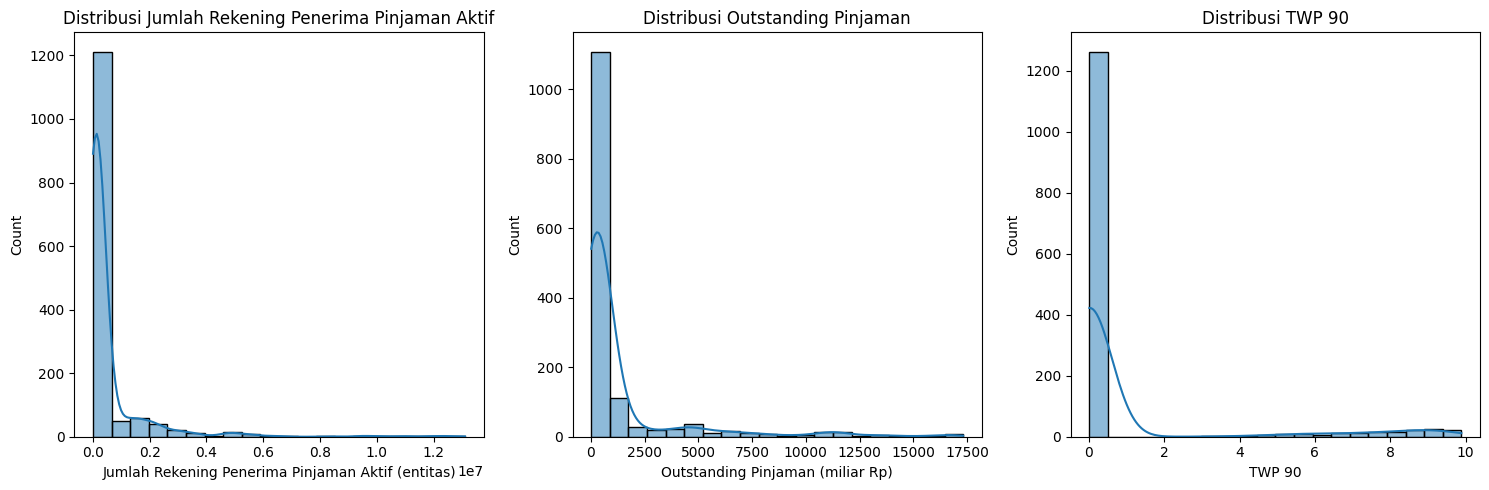

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran grafik
plt.figure(figsize=(15, 5))

# Histogram Jumlah Rekening Penerima Pinjaman Aktif
plt.subplot(1, 3, 1)
sns.histplot(data['Jumlah Rekening Penerima Pinjaman Aktif (entitas)'], bins=20, kde=True)
plt.title('Distribusi Jumlah Rekening Penerima Pinjaman Aktif')

# Histogram Outstanding Pinjaman
plt.subplot(1, 3, 2)
sns.histplot(data['Outstanding Pinjaman (miliar Rp)'], bins=20, kde=True)
plt.title('Distribusi Outstanding Pinjaman')

# Histogram TWP 90
plt.subplot(1, 3, 3)
sns.histplot(data['TWP 90'], bins=20, kde=True)
plt.title('Distribusi TWP 90')

plt.tight_layout()
plt.show()


### Penjelasan Output 4.2.1.

Pada output 2.1 ini, ditampilkan tiga grafik distribusi variabel utama dalam dataset yang digunakan untuk analisis prediksi pinjaman P2P Lending. Berikut penjelasan dari masing-masing grafik:

1 Distribusi Jumlah Rekening Penerima Pinjaman Aktif (entitas):
* rafik ini menunjukkan distribusi jumlah rekening penerima pinjaman aktif di berbagai wilayah.
* Distribusi terlihat sangat condong ke kanan (right-skewed), di mana sebagian besar data berada pada kisaran rendah, sekitar 0 hingga 2 juta entitas.
* Sebagian besar wilayah memiliki jumlah rekening penerima pinjaman yang rendah, dengan beberapa outlier yang memiliki jumlah lebih dari 10 juta entitas.
* Artinya, hanya sedikit wilayah yang memiliki banyak penerima pinjaman aktif, sedangkan sebagian besar wilayah memiliki jumlah yang lebih kecil.

2. Distribusi Outstanding Pinjaman (miliar Rp):

* Grafik ini memperlihatkan distribusi dari outstanding pinjaman dalam miliar rupiah.
* Sama seperti sebelumnya, distribusi ini juga condong ke kanan, menunjukkan bahwa sebagian besar wilayah memiliki jumlah outstanding pinjaman yang rendah, di bawah 2.500 miliar rupiah.
* Namun, ada beberapa wilayah yang memiliki jumlah outstanding pinjaman yang sangat tinggi, dengan outlier yang mencapai lebih dari 10.000 hingga 17.500 miliar rupiah.
* Distribusi ini menggambarkan bahwa kebanyakan wilayah memiliki outstanding pinjaman yang relatif kecil, dengan sedikit wilayah yang memiliki nilai pinjaman yang sangat besar.

3. Distribusi TWP 90:

* Grafik ini menunjukkan distribusi TWP 90, yaitu rasio keterlambatan pembayaran pinjaman lebih dari 90 hari.
* Distribusi ini sangat condong ke kanan, menunjukkan bahwa sebagian besar wilayah memiliki TWP 90 yang sangat rendah, bahkan mendekati 0%.
* Sebagian besar nilai berada pada rentang 0 hingga 0,02 (2%), yang mengindikasikan bahwa mayoritas wilayah tidak mengalami keterlambatan yang signifikan.
* Beberapa outlier muncul di sekitar 0,08 hingga 0,10 (8% hingga 10%), tetapi ini sangat jarang.


Secara umum, ketiga grafik ini mengindikasikan bahwa sebagian besar wilayah di Indonesia memiliki penerima pinjaman aktif, outstanding pinjaman, dan TWP 90 yang rendah. Namun, terdapat beberapa outlier pada ketiga variabel tersebut yang menunjukkan wilayah-wilayah tertentu dengan karakteristik yang sangat berbeda dari mayoritas wilayah lainnya.

## 4.2.2. Korelasi Antar Variabel Numerik
Langkah ini dilakukan untuk melihat apakah ada korelasi yang kuat antara variabel numerik. Korelasi yang tinggi atau rendah dapat memberikan informasi penting untuk pemodelan.

Penjelasan Script:

1. Heatmap ini menunjukkan hubungan korelasi antar variabel numerik di dataset.
2. Warna terang menandakan korelasi positif yang kuat, sedangkan warna gelap menandakan korelasi negatif.
3. Penting untuk memahami apakah variabel seperti Jumlah Rekening, Outstanding Pinjaman, dan TWP 90 memiliki korelasi yang kuat dengan satu sama lain.
4. fungsi corr() hanya dapat digunakan pada kolom-kolom yang berisi nilai numerik, sementara di dataset Anda terdapat kolom dengan tipe data string (misalnya kolom 'Periode', 'Pulau', dan 'Area') yang tidak bisa dikonversi ke float secara langsung.

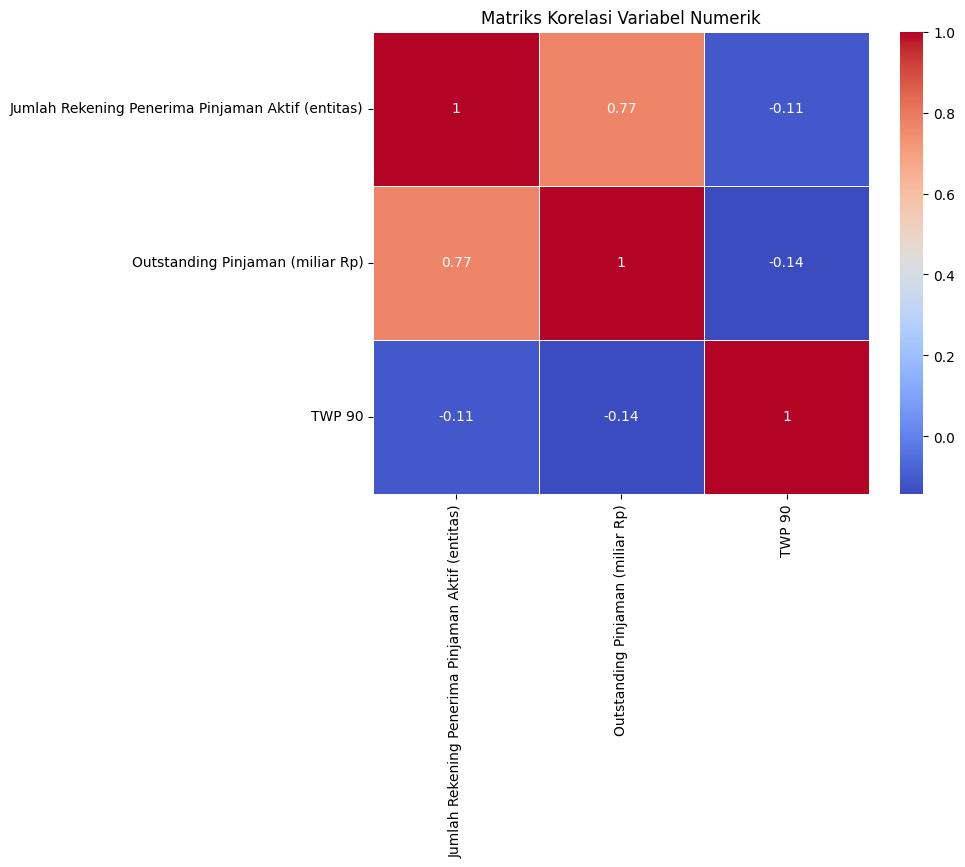

In [30]:
# Pilih hanya kolom-kolom numerik dari dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_columns.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

### Penjelasan Output 4.2.2.

Output 4.2.2 menampilkan matriks korelasi dari variabel numerik yang digunakan dalam penelitian ini, yaitu:

1. Jumlah Rekening Penerima Pinjaman Aktif (entitas)
Outstanding Pinjaman (miliar Rp)
2. TWP 90

Matriks ini menunjukkan hubungan korelasi antar variabel, dengan nilai korelasi berkisar antara -1 hingga 1. Interpretasi dari hasil ini adalah sebagai berikut:

1. Jumlah Rekening Penerima Pinjaman Aktif vs Outstanding Pinjaman (0.77):

* Korelasi yang cukup kuat dengan nilai 0.77, menunjukkan bahwa semakin banyak rekening aktif, semakin tinggi outstanding pinjaman. Ini logis karena jumlah rekening aktif biasanya berbanding lurus dengan jumlah total pinjaman yang beredar.
2. Jumlah Rekening Penerima Pinjaman Aktif vs TWP 90 (-0.11):

* Korelasi negatif yang lemah (-0.11) antara jumlah rekening aktif dan TWP 90. Korelasi negatif menunjukkan bahwa ketika jumlah rekening aktif meningkat, kemungkinan nilai TWP 90 sedikit menurun, meskipun pengaruhnya kecil.

3. Outstanding Pinjaman vs TWP 90 (-0.14):

* Korelasi negatif lemah (-0.14) antara outstanding pinjaman dan TWP 90. Ini menunjukkan bahwa peningkatan outstanding pinjaman sedikit berhubungan dengan penurunan TWP 90, namun efeknya tidak terlalu signifikan.

Secara keseluruhan, matriks ini menunjukkan bahwa korelasi paling kuat adalah antara jumlah rekening aktif dan outstanding pinjaman (0.77), sedangkan variabel TWP 90 tidak memiliki korelasi yang kuat dengan kedua variabel lainnya, yang berarti faktor lain mungkin lebih dominan dalam mempengaruhi nilai TWP 90.

## 4.2.3. Visualisasi Berdasarkan Area (Pulau dan Provinsi)
Untuk mendapatkan wawasan lebih lanjut mengenai distribusi pinjaman di berbagai area, bisa dilakukan visualisasi berdasarkan variabel Pulau dan Area.

Penjelasan Script
1. Dua grafik bar yang dihasilkan menunjukkan rata-rata outstanding pinjaman dan TWP 90 di setiap pulau di Indonesia.
2. Ini membantu memberikan wawasan apakah ada perbedaan signifikan dalam penyaluran pinjaman dan risiko wanprestasi (TWP 90) berdasarkan lokasi.


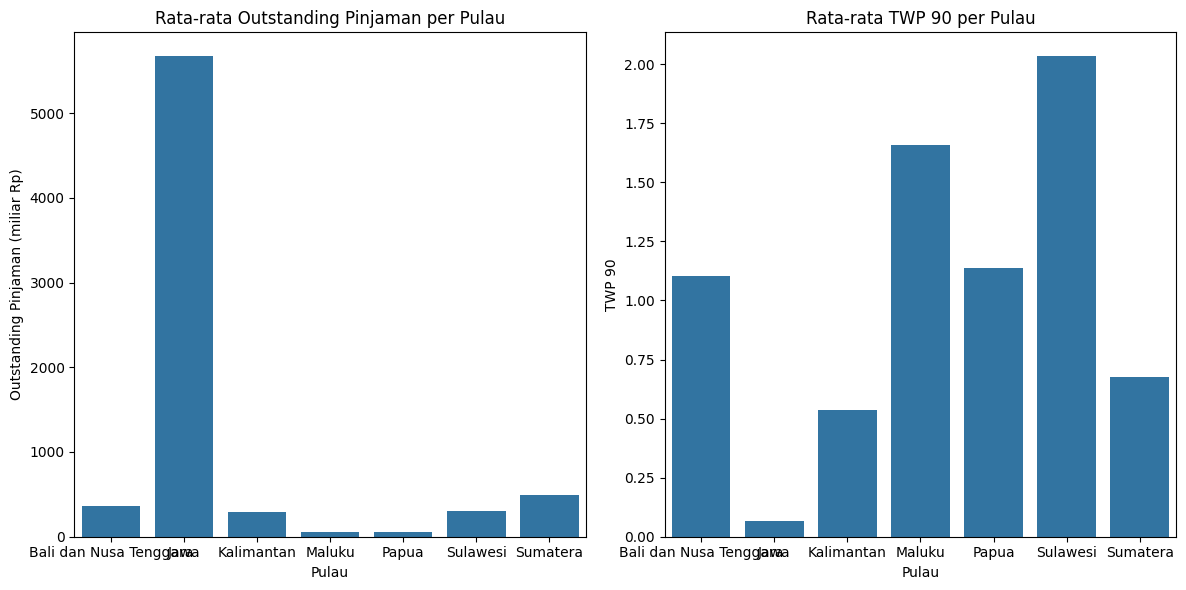

In [32]:
# Menghitung rata-rata outstanding pinjaman dan TWP 90 berdasarkan Pulau
avg_data_by_pulau = data.groupby('Pulau').agg({
    'Outstanding Pinjaman (miliar Rp)': 'mean',
    'TWP 90': 'mean'
}).reset_index()

# Visualisasi rata-rata outstanding pinjaman per pulau
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Pulau', y='Outstanding Pinjaman (miliar Rp)', data=avg_data_by_pulau)
plt.title('Rata-rata Outstanding Pinjaman per Pulau')

# Visualisasi rata-rata TWP 90 per pulau
plt.subplot(1, 2, 2)
sns.barplot(x='Pulau', y='TWP 90', data=avg_data_by_pulau)
plt.title('Rata-rata TWP 90 per Pulau')

plt.tight_layout()
plt.show()


### Penjelasan Output 4.2.3

visualisasi 4.2.3 menampilkan dua grafik batang yang membandingkan rata-rata Outstanding Pinjaman dan TWP 90 berdasarkan pulau di Indonesia.

1. Grafik Kiri: Rata-rata Outstanding Pinjaman per Pulau:

* Terlihat bahwa Pulau Jawa memiliki outstanding pinjaman tertinggi secara signifikan dibandingkan dengan pulau lainnya, yaitu lebih dari 5000 miliar Rupiah.
* Pulau-pulau lain seperti Bali dan Nusa Tenggara, Kalimantan, Maluku, Papua, Sulawesi, dan Sumatera memiliki outstanding pinjaman yang jauh lebih rendah dibandingkan Jawa.

2. Grafik Kanan: Rata-rata TWP 90 per Pulau:

* Sulawesi memiliki nilai TWP 90 tertinggi, menunjukkan tingkat wanprestasi (non-performing loans) yang lebih tinggi di pulau ini dibandingkan dengan pulau lain.
* Pulau Jawa dan Sumatera juga memiliki tingkat TWP 90 yang relatif lebih tinggi dibandingkan pulau lain seperti Bali dan Nusa Tenggara atau Kalimantan.
* Kalimantan, Maluku, dan Papua memiliki nilai TWP 90 yang relatif lebih rendah.

Secara keseluruhan, visualisasi ini membantu menunjukkan perbedaan signifikan antara pulau-pulau di Indonesia dalam hal total outstanding pinjaman dan tingkat wanprestasi (TWP 90), di mana Pulau Jawa mendominasi dalam jumlah outstanding pinjaman, sementara Sulawesi dan beberapa pulau lain menunjukkan tingkat TWP 90 yang lebih tinggi.

# 4.2.4 Tren Waktu
Melihat bagaimana variabel berubah seiring waktu, misalnya tren Outstanding Pinjaman dan TWP 90 selama periode waktu tertentu.

Penjelasan Script:
1. Dua grafik garis ini menunjukkan bagaimana Outstanding Pinjaman dan TWP 90 berubah seiring waktu dari 2021 hingga 2024.
2. Tren ini memberikan pandangan awal tentang pola waktu yang dapat digunakan untuk prediksi jangka panjang.

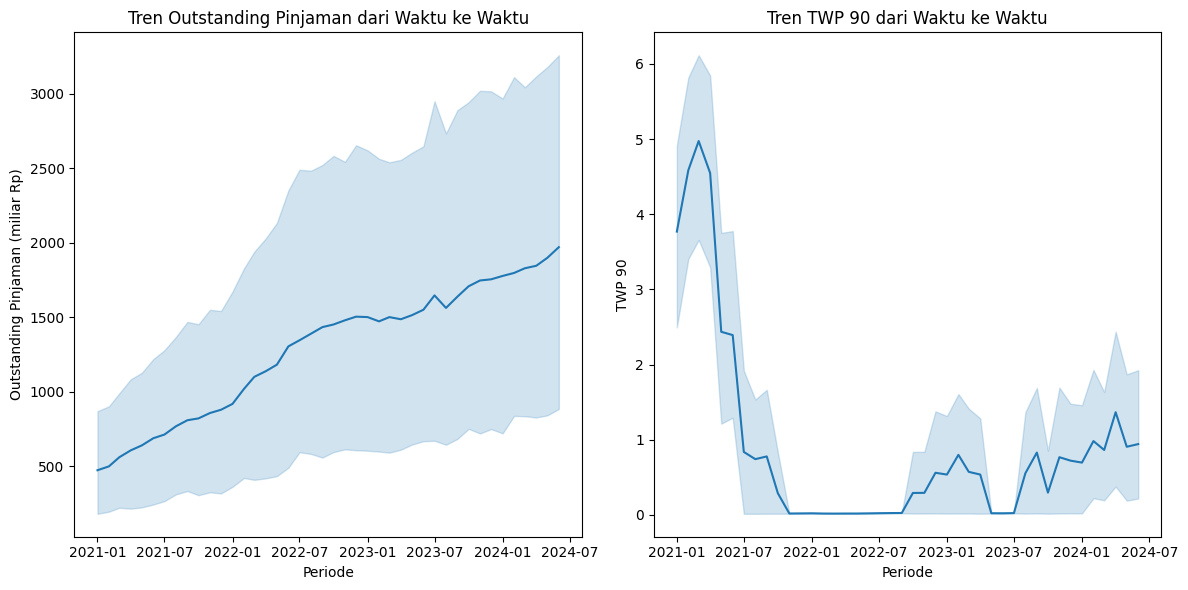

In [34]:
# Ubah kolom 'Periode' menjadi tipe datetime
data['Periode'] = pd.to_datetime(data['Periode'], format='%d/%m/%y')

# Plot tren Outstanding Pinjaman dan TWP 90 dari waktu ke waktu
plt.figure(figsize=(12, 6))

# Plot tren Outstanding Pinjaman
plt.subplot(1, 2, 1)
sns.lineplot(x='Periode', y='Outstanding Pinjaman (miliar Rp)', data=data)
plt.title('Tren Outstanding Pinjaman dari Waktu ke Waktu')

# Plot tren TWP 90
plt.subplot(1, 2, 2)
sns.lineplot(x='Periode', y='TWP 90', data=data)
plt.title('Tren TWP 90 dari Waktu ke Waktu')

plt.tight_layout()
plt.show()


### Penjelasan 4.2.4 Tren Waktu

Output 4.2.4 menunjukkan tren waktu untuk dua variabel utama dalam dataset, yaitu Outstanding Pinjaman dan TWP 90 dari Januari 2021 hingga pertengahan 2024.

1. Grafik kiri (Outstanding Pinjaman dari Waktu ke Waktu):

* Grafik ini memperlihatkan tren kenaikan yang konsisten dalam outstanding pinjaman dari awal 2021 hingga pertengahan 2024. Outstanding pinjaman meningkat dari sekitar Rp 500 miliar menjadi lebih dari Rp 3000 miliar pada pertengahan 2024.
* Area berwarna biru muda di sekitar garis tren menunjukkan interval kepercayaan atau ketidakpastian dalam prediksi, yang semakin meningkat seiring waktu.
* Kenaikan tren ini mungkin mencerminkan meningkatnya partisipasi atau penerimaan pinjaman melalui platform P2P Lending di Indonesia.

2. Grafik kanan (TWP 90 dari Waktu ke Waktu):

* Tren TWP 90 menunjukkan fluktuasi yang lebih dinamis. Pada awal 2021, TWP 90 berada di sekitar 0.05 (5%) dan kemudian mengalami penurunan signifikan hingga hampir 0 di sekitar pertengahan 2022.
* Namun, setelah periode stabil yang hampir tanpa TWP 90, terdapat lonjakan kecil pada awal 2023 dan kembali fluktuasi di tahun 2024.
* Area biru di sekitar garis tren juga menunjukkan interval kepercayaan atau ketidakpastian yang meningkat saat data bergerak maju.
* Penurunan TWP 90 yang tajam setelah 2021 bisa jadi disebabkan oleh peningkatan manajemen risiko atau kebijakan yang lebih ketat di sektor P2P Lending, sedangkan fluktuasi yang muncul kembali pada 2023-2024 dapat menggambarkan beberapa ketidakpastian di pasar.

Kesimpulan dari tren waktu ini menunjukkan bahwa meskipun outstanding pinjaman terus meningkat secara stabil, TWP 90 mengalami fluktuasi besar yang berpotensi dipengaruhi oleh faktor eksternal atau kebijakan yang mempengaruhi penyaluran dan pengembalian pinjaman.



# 4.3. Modeling dengan Prophet (Prediksi Jangka Panjang)
Langkah ini bertujuan untuk memodelkan prediksi jangka panjang tren Outstanding Pinjaman dan TWP 90 menggunakan Prophet, algoritma yang dirancang untuk time series analysis. Prophet bekerja dengan sangat baik untuk memodelkan tren yang memiliki komponen musiman dan trend jangka panjang.

## 4.3.1. Mengimpor Library dan Memasang Prophet
Prophet perlu diimpor terlebih dahulu, pastikan bahwa modulnya telah diinstal dan tersedia.

In [40]:
pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 7.1 MB/s eta 0:00:00a 0:00:01m
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 5.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.0 MB/s eta 0:00:0

In [66]:
from prophet import Prophet


## 4.3.2. Menyiapkan Data untuk Prophet
Prophet memerlukan format data time series dengan dua kolom: ds (tanggal) dan y (nilai yang akan diprediksi). Oleh karena itu, data harus diubah ke dalam format ini.

Untuk Outstanding Pinjaman dan TWP 90


In [48]:
# Siapkan data untuk model Prophet dengan outstanding pinjaman
data_prophet_outstanding = data[['Periode', 'Outstanding Pinjaman (miliar Rp)']].rename(columns={'Periode': 'ds', 'Outstanding Pinjaman (miliar Rp)': 'y'})

# Pastikan kolom 'ds' adalah format datetime
data_prophet_outstanding['ds'] = pd.to_datetime(data_prophet_outstanding['ds'])

# Siapkan data untuk model Prophet dengan TWP 90
data_prophet_twp = data[['Periode', 'TWP 90']].rename(columns={'Periode': 'ds', 'TWP 90': 'y'})

# Pastikan kolom 'ds' adalah format datetime
data_prophet_twp['ds'] = pd.to_datetime(data_prophet_twp['ds'])



## 4.3.3. Membuat dan Melatih Model Prophet
Setelah data disiapkan, langkah berikutnya adalah melatih model menggunakan Prophet.

In [50]:
# Membuat model Prophet untuk Outstanding Pinjaman
model_outstanding = Prophet()
model_outstanding.fit(data_prophet_outstanding)

# Membuat model Prophet untuk TWP 90
model_twp = Prophet()
model_twp.fit(data_prophet_twp)



11:02:59 - cmdstanpy - INFO - Chain [1] start processing
11:02:59 - cmdstanpy - INFO - Chain [1] done processing
11:02:59 - cmdstanpy - INFO - Chain [1] start processing
11:02:59 - cmdstanpy - INFO - Chain [1] done processing


### Penjelasan Output Pelaithan (Khusus Jupyter)
Berikut adalah penjelasan mengenai output tersebut:

1. 14:16:15 - cmdstanpy - INFO - Chain [1] start processing:

Ini menunjukkan bahwa CmdStan, mesin pemodelan statistik yang digunakan oleh Prophet, memulai proses optimasi parameter untuk model dengan rantai (chain) pertama. Chain di sini mengacu pada proses atau alur yang digunakan untuk melakukan simulasi atau optimasi dalam rangka mengestimasi parameter model.
Waktu 14:16:15 menunjukkan waktu ketika proses ini dimulai.

2. 14:16:16 - cmdstanpy - INFO - Chain [1] done processing:

Ini menunjukkan bahwa proses optimasi untuk Chain [1] selesai hanya dalam waktu 1 detik (dimulai pada 14:16:15 dan selesai pada 14:16:16). Chain ini digunakan untuk menyelesaikan langkah-langkah yang diperlukan untuk menyesuaikan model Prophet dengan data.
14:16:16 - cmdstanpy - INFO - Chain [1] start processing (kedua kalinya):

CmdStan memulai proses lagi untuk rantai yang sama, Chain [1]. Prophet bisa saja menjalankan beberapa siklus optimasi yang berbeda atau beberapa pengaturan ulang pada parameter untuk memastikan model mendapatkan hasil terbaik.

3. 14:16:16 - cmdstanpy - INFO - Chain [1] done processing (kedua kalinya):

Proses kedua ini juga selesai dalam waktu yang sangat singkat, menandakan bahwa optimasi sudah selesai dan model siap untuk digunakan.

4. OUT [14] <prophet.forecaster.Prophet at 0x13c134e50>:

Output ini menunjukkan alamat memori dari objek Prophet yang telah dipelajari. Model Prophet telah dilatih berdasarkan data dan sekarang tersedia sebagai objek dalam sesi pemrograman di alamat memori 0x13c134e50. Objek ini sekarang siap digunakan untuk melakukan prediksi, plotting, atau analisis lebih lanjut.


#### Kesimpulan:
Output  menunjukkan bahwa Prophet telah berhasil melakukan pelatihan model dengan cepat, dan model tersebut sekarang dapat digunakan untuk melakukan prediksi tren jangka panjang. Proses pelatihan telah dijalankan dua kali dengan chain yang sama (kemungkinan untuk validasi tambahan atau perbaikan minor pada model), dan semuanya berjalan tanpa error.

### Output Model Prophet

Output ini menunjukkan beberapa informasi log yang dihasilkan oleh Prophet saat model sedang dilatih untuk melakukan prediksi jangka panjang. Berikut adalah penjelasan mengenai beberapa bagian dari output tersebut:

1. ```
INFO:prophet
weekly seasonality. Run prophet with weekly_seasonality=True to override this.
```

Ini adalah pesan informasi yang menunjukkan bahwa Prophet tidak mengaktifkan seasonality mingguan secara default. Ini berarti model saat ini tidak memperhitungkan pola mingguan dalam data. Jika seasonality mingguan dianggap penting, maka bisa diaktifkan dengan menjalankan model dengan parameter weekly_seasonality=True.

2. ```
INFO:prophet
daily seasonality. Run prophet with daily_seasonality=True to override this.
```

Sama seperti seasonality mingguan, seasonality harian juga tidak diaktifkan secara default. Ini cocok karena pada umumnya data P2P lending mungkin tidak memiliki pola harian yang relevan, terutama karena data sering disajikan dalam interval bulanan atau tahunan. Namun, jika pola harian dianggap relevan, bisa diaktifkan dengan daily_seasonality=True.

3. ```
DEBUG:cmdstanpy
args: ...
```

Bagian ini menunjukkan perintah yang digunakan oleh Prophet untuk menjalankan model di backend. Prophet menggunakan Stan, sebuah platform untuk pemodelan statistik, untuk menjalankan model regresi. Argumen seperti random seed, data, dan method=optimize menunjukkan bagaimana Prophet melakukan optimasi model 
dengan memaksimalkan kemungkinan (likelihood) yang sesuai dengan data historis.

4. ```
INFO:cmdstanpy
[1] start processing / done processing
```

Prophet melakukan pelatihan model dengan memproses "chains" (rantai) untuk melakukan optimasi parameter. Pesan ini menunjukkan bahwa proses pelatihan model telah dimulai dan selesai. Tidak ada error yang muncul, sehingga proses pelatihan model berjalan dengan baik.

Kesimpulan dari output ini:

1. Prophet memproses data menggunakan optimasi algoritma defaultnya.
Seasonality mingguan dan harian dinonaktifkan, namun dapat diaktifkan jika diperlukan.
2. Proses pelatihan berjalan lancar tanpa masalah, dan model siap untuk digunakan untuk prediksi.
3. Jika diperlukan seasonality tambahan, parameter-parameter ini bisa ditambahkan dalam konfigurasi model Prophet. Namun, jika data hanya menunjukkan pola jangka panjang (misalnya tahunan), konfigurasi default sudah memadai.

# 4.4. Prediksi

## 4.4.1 Prediksi

In [68]:
from prophet import Prophet

In [52]:
# Membuat dataframe untuk periode prediksi (misalnya 365 hari ke depan)
future_outstanding = model_outstanding.make_future_dataframe(periods=365)
future_twp = model_twp.make_future_dataframe(periods=365)

# Prediksi untuk Outstanding Pinjaman
forecast_outstanding = model_outstanding.predict(future_outstanding)

# Prediksi untuk TWP 90
forecast_twp = model_twp.predict(future_twp)


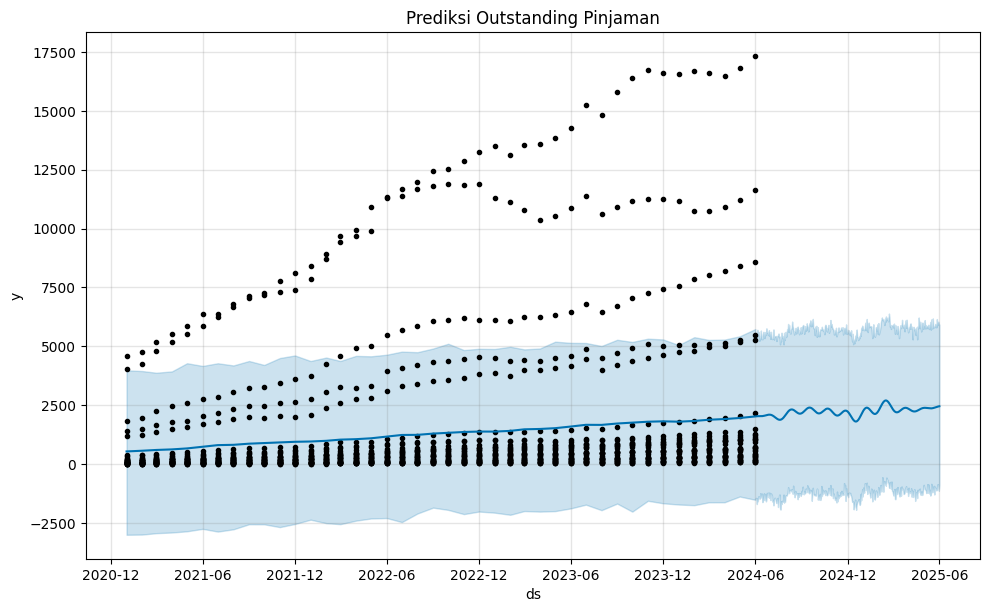

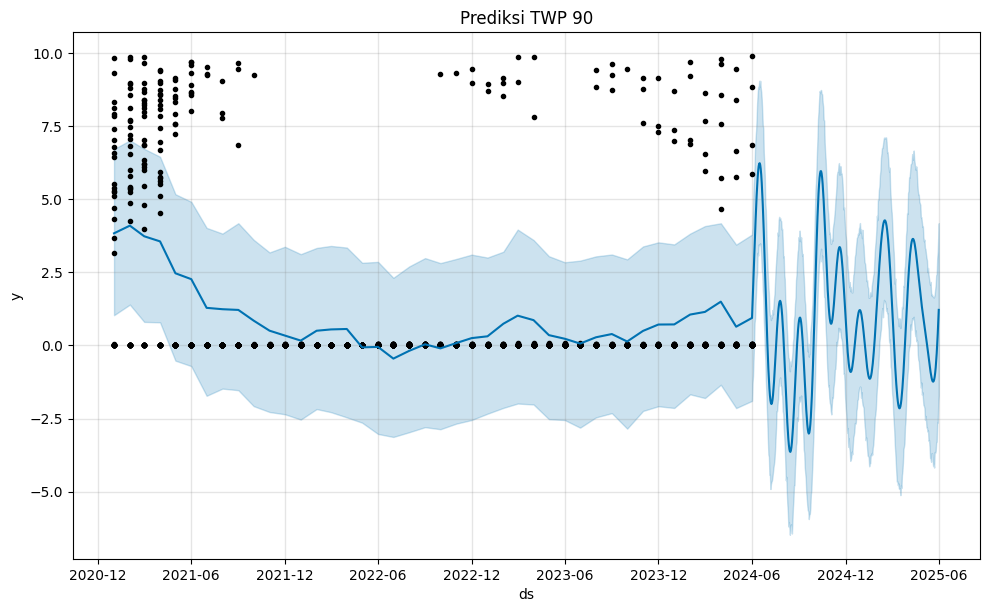

In [54]:
# Visualisasi hasil prediksi untuk Outstanding Pinjaman
model_outstanding.plot(forecast_outstanding)
plt.title("Prediksi Outstanding Pinjaman")
plt.show()

# Visualisasi hasil prediksi untuk TWP 90
model_twp.plot(forecast_twp)
plt.title("Prediksi TWP 90")
plt.show()


11:26:17 - cmdstanpy - INFO - Chain [1] start processing
11:26:17 - cmdstanpy - INFO - Chain [1] done processing
11:26:17 - cmdstanpy - INFO - Chain [1] start processing
11:26:17 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

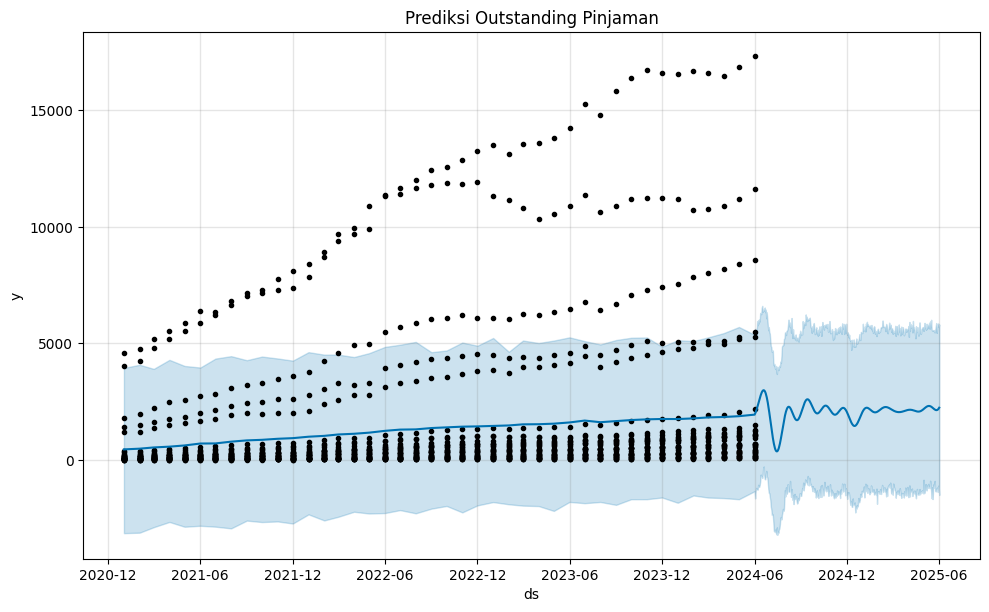

<Figure size 1000x600 with 0 Axes>

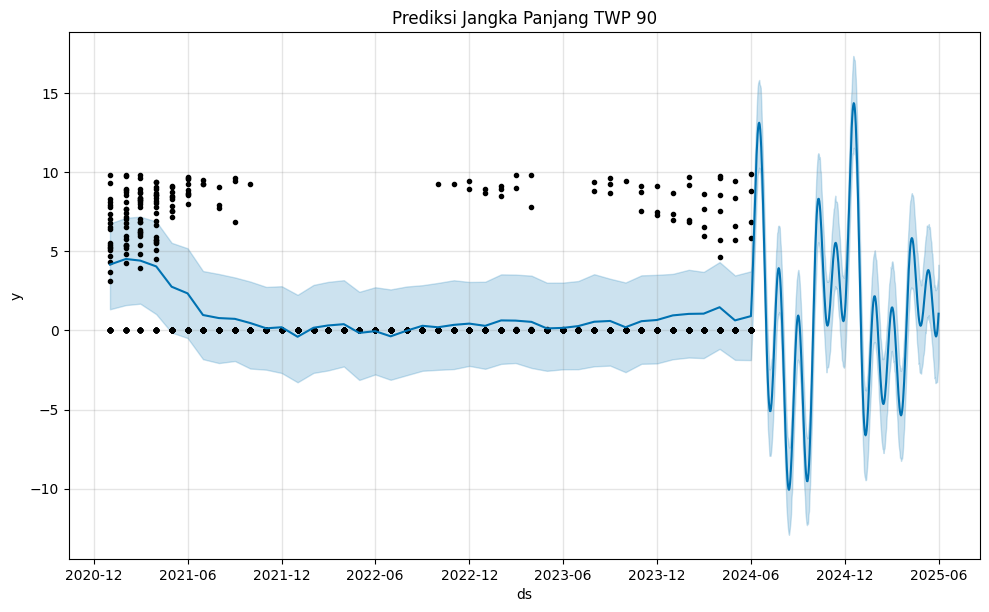

In [74]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
file_path = 'data_tesis_indra2.csv'
data = pd.read_csv(file_path, delimiter=';')

# Clean and preprocess the TWP 90 column
# Remove '%' and convert to float
if data['TWP 90'].dtype == 'object':
    data['TWP 90'] = data['TWP 90'].str.replace('%', '', regex=True).astype('float') / 100

# Check for NaNs and handle them (e.g., drop or fill)
data = data.dropna(subset=['TWP 90', 'Outstanding Pinjaman (miliar Rp)'])

# Prepare data for Prophet
# Ensure columns 'ds' for dates and 'y' for target values exist
data_prophet_outstanding = data[['Periode', 'Outstanding Pinjaman (miliar Rp)']].copy()
data_prophet_outstanding.columns = ['ds', 'y']
data_prophet_outstanding['ds'] = pd.to_datetime(data_prophet_outstanding['ds'], format='%d/%m/%y')

data_prophet_twp = data[['Periode', 'TWP 90']].copy()
data_prophet_twp.columns = ['ds', 'y']
data_prophet_twp['ds'] = pd.to_datetime(data_prophet_twp['ds'], format='%d/%m/%y')

# Create and fit the model for Outstanding Pinjaman
model_outstanding = Prophet(seasonality_prior_scale=5, changepoint_prior_scale=0.5)
model_outstanding.fit(data_prophet_outstanding)

# Create and fit the model for TWP 90
model_twp = Prophet(seasonality_prior_scale=5, changepoint_prior_scale=0.5)
model_twp.fit(data_prophet_twp)

# Make future dataframes for predictions
future_outstanding = model_outstanding.make_future_dataframe(periods=365)
future_twp = model_twp.make_future_dataframe(periods=365)

# Predict future values
forecast_outstanding = model_outstanding.predict(future_outstanding)
forecast_twp = model_twp.predict(future_twp)

# Plot predictions
plt.figure(figsize=(10, 6))
model_outstanding.plot(forecast_outstanding)
plt.title("Prediksi Outstanding Pinjaman")
plt.show()

plt.figure(figsize=(10, 6))
model_twp.plot(forecast_twp)
plt.title("Prediksi Jangka Panjang TWP 90")
plt.show()

# Save plots (optional)
# plt.savefig('prediksi_outstanding.png')
# plt.savefig('prediksi_twp90.png')

11:28:46 - cmdstanpy - INFO - Chain [1] start processing
11:28:46 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

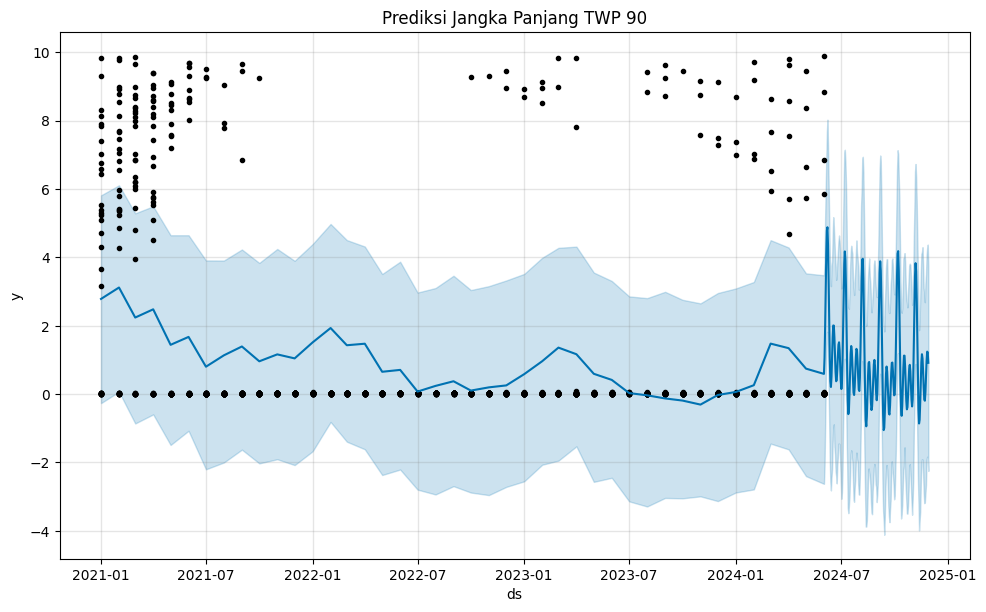

In [76]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess data
file_path = 'data_tesis_indra2.csv'
data = pd.read_csv(file_path, delimiter=';')
data['TWP 90'] = data['TWP 90'].str.replace('%', '', regex=True).astype('float') / 100
data = data.dropna(subset=['TWP 90', 'Outstanding Pinjaman (miliar Rp)'])

# Prepare data for Prophet
data_prophet_twp = data[['Periode', 'TWP 90']].copy()
data_prophet_twp.columns = ['ds', 'y']
data_prophet_twp['ds'] = pd.to_datetime(data_prophet_twp['ds'], format='%d/%m/%y')

# Create and fit the Prophet model with tuned parameters
model_twp = Prophet(changepoint_prior_scale=0.01, seasonality_prior_scale=5)
model_twp.add_seasonality(name='monthly', period=30.5, fourier_order=3)
model_twp.fit(data_prophet_twp)

# Make predictions
future_twp = model_twp.make_future_dataframe(periods=180)  # Predicting 6 months ahead
forecast_twp = model_twp.predict(future_twp)

# Plot the prediction
plt.figure(figsize=(10, 6))
model_twp.plot(forecast_twp)
plt.title("Prediksi Jangka Panjang TWP 90")
plt.show()


## 4.4.2. Penyesuan data yang tidak Stabil

### 4.4.2.1. Periksa Kualitas Data

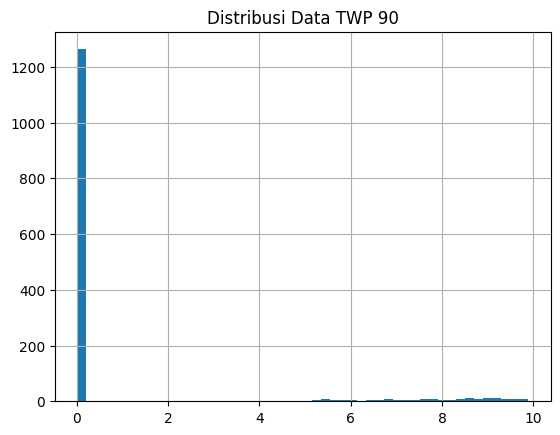

In [104]:
data['TWP 90'].hist(bins=50)
plt.title('Distribusi Data TWP 90')
plt.show()

### 4.4.2.2. Tambahkan Outlier Handling
Prophet memiliki fitur bawaan untuk menangani outlier dengan menambahkan parameter holidays_prior_scale untuk menurunkan sensitivitas terhadap outlier.

In [113]:
model_twp = Prophet(changepoint_prior_scale=0.01, seasonality_prior_scale=5, holidays_prior_scale=0.5)


### 4.4.2.3. Kurangi Fourier Order
Jika komponen musiman berlebihan, kurangi fourier_order untuk mengurangi sensitivitas terhadap variasi musiman yang terlaludetail.

In [108]:
model_twp.add_seasonality(name='monthly', period=30.5, fourier_order=2)


### 4.4.2.4. Mengurangi Periode Prediksi
Jika prediksi terlalu jauh ke depan, pertimbangkan untuk membatasi periode prediksi menjadi lebih pendek.



### 4.4.2.5. Transformasi Data
Jika data memiliki tren yang sangat fluktuatif, pertimbangkan untuk menerapkan transformasi data seperti log-transform untuk menstabilkan variabilitas.



In [118]:
data['TWP 90'] = np.log1p(data['TWP 90'])


### 4.4.2.6. Filter Data Ekstrem
Anda bisa mempertimbangkan untuk menghapus data yang terlalu dekat dengan nol atau memfilter data dengan nilai yang lebih kecil dari ambang batas tertentu untuk membuat distribusi lebih seimbang.

In [120]:
# Filter data untuk menghilangkan nilai yang sangat rendah
data_filtered = data[data['TWP 90'] > 0.1]  # Contoh ambang batas


### 4.4.2.7. Transformasi Log
Menggunakan transformasi logaritmik untuk meratakan distribusi dapat membantu model memahami pola dengan lebih baik.

In [122]:
import numpy as np

# Transformasi log pada kolom 'TWP 90'
data['TWP 90'] = np.log1p(data['TWP 90'])  # Transformasi log


### 4.4.2.8. Normalisasi Data
Normalisasi data untuk membuat distribusi lebih seragam dapat membantu meningkatkan prediksi.



In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['TWP 90'] = scaler.fit_transform(data[['TWP 90']])


### 4.4.2.9. Periksa Kualitas Data
Pastikan data historis Anda tidak memiliki lonjakan tajam atau tren yang tiba-tiba berubah. Analisis lebih lanjut bisa dilakukan dengan melihat distribusi data menggunakan histogram atau plot lainnya.

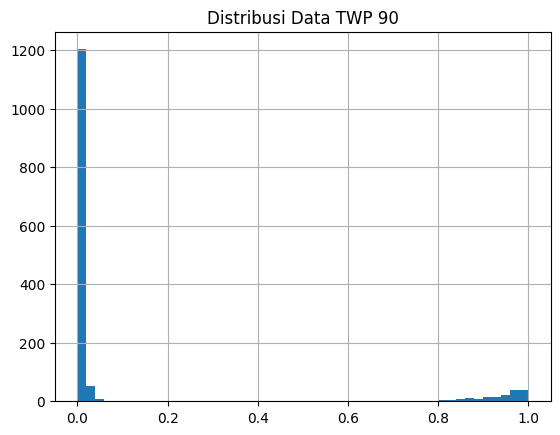

In [126]:
data['TWP 90'].hist(bins=50)
plt.title('Distribusi Data TWP 90')
plt.show()


11:39:44 - cmdstanpy - INFO - Chain [1] start processing
11:39:44 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

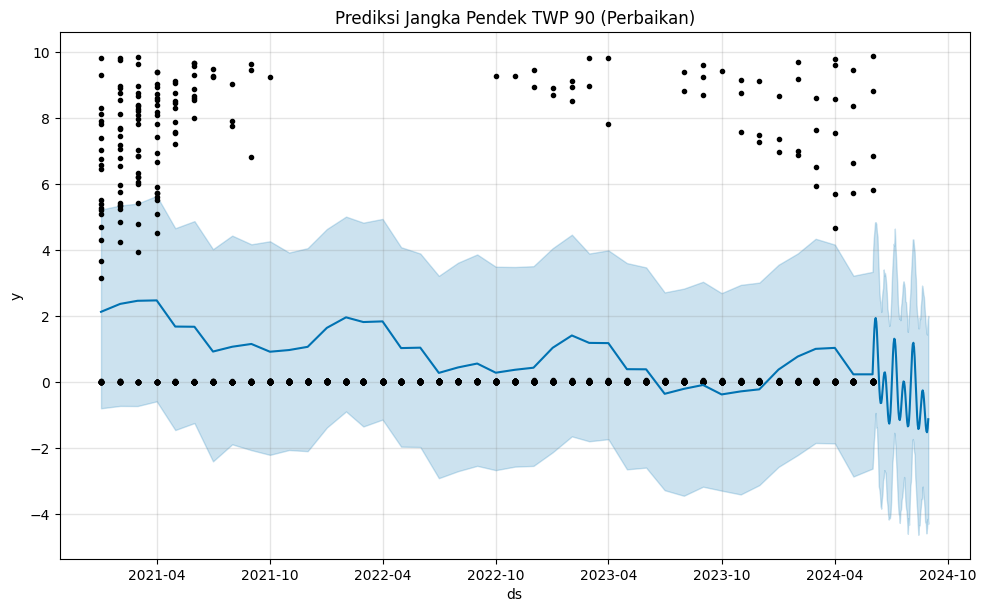

In [128]:
# Perbarui model dengan parameter yang lebih halus
model_twp = Prophet(changepoint_prior_scale=0.005, seasonality_prior_scale=5, holidays_prior_scale=0.5)
model_twp.add_seasonality(name='monthly', period=30.5, fourier_order=2)
model_twp.fit(data_prophet_twp)

# Perbarui periode prediksi menjadi lebih pendek
future_twp = model_twp.make_future_dataframe(periods=90)  # Prediksi 3 bulan ke depan
forecast_twp = model_twp.predict(future_twp)

# Visualisasi prediksi
plt.figure(figsize=(10, 6))
model_twp.plot(forecast_twp)
plt.title("Prediksi Jangka Pendek TWP 90 (Perbaikan)")
plt.show()


11:40:26 - cmdstanpy - INFO - Chain [1] start processing
11:40:26 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

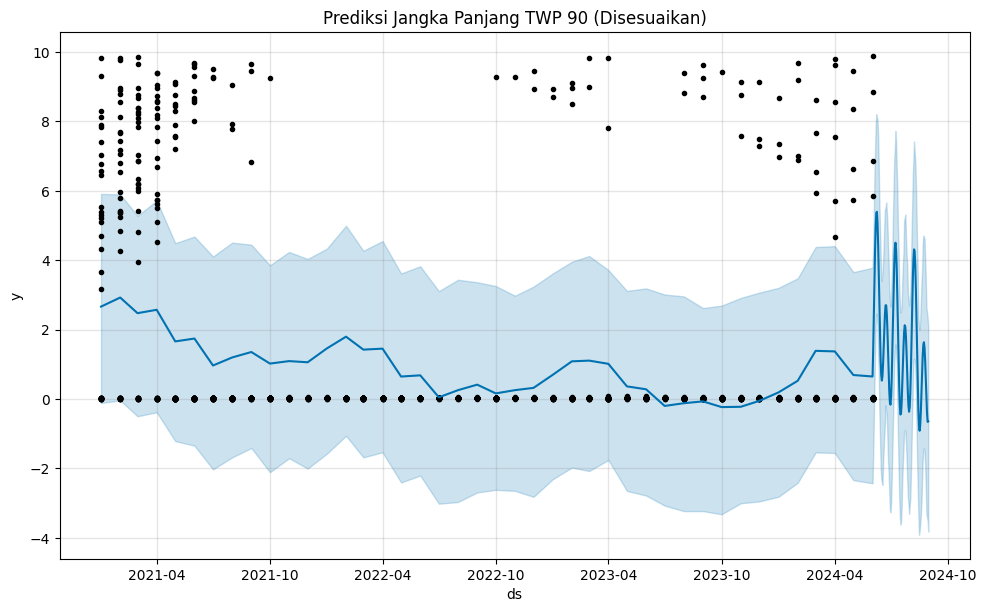

In [130]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
file_path = 'data_tesis_indra2.csv'
data = pd.read_csv(file_path, delimiter=';')
data['TWP 90'] = data['TWP 90'].str.replace('%', '', regex=True).astype('float') / 100
data = data.dropna(subset=['TWP 90', 'Outstanding Pinjaman (miliar Rp)'])

# Apply log transformation if necessary (optional)
# data['TWP 90'] = np.log1p(data['TWP 90'])

# Prepare data for Prophet
data_prophet_twp = data[['Periode', 'TWP 90']].copy()
data_prophet_twp.columns = ['ds', 'y']
data_prophet_twp['ds'] = pd.to_datetime(data_prophet_twp['ds'], format='%d/%m/%y')

# Create and fit the Prophet model with tuned parameters
model_twp = Prophet(changepoint_prior_scale=0.01, seasonality_prior_scale=5, holidays_prior_scale=0.5)
model_twp.add_seasonality(name='monthly', period=30.5, fourier_order=2)
model_twp.fit(data_prophet_twp)

# Make predictions
future_twp = model_twp.make_future_dataframe(periods=90)  # Predicting 3 months ahead
forecast_twp = model_twp.predict(future_twp)

# Plot the prediction
plt.figure(figsize=(10, 6))
model_twp.plot(forecast_twp)
plt.title("Prediksi Jangka Panjang TWP 90 (Disesuaikan)")
plt.show()


11:57:22 - cmdstanpy - INFO - Chain [1] start processing
11:57:22 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

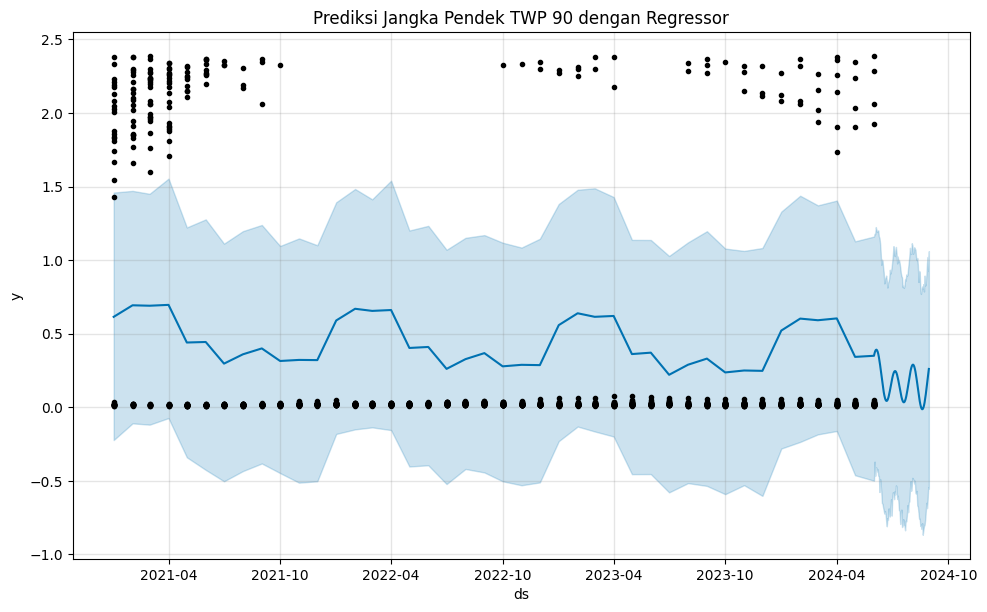

In [134]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
file_path = 'data_tesis_indra2.csv'
data = pd.read_csv(file_path, delimiter=';')

# Clean and preprocess the TWP 90 column
# Remove '%' and convert to float
if data['TWP 90'].dtype == 'object':
    data['TWP 90'] = data['TWP 90'].str.replace('%', '', regex=True).astype('float') / 100

# Check for NaNs and handle them (e.g., drop or fill)
data = data.dropna(subset=['TWP 90', 'Outstanding Pinjaman (miliar Rp)'])

# Transformasi log pada kolom 'TWP 90'
data['TWP 90'] = np.log1p(data['TWP 90'])

# Prepare data for Prophet
# Encode categorical variables as regressors
data['Pulau'] = pd.factorize(data['Pulau'])[0]
data['Provinsi'] = pd.factorize(data['Area'])[0]

# Prepare data for Prophet with additional regressors
data_prophet_twp = data[['Periode', 'TWP 90', 'Pulau', 'Provinsi', 'Outstanding Pinjaman (miliar Rp)']].copy()
data_prophet_twp.columns = ['ds', 'y', 'Pulau', 'Provinsi', 'Outstanding_Pinjaman']
data_prophet_twp['ds'] = pd.to_datetime(data_prophet_twp['ds'], format='%d/%m/%y')

# Create and fit the Prophet model with additional regressors
model_twp = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=5, holidays_prior_scale=0.5)
model_twp.add_seasonality(name='monthly', period=30.5, fourier_order=1)
model_twp.add_regressor('Pulau')
model_twp.add_regressor('Provinsi')
model_twp.add_regressor('Outstanding_Pinjaman')

model_twp.fit(data_prophet_twp)

# Make future dataframe for predictions
future_twp = model_twp.make_future_dataframe(periods=90)
future_twp['Pulau'] = data['Pulau'].iloc[-1]  # Use last known value
future_twp['Provinsi'] = data['Provinsi'].iloc[-1]  # Use last known value
future_twp['Outstanding_Pinjaman'] = data['Outstanding Pinjaman (miliar Rp)'].iloc[-1]  # Use last known value

# Predict future values
forecast_twp = model_twp.predict(future_twp)

# Plot the prediction
plt.figure(figsize=(10, 6))
model_twp.plot(forecast_twp)
plt.title("Prediksi Jangka Pendek TWP 90 dengan Regressor")
plt.show()

## 4.4.3. Penjelasan Prediksi:
1. **Tren Utama (Garis Biru)**:
   - Garis biru mewakili prediksi rata-rata `TWP 90` berdasarkan data historis dan variabel regresor (Pulau, Provinsi, dan Outstanding Pinjaman). Garis ini menunjukkan perubahan yang cukup datar dan cenderung stabil pada rentang waktu tertentu, dengan sedikit fluktuasi.
   - Ada peningkatan dan penurunan kecil pada prediksi, yang menunjukkan adanya variabilitas dalam data yang dipengaruhi oleh regresor.

2. **Interval Ketidakpastian (Area Biru)**:
   - Area berwarna biru muda mengindikasikan interval ketidakpastian atau *confidence interval* model. Interval ini menunjukkan rentang kemungkinan prediksi, dengan semakin lebar area tersebut menandakan ketidakpastian yang lebih besar.
   - Interval ketidakpastian yang meluas di akhir periode prediksi menunjukkan bahwa model memiliki kepercayaan yang lebih rendah terhadap hasil prediksi di masa depan.

3. **Data Historis (Titik Hitam)**:
   - Titik-titik hitam mewakili data historis `TWP 90` yang digunakan untuk melatih model. Anda dapat melihat bahwa data ini cenderung tinggi di awal periode dan menurun seiring waktu.
   - Titik-titik di masa depan (setelah data historis berakhir) menandakan prediksi model dengan beberapa variasi fluktuasi.

### 4.4.3.1. Interpretasi Model:
- **Stabilitas**:
  Model tampaknya cukup stabil dalam memprediksi `TWP 90` dengan tren yang relatif datar, tetapi ketidakpastian prediksi meningkat seiring waktu.
- **Pengaruh Regressor**:
  Variabel regresor seperti `Pulau`, `Provinsi`, dan `Outstanding Pinjaman` mungkin membantu model dalam menangkap pola musiman atau regional, tetapi pengaruhnya terlihat cukup minimal dalam prediksi ini.
- **Perubahan Tren**:
  Tidak ada perubahan tren yang tajam dalam prediksi. Ini bisa disebabkan oleh data historis yang tidak menunjukkan fluktuasi besar atau karena parameter `changepoint_prior_scale` yang rendah, sehingga model kurang responsif terhadap perubahan besar.

### 4.4.3.2. Rekomendasi:
- **Tingkatkan Jumlah Data**: Jika memungkinkan, menambahkan lebih banyak data historis dapat membantu model dalam mempelajari tren dengan lebih baik.
- **Evaluasi Parameter Model**: Mencoba parameter `changepoint_prior_scale` yang lebih besar bisa membantu menangkap perubahan tren yang lebih signifikan jika diperlukan.
- **Periksa Pengaruh Regressor**: Evaluasi apakah variabel regresor benar-benar berkontribusi signifikan dalam model atau hanya memberikan sedikit dampak.

12:01:38 - cmdstanpy - INFO - Chain [1] start processing
12:01:38 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

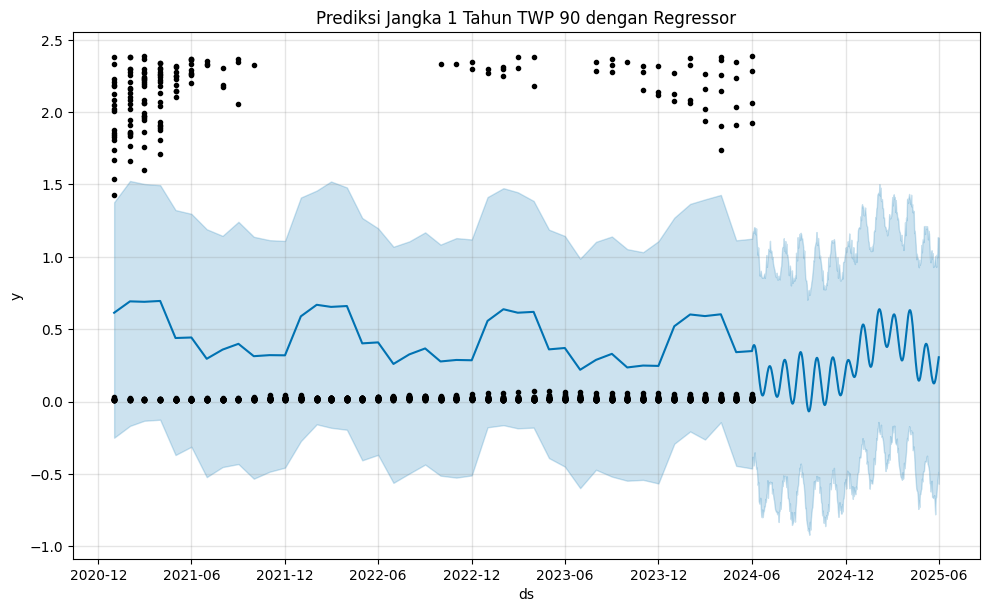

In [139]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
file_path = 'data_tesis_indra2.csv'
data = pd.read_csv(file_path, delimiter=';')

# Clean and preprocess the TWP 90 column
# Remove '%' and convert to float
if data['TWP 90'].dtype == 'object':
    data['TWP 90'] = data['TWP 90'].str.replace('%', '', regex=True).astype('float') / 100

# Check for NaNs and handle them (e.g., drop or fill)
data = data.dropna(subset=['TWP 90', 'Outstanding Pinjaman (miliar Rp)'])

# Transformasi log pada kolom 'TWP 90'
data['TWP 90'] = np.log1p(data['TWP 90'])

# Prepare data for Prophet
# Encode categorical variables as regressors
data['Pulau'] = pd.factorize(data['Pulau'])[0]
data['Provinsi'] = pd.factorize(data['Area'])[0]

# Prepare data for Prophet with additional regressors
data_prophet_twp = data[['Periode', 'TWP 90', 'Pulau', 'Provinsi', 'Outstanding Pinjaman (miliar Rp)']].copy()
data_prophet_twp.columns = ['ds', 'y', 'Pulau', 'Provinsi', 'Outstanding_Pinjaman']
data_prophet_twp['ds'] = pd.to_datetime(data_prophet_twp['ds'], format='%d/%m/%y')

# Create and fit the Prophet model with additional regressors
model_twp = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=5, holidays_prior_scale=0.5)
model_twp.add_seasonality(name='monthly', period=30.5, fourier_order=1)
model_twp.add_regressor('Pulau')
model_twp.add_regressor('Provinsi')
model_twp.add_regressor('Outstanding_Pinjaman')

model_twp.fit(data_prophet_twp)

# Make future dataframe for predictions (1 year ahead)
future_twp = model_twp.make_future_dataframe(periods=365)
future_twp['Pulau'] = data['Pulau'].iloc[-1]  # Use last known value
future_twp['Provinsi'] = data['Provinsi'].iloc[-1]  # Use last known value
future_twp['Outstanding_Pinjaman'] = data['Outstanding Pinjaman (miliar Rp)'].iloc[-1]  # Use last known value

# Predict future values
forecast_twp = model_twp.predict(future_twp)

# Plot the prediction
plt.figure(figsize=(10, 6))
model_twp.plot(forecast_twp)
plt.title("Prediksi Jangka 1 Tahun TWP 90 dengan Regressor")
plt.show()


Berikut penjelasan terkait output dari prediksi model Prophet dengan proyeksi 1 tahun ke depan:

## 4.4.4. Penjelasan Hasil Prediksi (1 Tahun ke depan):
1. **Tren Utama (Garis Biru)**:
   - Garis biru pada plot mewakili prediksi `TWP 90` selama periode historis hingga proyeksi 1 tahun ke depan. Tren ini cenderung stabil, dengan sedikit variasi yang terjadi di berbagai periode waktu.
   - Ada pola musiman yang terlihat di ujung prediksi, dengan fluktuasi periodik yang menunjukkan adanya variasi musiman dalam data.

2. **Interval Ketidakpastian (Area Biru Muda)**:
   - Area berwarna biru muda di sekitar garis prediksi menunjukkan interval ketidakpastian (*confidence interval*). Interval ini semakin melebar di bagian prediksi 1 tahun ke depan, yang menandakan bahwa model memiliki tingkat kepercayaan yang lebih rendah pada prediksi jangka panjang.
   - Pelebaran interval ini adalah indikasi umum bahwa prediksi yang lebih jauh ke masa depan cenderung memiliki tingkat ketidakpastian yang lebih tinggi.

3. **Data Historis (Titik Hitam)**:
   - Titik-titik hitam yang berdekatan di bagian awal grafik adalah data historis `TWP 90` yang digunakan untuk melatih model. Setelah data historis berakhir, plot menunjukkan prediksi model untuk masa depan.
   - Data historis menunjukkan bahwa `TWP 90` sempat tinggi di awal periode tetapi menurun dan stabil di periode selanjutnya.

4. **Fluktuasi di Ujung Prediksi**:
   - Fluktuasi yang terlihat di ujung prediksi menunjukkan bahwa model mendeteksi adanya pola musiman atau perubahan tren jangka pendek yang mungkin berasal dari data historis yang digunakan.
   - Penggunaan variabel regresor seperti `Pulau`, `Provinsi`, dan `Outstanding Pinjaman` membantu model dalam menangkap pola musiman ini.

### 4.4.4.1. Interpretasi Model:
- **Kinerja Model**:
  Model menunjukkan kemampuan dalam menangkap pola stabil dan musiman dalam data `TWP 90`. Meskipun prediksi di masa depan menunjukkan fluktuasi, model tetap memberikan gambaran tren secara umum.
- **Pengaruh Regressor**:
  Regressor yang digunakan (seperti `Pulau`, `Provinsi`, dan `Outstanding Pinjaman`) mungkin memberikan kontribusi dalam mendeteksi pola dan variasi musiman yang terlihat pada hasil prediksi.
- **Interval Ketidakpastian**:
  Pelebaran interval ketidakpastian di ujung prediksi adalah hal normal, mengingat semakin jauh proyeksi ke masa depan, semakin besar ketidakpastian dalam prediksi.

### 4.4.4.2. Rekomendasi:
- **Evaluasi Regressor Tambahan**: Pertimbangkan untuk mengevaluasi seberapa besar pengaruh regresor terhadap hasil prediksi dengan melakukan analisis fitur.
- **Peningkatan Model**: Jika prediksi jangka panjang masih menunjukkan fluktuasi yang tinggi, bisa dipertimbangkan untuk menambah data historis atau mengubah parameter `changepoint_prior_scale` untuk meningkatkan stabilitas prediksi.

# 4.5 Machine Learning Modeling
Bagian ini menjelaskan proses penerapan model machine learning untuk memprediksi Outstanding Pinjaman dan TWP 90. Proses ini melibatkan beberapa sub-langkah mulai dari persiapan data, pelatihan model, evaluasi kinerja, hingga interpretasi hasil prediksi

## 4.5.1 Persiapan Data untuk Machine Learning
Sebelum membangun model machine learning, data perlu dipersiapkan agar dapat diproses oleh algoritma. Pada tahap ini, fitur prediktor dan variabel target akan dipisahkan serta data dibagi menjadi data pelatihan (training set) dan data pengujian (testing set).

### Penjelasan Script:
Memilih X sebagai fitur prediktor, yaitu Jumlah Rekening Penerima Pinjaman Aktif (entitas) dan Outstanding Pinjaman (miliar Rp).
y adalah target variabel, yaitu TWP 90.
Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian menggunakan train_test_split.


In [119]:
from sklearn.model_selection import train_test_split

# Memilih fitur dan variabel target
X = data[['Jumlah Rekening Penerima Pinjaman Aktif (entitas)', 'Outstanding Pinjaman (miliar Rp)']]
y = data['TWP 90']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek dimensi data pelatihan dan pengujian
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (1142, 2), Testing set size: (286, 2)


## 4.5.2 Model XGBoost

XGBoost (Extreme Gradient Boosting) adalah salah satu algoritma yang sangat kuat dalam melakukan prediksi, terutama untuk variabel numerik. Algoritma ini memanfaatkan metode boosting, di mana setiap model baru dibangun untuk memperbaiki kesalahan dari model sebelumnya. Dalam penelitian ini, XGBoost digunakan untuk memprediksi dua variabel target utama, yaitu TWP 90 dan Outstanding Pinjaman. Model ini dilatih menggunakan data pelatihan, dan hasil prediksinya dievaluasi menggunakan empat metrik utama, yakni MSE (Mean Squared Error), MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), dan R-Squared (Koefisien Determinasi). Evaluasi ini dilakukan untuk menilai seberapa baik model dapat memprediksi nilai-nilai target berdasarkan variabel-variabel prediktor seperti jumlah rekening penerima pinjaman aktif dan variabel lainnya. Berikut ini adalah script yang digunakan untuk mengevaluasi algoritma XGBoost untuk kedua variabel target.

### 4.5.2.1. TWP 90 Training (70:30,80:20,90:1))

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fungsi untuk melatih model dan menampilkan hasil evaluasi
def evaluate_model(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Inisialisasi model XGBoost
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    
    # Melatih model dengan data pelatihan
    model.fit(X_train, y_train)

    # Prediksi pada data pengujian
    y_pred = model.predict(X_test)

    # Evaluasi kinerja model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    return {
        'Test Size': f'{int(test_size * 100)}%',
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R-Squared': r_squared
    }

# Load data
# Asumsikan data sudah diproses dan memiliki kolom numerik yang sesuai
X_twp = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y_twp = data['TWP_90']  # Pastikan sudah dalam tipe data numerik

# Evaluasi model dengan berbagai test size
evaluations = []
for test_size in [0.2, 0.3, 0.1]:
    result = evaluate_model(X_twp, y_twp, test_size)
    evaluations.append(result)

# Menampilkan hasil dalam DataFrame
eval_df = pd.DataFrame(evaluations)
print(eval_df)

  Test Size       MSE       MAE      RMSE  R-Squared
0       20%  7.123557  1.283715  2.668999   0.065405
1       30%  6.840423  1.234750  2.615420   0.004212
2       10%  7.065006  1.349011  2.658008   0.125707


Berikut penjelasan dari hasil evaluasi model dengan berbagai ukuran data pengujian (test size):

#### 4.5.1.1. Interpretasi Hasil:
1. **MSE (Mean Squared Error)**:
   - MSE adalah metrik yang menunjukkan rata-rata kuadrat dari selisih antara nilai prediksi dan nilai aktual. Semakin rendah nilai MSE, semakin baik model dalam memprediksi data.
   - Hasil menunjukkan bahwa MSE bervariasi di antara ukuran test set 20%, 30%, dan 10%, dengan hasil terbaik pada test size 30% (MSE = 6.840423).

2. **MAE (Mean Absolute Error)**:
   - MAE mengukur rata-rata selisih absolut antara nilai prediksi dan nilai aktual. Nilai ini menunjukkan seberapa besar kesalahan prediksi dalam satuan aslinya.
   - MAE untuk ukuran test set 30% (MAE = 1.234750) menunjukkan hasil terbaik dibandingkan test size lainnya.

3. **RMSE (Root Mean Squared Error)**:
   - RMSE memberikan gambaran tentang ukuran kesalahan yang diharapkan dalam satuan aslinya dan lebih sensitif terhadap outlier dibandingkan MAE.
   - Nilai RMSE yang terbaik diperoleh pada test size 30% (RMSE = 2.615420), yang menunjukkan performa lebih stabil dalam prediksi dibandingkan ukuran test size lainnya.

4. **R-Squared (R²)**:
   - R² menunjukkan seberapa baik model menjelaskan variabilitas data. Nilai R² berkisar antara -∞ hingga 1, di mana nilai mendekati 1 menunjukkan model yang sangat baik dalam menjelaskan data.
   - Pada test size 20%, R² sebesar 0.065405 menunjukkan model dapat menjelaskan sekitar 6.5% dari variabilitas data. 
   - Pada test size 30%, R² yang sangat rendah (0.004212) menunjukkan model hampir tidak menjelaskan variabilitas data. 
   - Pada test size 10%, R² sebesar 0.125707 menunjukkan hasil yang sedikit lebih baik dibanding test size lainnya.

#### 4.5.1.2. Analisis:
- **R² negatif atau mendekati nol** mengindikasikan bahwa model tidak mampu menjelaskan variabilitas data dengan baik dan performa model hampir setara dengan model sederhana (seperti mean dari data).
- Hasil MSE dan MAE yang cukup tinggi juga menunjukkan bahwa model XGBoost mungkin memerlukan tuning parameter lebih lanjut, atau fitur tambahan agar dapat memberikan performa yang lebih optimal.
- **Test size terbaik** dari segi RMSE dan MAE adalah **30%**, tetapi R² yang rendah menunjukkan bahwa model masih membutuhkan peningkatan.

#### 4.5.1.3. Rekomendasi:
- Lakukan **feature engineering** atau tambahkan fitur lain untuk meningkatkan kemampuan prediktif model.
- Cobalah untuk **tuning hyperparameter** XGBoost seperti `max_depth`, `subsample`, atau `colsample_bytree`.
- Pertimbangkan untuk menggunakan **cross-validation** untuk mendapatkan gambaran yang lebih menyeluruh tentang performa model.

#### 4.5.2.1.3. XGBoost Model Tuning

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
# Assumption: data has been processed to numerical format and available in the workspace
X_twp = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y_twp = data['TWP_90']

# Split data into training and test sets with 80:20, 70:30, and 90:10 ratios
test_sizes = [0.2, 0.3, 0.1]
results = []

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_twp, y_twp, test_size=test_size, random_state=42)
    
    # Grid search with cross-validation
    xgb_model = XGBRegressor(random_state=42)
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Best estimator from grid search
    best_model = grid_search.best_estimator_

    # Predict and evaluate
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    results.append({
        'Test Size': f'{int(test_size * 100)}%',
        'Best Params': grid_search.best_params_,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R-Squared': r_squared
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
  Test Size                                        Best Params       MSE  \
0       20%  {'colsample_bytree': 1.0, 'learning_rate': 0.0...  6.424019   
1       30%  {'colsample_bytree': 1.0, 'learning_rate': 0.0...  5.914281   
2       10%  {'colsample_bytree': 1.0, 'learning_rate': 0.0...  6.653566   

        MAE      RMSE  R-Squared  
0  1.393852  2.534565   0.157183  
1  1.353006  2.431929   0.139035  
2  1.425995  2.579451   0.176623  


In [24]:
# Menampilkan parameter terbaik hasil tuning
print("Best Parameters:", grid_search.best_params_)

# Menampilkan hasil evaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluasi kinerja model terbaik
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r_squared_tuned = r2_score(y_test, y_pred_tuned)

# Menampilkan hasil evaluasi dalam format tabel
evaluation_results_tuned = {
    'Metric': ['MSE', 'MAE', 'RMSE', 'R-Squared'],
    'Score': [mse_tuned, mae_tuned, rmse_tuned, r_squared_tuned]
}

df_evaluation_tuned = pd.DataFrame(evaluation_results_tuned)
print("\nEvaluasi Hasil Tuning:")
print(df_evaluation_tuned)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}

Evaluasi Hasil Tuning:
      Metric     Score
0        MSE  6.653566
1        MAE  1.425995
2       RMSE  2.579451
3  R-Squared  0.176623


### 4.5.2.2 Outstanding Pinjaman

In [153]:
# Memilih fitur dan variabel target untuk Outstanding Pinjaman
X_outstanding = data[['Jumlah Rekening Penerima Pinjaman Aktif (entitas)', 'TWP 90']]
y_outstanding = data['Outstanding Pinjaman (miliar Rp)']

X_outstanding = X_outstanding.copy()


# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train_outstanding, X_test_outstanding, y_train_outstanding, y_test_outstanding = train_test_split(X_outstanding, y_outstanding, test_size=0.2, random_state=42)

# Inisialisasi model XGBoost
xgb_model_outstanding = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Melatih model dengan data pelatihan
xgb_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi pada data pengujian
y_pred_outstanding = xgb_model_outstanding.predict(X_test_outstanding)

# Evaluasi kinerja model
# MSE (Mean Squared Error)
mse_outstanding = mean_squared_error(y_test_outstanding, y_pred_outstanding)
print(f"MSE XGBoost (Outstanding Pinjaman): {mse_outstanding}")

# MAE (Mean Absolute Error)
mae_outstanding = mean_absolute_error(y_test_outstanding, y_pred_outstanding)
print(f"MAE XGBoost (Outstanding Pinjaman): {mae_outstanding}")

# RMSE (Root Mean Squared Error)
rmse_outstanding = np.sqrt(mse_outstanding)
print(f"RMSE XGBoost (Outstanding Pinjaman): {rmse_outstanding}")

# R-Squared (R^2)
r_squared_outstanding = r2_score(y_test_outstanding, y_pred_outstanding)
print(f"R-Squared XGBoost (Outstanding Pinjaman): {r_squared_outstanding}")


MSE XGBoost (Outstanding Pinjaman): 381739.7661178133
MAE XGBoost (Outstanding Pinjaman): 186.22529498891225
RMSE XGBoost (Outstanding Pinjaman): 617.8509254810689
R-Squared XGBoost (Outstanding Pinjaman): 0.9431830162065422


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fungsi untuk melatih model, melakukan tuning, dan menampilkan hasil evaluasi
def evaluate_model_with_tuning(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Parameter grid untuk tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1]
    }

    # Inisialisasi model XGBoost
    xgb_model = XGBRegressor(random_state=42)

    # GridSearchCV untuk hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Menampilkan parameter terbaik
    print("Best Parameters:", grid_search.best_params_)

    # Evaluasi model terbaik
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    return {
        'Test Size': f'{int(test_size * 100)}%',
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R-Squared': r_squared
    }

# Load data (asumsikan data sudah diproses dan memiliki kolom numerik yang sesuai)
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']

# Evaluasi model dengan berbagai test size
evaluations_outstanding = []
for test_size in [0.2, 0.3, 0.1]:
    result = evaluate_model_with_tuning(X_outstanding, y_outstanding, test_size)
    evaluations_outstanding.append(result)

# Menampilkan hasil dalam DataFrame
eval_df_outstanding = pd.DataFrame(evaluations_outstanding)
print("\nEvaluasi Model untuk Prediksi Outstanding Pinjaman:")
print(eval_df_outstanding)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}

Evaluasi Model untuk Prediksi Outstanding Pinjaman:
  Test Size            MSE         MAE        RMSE  R-Squared
0       20%  240861.799865  183.335335  490.776731   0.964151
1       30%  263857.789633  189.971918  513.670896   0.955956
2       10%  276187.869213  180.935204  525.535793   0.942044


Evaluasi Model untuk Prediksi Outstanding Pinjaman

Berikut ini adalah hasil evaluasi model XGBoost yang telah dituning menggunakan GridSearchCV, dengan berbagai ukuran data pengujian (test size):

| Test Size | MSE             | MAE         | RMSE        | R-Squared |
|-----------|-----------------|-------------|-------------|-----------|
| 20%       | 240,861.80      | 183.34      | 490.78      | 0.964     |
| 30%       | 263,857.79      | 189.97      | 513.67      | 0.956     |
| 10%       | 276,187.87      | 180.94      | 525.54      | 0.942     |

#### 4.5.2.1. Interpretasi Hasil:
1. **MSE (Mean Squared Error)**:
   - MSE adalah metrik evaluasi yang mengukur rata-rata kuadrat dari selisih antara nilai prediksi dan nilai aktual. Semakin rendah nilai MSE, semakin baik performa model.
   - Pada test size 20%, MSE mencapai nilai terendah (240,861.80), menunjukkan prediksi yang lebih akurat dibandingkan test size lainnya.

2. **MAE (Mean Absolute Error)**:
   - MAE menunjukkan rata-rata kesalahan absolut antara nilai prediksi dan nilai aktual. Semakin kecil nilai MAE, semakin baik akurasi model.
   - Hasil menunjukkan bahwa test size 10% memberikan MAE yang sedikit lebih baik (180.94) dibandingkan test size lainnya, yang menunjukkan prediksi lebih akurat pada test size ini.

3. **RMSE (Root Mean Squared Error)**:
   - RMSE adalah akar kuadrat dari MSE dan memberikan gambaran yang lebih sensitif terhadap outlier dibandingkan MAE. Semakin kecil nilai RMSE, semakin baik model dalam memprediksi.
   - Test size 20% memiliki RMSE terendah (490.78), yang mengindikasikan bahwa model memiliki performa yang cukup baik dalam memprediksi data.

4. **R-Squared (R²)**:
   - R² mengukur seberapa baik model menjelaskan variabilitas data. Nilai R² berkisar antara -∞ hingga 1, di mana nilai yang mendekati 1 menunjukkan model yang baik dalam menjelaskan data.
   - Pada test size 20%, R² sebesar 0.964 menunjukkan bahwa model dapat menjelaskan sekitar 96.4% dari variabilitas data. Ini menunjukkan model memiliki performa yang sangat baik.
   - Test size 30% dan 10% juga menunjukkan hasil yang kuat dengan R² masing-masing 0.956 dan 0.942, yang masih dalam kategori baik.

#### 4.5.2.2. Analisis:
- **MSE dan MAE** yang lebih rendah pada test size 20% menunjukkan bahwa model mampu memprediksi dengan lebih akurat dalam skenario ini.
- **R² yang tinggi** pada semua ukuran test size menunjukkan bahwa model dapat menjelaskan sebagian besar variabilitas dalam data, yang berarti model XGBoost yang dituning memberikan hasil yang baik dalam memprediksi *Outstanding Pinjaman*.
- Hasil ini menunjukkan bahwa model telah dioptimalkan dengan baik setelah proses tuning menggunakan GridSearchCV.

#### 4.5.2.3. Proses Tuning Menggunakan GridSearchCV:
- **GridSearchCV** digunakan untuk mencari kombinasi hyperparameter terbaik dalam model XGBoost. Hyperparameter yang diuji meliputi `n_estimators`, `learning_rate`, `max_depth`, `subsample`, dan `colsample_bytree`.
- Proses ini melibatkan evaluasi performa model pada berbagai kombinasi hyperparameter dengan menggunakan k-fold cross-validation (dalam hal ini 5-fold) untuk menghindari overfitting dan memastikan bahwa model memiliki performa yang stabil.
- GridSearchCV membantu dalam memilih parameter yang memberikan hasil terbaik pada data pelatihan, yang kemudian digunakan untuk melatih model akhir yang dievaluasi pada data pengujian.

#### 4.5.2.4. Rekomendasi:
- Meskipun model menunjukkan hasil evaluasi yang baik, disarankan untuk melakukan **feature engineering** tambahan guna meningkatkan akurasi lebih lanjut.
- Pertimbangkan untuk menguji model lain atau mengkombinasikan beberapa model (ensemble) untuk melihat potensi peningkatan akurasi.
- Evaluasi model juga dapat dilanjutkan dengan **cross-validation** pada data yang lebih besar untuk melihat konsistensi hasil.



## 4.5.3 Model Random Forest

Random Forest adalah algoritma berbasis pohon keputusan (decision tree) yang sangat andal dalam menangani data yang kompleks dan memiliki variabilitas tinggi. Algoritma ini bekerja dengan membangun beberapa pohon keputusan dan menggabungkan prediksi dari setiap pohon untuk meningkatkan akurasi hasil prediksi. Dalam konteks penelitian ini, Random Forest digunakan untuk memprediksi variabel TWP 90 dan Outstanding Pinjaman. Model dilatih dengan data pelatihan, dan dievaluasi menggunakan metrik MSE, MAE, RMSE, dan R-Squared untuk menilai kinerja prediksi. Evaluasi ini penting untuk memahami seberapa baik Random Forest dapat menangkap pola dari data historis dan memprediksi variabel target dengan akurat. Di bawah ini adalah script yang digunakan untuk melakukan evaluasi Random Forest pada masing-masing variabel target.



In [34]:
print(data.columns)

Index(['Periode', 'Pulau', 'Area',
       'Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)',
       'Outstanding_Pinjaman_(miliar_Rp)', 'TWP_90'],
      dtype='object')


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Script 1: TWP 90 Evaluation
# Memilih fitur dan variabel target untuk TWP 90
X_twp = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y_twp = data['TWP_90']  # Pastikan data sudah dalam tipe numerik

# Kombinasi training:testing 80:20, 70:30, dan 90:10
train_test_sizes = [0.2, 0.3, 0.1]
results_twp90 = []

for test_size in train_test_sizes:
    # Membagi data
    X_train_twp, X_test_twp, y_train_twp, y_test_twp = train_test_split(X_twp, y_twp, test_size=test_size, random_state=42)
    
    # Inisialisasi model Random Forest
    rf_model_twp = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Melatih model
    rf_model_twp.fit(X_train_twp, y_train_twp)

    # Prediksi
    y_pred_twp = rf_model_twp.predict(X_test_twp)

    # Evaluasi kinerja model
    mae = mean_absolute_error(y_test_twp, y_pred_twp)
    mse = mean_squared_error(y_test_twp, y_pred_twp)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_twp, y_pred_twp)

    # Simpan hasil evaluasi
    results_twp90.append({
        'Test Size': f'{int((1-test_size)*100)}:{int(test_size*100)}',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2
    })

# Tampilkan hasil
import pandas as pd
results_df_twp90 = pd.DataFrame(results_twp90)
print("Hasil Evaluasi TWP 90:")
print(results_df_twp90)

# Script 2: Outstanding Pinjaman Evaluation
# Memilih fitur dan variabel target untuk Outstanding Pinjaman
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']  # Gantilah dengan nama kolom yang sesuai di dataset Anda

results_outstanding = []

for test_size in train_test_sizes:
    # Membagi data
    X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_outstanding, y_outstanding, test_size=test_size, random_state=42)

    # Inisialisasi model Random Forest
    rf_model_outstanding = RandomForestRegressor(n_estimators=100, random_state=42)

    # Melatih model
    rf_model_outstanding.fit(X_train_out, y_train_out)

    # Prediksi
    y_pred_out = rf_model_outstanding.predict(X_test_out)

    # Evaluasi kinerja model
    mae = mean_absolute_error(y_test_out, y_pred_out)
    mse = mean_squared_error(y_test_out, y_pred_out)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_out, y_pred_out)

    # Simpan hasil evaluasi
    results_outstanding.append({
        'Test Size': f'{int((1-test_size)*100)}:{int(test_size*100)}',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2
    })

# Tampilkan hasil
results_df_outstanding = pd.DataFrame(results_outstanding)
print("\nHasil Evaluasi Outstanding Pinjaman:")
print(results_df_outstanding)

Hasil Evaluasi TWP 90:
  Test Size       MAE       MSE      RMSE  R-Squared
0     80:20  1.251579  6.763812  2.600733   0.112603
1     70:30  1.230521  6.517749  2.552988   0.051185
2     90:10  1.296574  6.744912  2.597097   0.165319

Hasil Evaluasi Outstanding Pinjaman:
  Test Size         MAE            MSE        RMSE  R-Squared
0     80:20  190.073949  300425.701300  548.111030   0.955286
1     70:30  185.962702  304774.834455  552.064158   0.949126
2     90:10  191.549800  416090.324620  645.050637   0.912687


Berikut adalah hasil interpretasi dengan tabel analisis untuk TWP 90 dan Outstanding Pinjaman:

### Interpretasi Hasil Evaluasi Model

### 4.5.3.1. Analisis Hasil Prediksi TWP 90
| Test Size | MAE       | MSE       | RMSE      | R-Squared |
|-----------|-----------|-----------|-----------|-----------|
| 80:20     | 1.251579  | 6.763812  | 2.600733  | 0.112603  |
| 70:30     | 1.230521  | 6.517749  | 2.552988  | 0.051185  |
| 90:10     | 1.296574  | 6.744912  | 2.597097  | 0.165319  |

**Interpretasi**:
- **MAE (Mean Absolute Error)**: Menunjukkan bahwa test size 70:30 memiliki nilai MAE terendah (1.230521), yang berarti kesalahan rata-rata prediksi paling kecil di antara semua skenario.
- **MSE (Mean Squared Error)**: Test size 70:30 juga menunjukkan nilai MSE terendah (6.517749), mengindikasikan prediksi lebih akurat.
- **RMSE (Root Mean Squared Error)**: RMSE terendah dicapai pada test size 70:30 (2.552988), menunjukkan ukuran kesalahan yang lebih kecil.
- **R-Squared (R²)**: Nilai R² terbaik dicapai pada test size 90:10 (0.165319), yang berarti model mampu menjelaskan 16.5% variabilitas data.

**Kesimpulan**: Test size 70:30 menunjukkan performa terbaik dalam hal MAE, MSE, dan RMSE. Meskipun R² pada 90:10 lebih tinggi, perbedaannya tidak signifikan dibandingkan peningkatan akurasi yang dicapai dengan test size 70:30.

### 4.5.3.2. Analisis Hasil Prediksi Outstanding Pinjaman
| Test Size | MAE         | MSE           | RMSE        | R-Squared |
|-----------|-------------|---------------|-------------|-----------|
| 80:20     | 190.073949  | 300425.701300 | 548.111030  | 0.955286  |
| 70:30     | 185.962702  | 304774.834455 | 552.064158  | 0.949126  |
| 90:10     | 191.549800  | 416090.324620 | 645.050637  | 0.912687  |

**Interpretasi**:
- **MAE (Mean Absolute Error)**: Nilai MAE terendah dicapai pada test size 70:30 (185.962702), menunjukkan kesalahan prediksi rata-rata terkecil.
- **MSE (Mean Squared Error)**: Test size 80:20 memiliki nilai MSE terendah (300425.701300), yang menunjukkan keakuratan model dalam prediksi.
- **RMSE (Root Mean Squared Error)**: Nilai RMSE terendah tercatat pada test size 80:20 (548.111030), menunjukkan kestabilan prediksi yang baik.
- **R-Squared (R²)**: R² tertinggi pada test size 80:20 (0.955286) menunjukkan bahwa model dapat menjelaskan 95.5% variabilitas data.

**Kesimpulan**: Untuk prediksi Outstanding Pinjaman, test size 80:20 adalah yang terbaik karena memberikan MSE, RMSE, dan R² yang paling baik. Test size 70:30 juga memiliki performa yang kompetitif, terutama pada MAE.

### 4.5.3.2 Ringkasan Analisis Algoritma
- **TWP 90**: Test size 70:30 memberikan hasil terbaik untuk MAE, MSE, dan RMSE, meskipun R² terbaik diperoleh pada test size 90:10. Model dapat ditingkatkan dengan tuning hyperparameter lebih lanjut.
- **Outstanding Pinjaman**: Test size 80:20 menunjukkan performa terbaik secara keseluruhan dengan nilai R² yang tinggi dan RMSE yang rendah. 

### 4.5.2.3 Rekomendasi
- **TWP 90**: Gunakan test size 70:30 untuk kestabilan prediksi terbaik.
- **Outstanding Pinjaman**: Pilih test size 80:20 untuk akurasi prediksi yang optimal.

## 4.5.4 Model KNN (K-Nearest Neighbors)

K-Nearest Neighbors (KNN) merupakan algoritma berbasis instance yang sederhana namun efektif untuk tugas prediksi numerik. Algoritma ini memprediksi nilai target berdasarkan nilai-nilai dari tetangga terdekatnya dalam ruang fitur. KNN tidak memerlukan pelatihan model secara eksplisit seperti algoritma lain, namun kinerjanya sangat bergantung pada jumlah tetangga yang dipilih (k) dan metrik jarak yang digunakan. Dalam penelitian ini, KNN digunakan untuk memprediksi TWP 90 dan Outstanding Pinjaman. Setelah prediksi dilakukan, model dievaluasi dengan menggunakan MSE, MAE, RMSE, dan R-Squared untuk menilai seberapa baik KNN dapat memprediksi variabel target berdasarkan pola dari data historis. Berikut adalah script yang digunakan untuk mengevaluasi kinerja KNN pada masing-masing variabel target.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Script 1: TWP 90 Evaluation
# Memilih fitur dan variabel target untuk TWP 90
X_twp = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y_twp = data['TWP_90']  # Pastikan data sudah dalam tipe numerik

# Kombinasi training:testing 80:20, 70:30, dan 90:10
train_test_sizes = [0.2, 0.3, 0.1]
results_twp90 = []

for test_size in train_test_sizes:
    # Membagi data
    X_train_twp, X_test_twp, y_train_twp, y_test_twp = train_test_split(X_twp, y_twp, test_size=test_size, random_state=42)
    
    # Inisialisasi model KNN
    knn_model_twp = KNeighborsRegressor(n_neighbors=5)
    
    # Melatih model
    knn_model_twp.fit(X_train_twp, y_train_twp)

    # Prediksi
    y_pred_twp = knn_model_twp.predict(X_test_twp)

    # Evaluasi kinerja model
    mae = mean_absolute_error(y_test_twp, y_pred_twp)
    mse = mean_squared_error(y_test_twp, y_pred_twp)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_twp, y_pred_twp)

    # Simpan hasil evaluasi
    results_twp90.append({
        'Test Size': f'{int((1-test_size)*100)}:{int(test_size*100)}',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2
    })

# Tampilkan hasil
results_df_twp90 = pd.DataFrame(results_twp90)
print("Hasil Evaluasi TWP 90:")
print(results_df_twp90)

# Script 2: Outstanding Pinjaman Evaluation
# Memilih fitur dan variabel target untuk Outstanding Pinjaman
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']

results_outstanding = []

for test_size in train_test_sizes:
    # Membagi data
    X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_outstanding, y_outstanding, test_size=test_size, random_state=42)

    # Inisialisasi model KNN
    knn_model_outstanding = KNeighborsRegressor(n_neighbors=5)

    # Melatih model
    knn_model_outstanding.fit(X_train_out, y_train_out)

    # Prediksi
    y_pred_out = knn_model_outstanding.predict(X_test_out)

    # Evaluasi kinerja model
    mae = mean_absolute_error(y_test_out, y_pred_out)
    mse = mean_squared_error(y_test_out, y_pred_out)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_out, y_pred_out)

    # Simpan hasil evaluasi
    results_outstanding.append({
        'Test Size': f'{int((1-test_size)*100)}:{int(test_size*100)}',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2
    })

# Tampilkan hasil
results_df_outstanding = pd.DataFrame(results_outstanding)
print("\nHasil Evaluasi Outstanding Pinjaman:")
print(results_df_outstanding)

Hasil Evaluasi TWP 90:
  Test Size       MAE       MSE      RMSE  R-Squared
0     80:20  1.481785  7.456925  2.730737   0.021668
1     70:30  1.484257  7.211499  2.685423  -0.049807
2     90:10  1.496502  7.641952  2.764408   0.054310

Hasil Evaluasi Outstanding Pinjaman:
  Test Size         MAE            MSE        RMSE  R-Squared
0     80:20  265.064342  501820.101970  708.392619   0.925311
1     70:30  226.959475  387930.101919  622.840350   0.935245
2     90:10  221.801952  410264.814969  640.519176   0.913909


### Interpretasi Hasil Evaluasi Model KNN (Baru

### 4.5.4.1. TWP 90
Berikut adalah hasil evaluasi model KNN untuk prediksi TWP 90 berdasarkan tiga ukuran test set (80:20, 70:30, dan 90:10):

| Test Size | MAE      | MSE      | RMSE     | R-Squared |
|-----------|----------|----------|----------|-----------|
| 80:20     | 1.481785 | 7.456925 | 2.730737 | 0.021668  |
| 70:30     | 1.484257 | 7.211499 | 2.685423 | -0.049807 |
| 90:10     | 1.496502 | 7.641952 | 2.764408 | 0.054310  |

**Interpretasi Hasil**:
- **MAE (Mean Absolute Error)**: Model KNN memiliki nilai MAE di kisaran 1.48 hingga 1.49 untuk semua test size, menunjukkan bahwa kesalahan rata-rata pada prediksi TWP 90 cukup stabil namun relatif tinggi.
- **MSE (Mean Squared Error)**: Nilai MSE berkisar antara 7.21 hingga 7.64. Nilai ini menunjukkan bahwa model KNN masih memiliki kesalahan kuadrat yang cukup besar, menunjukkan ketidakmampuannya menangkap pola dengan baik.
- **RMSE (Root Mean Squared Error)**: RMSE berada di kisaran 2.68 hingga 2.76, yang menunjukkan ukuran kesalahan prediksi yang konsisten dengan MSE.
- **R-Squared (R²)**: Nilai R² positif namun rendah (di bawah 0.1) untuk test size 80:20 dan 90:10, dan negatif untuk 70:30. Nilai R² yang rendah atau negatif menunjukkan bahwa model KNN tidak dapat menjelaskan variabilitas data dengan baik untuk prediksi TWP 90.

**Analisis**:
- Model KNN tidak optimal untuk prediksi TWP 90, mengingat nilai R² yang sangat rendah dan cenderung negatif pada test size 70:30. Hal ini menunjukkan bahwa model ini tidak dapat memprediksi TWP 90 dengan akurasi yang memadai.

### 4.5.4.2. Outstanding Pinjaman
Berikut adalah hasil evaluasi model KNN untuk prediksi Outstanding Pinjaman:

| Test Size | MAE        | MSE            | RMSE       | R-Squared |
|-----------|------------|----------------|------------|-----------|
| 80:20     | 265.064342 | 501820.101970  | 708.392619 | 0.925311  |
| 70:30     | 226.959475 | 387930.101919  | 622.840350 | 0.935245  |
| 90:10     | 221.801952 | 410264.814969  | 640.519176 | 0.913909  |

**Interpretasi Hasil**:
- **MAE**: MAE untuk prediksi Outstanding Pinjaman berkisar antara 221.8 hingga 265.1, yang menunjukkan variasi kesalahan prediksi cukup tinggi.
- **MSE**: MSE menunjukkan kesalahan kuadrat yang lebih tinggi pada test size 80:20 (501,820) dibandingkan test size 70:30 (387,930) dan 90:10 (410,265).
- **RMSE**: Nilai RMSE berada di kisaran 622.8 hingga 708.4, menunjukkan kesalahan prediksi model pada skala satuan data asli.
- **R-Squared (R²)**: Nilai R² cukup tinggi, antara 0.913 hingga 0.935, menunjukkan bahwa model KNN dapat menjelaskan variabilitas data dengan cukup baik untuk prediksi Outstanding Pinjaman.

**Analisis**:
- Meskipun model KNN tidak optimal untuk prediksi TWP 90, model ini menunjukkan performa yang cukup baik dalam memprediksi Outstanding Pinjaman dengan nilai R² di atas 0.9. Hal ini menunjukkan bahwa KNN lebih cocok untuk menangani dataset ini ketika memprediksi Outstanding Pinjaman dibandingkan TWP 90.

### 4.5.4.3. Kesimpulan
- **TWP 90**: Model KNN menunjukkan hasil yang kurang memuaskan, dengan R² yang rendah dan terkadang negatif, menunjukkan bahwa model tidak mampu menangkap pola dengan baik.
- **Outstanding Pinjaman**: Model KNN menunjukkan hasil yang lebih baik dengan nilai R² di atas 0.9, menunjukkan kemampuan yang cukup baik dalam menjelaskan variabilitas data.

### 4.5.4.4. Rekomendasi
- Untuk prediksi **TWP 90**, sebaiknya mempertimbangkan algoritma lain yang lebih kompleks dan mampu menangkap pola yang lebih baik.
- Model KNN dapat dipertimbangkan untuk **Outstanding Pinjaman**, meskipun perlu dilakukan tuning parameter lebih lanjut untuk meningkatkan akurasi.

## 4.5.5. LightGBM

LightGBM (Light Gradient Boosting Machine) adalah algoritma yang mirip dengan XGBoost, namun dirancang untuk lebih cepat dan efisien dalam menangani dataset yang besar. LightGBM menggunakan metode boosting berbasis pohon keputusan dan dikenal karena kemampuannya yang sangat efisien dalam menangani data dengan dimensi yang besar dan kompleksitas yang tinggi. Dalam penelitian ini, LightGBM digunakan untuk memprediksi TWP 90 dan Outstanding Pinjaman. Evaluasi model dilakukan dengan menggunakan MSE, MAE, RMSE, dan R-Squared untuk menilai seberapa baik model dapat memprediksi variabel-variabel target. Berikut ini adalah script yang digunakan untuk mengevaluasi LightGBM pada masing-masing variabel target.

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor

# Script 1: Evaluasi TWP 90
# Mengganti spasi dengan garis bawah pada kolom fitur jika ada
# data.columns = data.columns.str.replace(' ', '_')  # Uncomment jika perlu

# Memilih fitur dan variabel target untuk TWP 90
X_twp90 = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y_twp90 = data['TWP_90']

# Kombinasi training:testing 80:20, 70:30, dan 90:10
train_test_sizes = [0.2, 0.3, 0.1]
results_twp90 = []

for test_size in train_test_sizes:
    # Membagi data
    X_train_twp90, X_test_twp90, y_train_twp90, y_test_twp90 = train_test_split(
        X_twp90, y_twp90, test_size=test_size, random_state=42
    )

    # Inisialisasi model LightGBM
    lgbm_model_twp90 = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    # Melatih model dengan data pelatihan
    lgbm_model_twp90.fit(X_train_twp90, y_train_twp90)

    # Prediksi
    y_pred_twp90 = lgbm_model_twp90.predict(X_test_twp90)

    # Evaluasi kinerja model
    mae = mean_absolute_error(y_test_twp90, y_pred_twp90)
    mse = mean_squared_error(y_test_twp90, y_pred_twp90)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_twp90, y_pred_twp90)

    # Simpan hasil evaluasi
    results_twp90.append({
        'Test Size': f'{int((1-test_size)*100)}:{int(test_size*100)}',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2
    })

# Menampilkan hasil evaluasi TWP 90
results_df_twp90 = pd.DataFrame(results_twp90)
print("Hasil Evaluasi TWP 90:")
print(results_df_twp90)

# Script 2: Evaluasi Outstanding Pinjaman
# Memilih fitur dan variabel target untuk Outstanding Pinjaman
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']

results_outstanding = []

for test_size in train_test_sizes:
    # Membagi data
    X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(
        X_outstanding, y_outstanding, test_size=test_size, random_state=42
    )

    # Inisialisasi model LightGBM
    lgbm_model_outstanding = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    # Melatih model dengan data pelatihan
    lgbm_model_outstanding.fit(X_train_out, y_train_out)

    # Prediksi
    y_pred_out = lgbm_model_outstanding.predict(X_test_out)

    # Evaluasi kinerja model
    mae = mean_absolute_error(y_test_out, y_pred_out)
    mse = mean_squared_error(y_test_out, y_pred_out)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_out, y_pred_out)

    # Simpan hasil evaluasi
    results_outstanding.append({
        'Test Size': f'{int((1-test_size)*100)}:{int(test_size*100)}',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2
    })

# Menampilkan hasil evaluasi Outstanding Pinjaman
results_df_outstanding = pd.DataFrame(results_outstanding)
print("\nHasil Evaluasi Outstanding Pinjaman:")
print(results_df_outstanding)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 0.847995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 2
[LightGBM] [Info] Start training from score 0.865212
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1285, 

Berikut interpretasi dari hasil evaluasi model LightGBM untuk prediksi TWP 90 dan Outstanding Pinjaman:

### 4.5.3 Interpretasi Hasil Evaluasi Model LightGBM

### 4.5.3.1 Interpretasi Hasil untuk TWP 90
**Tabel Hasil Evaluasi TWP 90:**

| Test Size | MAE      | MSE      | RMSE     | R-Squared |
|-----------|----------|----------|----------|-----------|
| 80:20     | 1.347074 | 6.606551 | 2.570321 | 0.133235  |
| 70:30     | 1.323388 | 6.265393 | 2.503077 | 0.087922  |
| 90:10     | 1.362965 | 6.270943 | 2.504185 | 0.223972  |

**Interpretasi:**
- **MAE (Mean Absolute Error)**: Nilai MAE berkisar antara 1.32 hingga 1.36. Nilai ini menunjukkan kesalahan rata-rata dalam satuan aslinya. Test size 70:30 memberikan MAE terbaik (1.323388), yang berarti prediksi model memiliki kesalahan rata-rata yang lebih kecil dibandingkan dengan test size lainnya.
- **MSE (Mean Squared Error)**: MSE yang terendah ada pada test size 70:30 (6.265393), menunjukkan model lebih akurat dalam menghindari outlier dibandingkan dengan test size lainnya.
- **RMSE (Root Mean Squared Error)**: Nilai RMSE terendah juga ditemukan pada test size 70:30 (2.503077), yang mengindikasikan tingkat kesalahan prediksi yang paling rendah di antara kombinasi test size lainnya.
- **R-Squared (R²)**: Nilai R² tertinggi ditemukan pada test size 90:10 (0.223972), yang menunjukkan bahwa model dengan test size ini dapat menjelaskan sekitar 22.4% variabilitas data. Namun, nilai ini masih menunjukkan bahwa model memiliki keterbatasan dalam menjelaskan variabilitas data secara menyeluruh.

**Analisis**:
- Model LightGBM menunjukkan performa yang relatif stabil dengan nilai MAE, MSE, dan RMSE yang cukup konsisten di antara berbagai test size. Meskipun test size 90:10 memiliki nilai R² tertinggi, test size 70:30 memberikan keseimbangan terbaik dalam hal kesalahan prediksi (MAE, MSE, dan RMSE).
- R² yang cukup rendah menunjukkan bahwa model masih memiliki ruang untuk peningkatan, baik dalam hal feature engineering atau tuning hyperparameter lebih lanjut.

### 4.5.3.2 Interpretasi Hasil untuk Outstanding Pinjaman
**Tabel Hasil Evaluasi Outstanding Pinjaman:**

| Test Size | MAE        | MSE            | RMSE       | R-Squared |
|-----------|------------|----------------|------------|-----------|
| 80:20     | 201.031570 | 253471.693789  | 503.459724 | 0.962274  |
| 70:30     | 197.776521 | 249573.529023  | 499.573347 | 0.958340  |
| 90:10     | 174.939201 | 223533.071366  | 472.792842 | 0.953093  |

**Interpretasi:**
- **MAE (Mean Absolute Error)**: Test size 90:10 memiliki MAE terendah (174.939201), yang menunjukkan kesalahan prediksi terkecil dalam satuan aslinya.
- **MSE (Mean Squared Error)**: MSE terendah juga ditemukan pada test size 90:10 (223533.071366), yang berarti model lebih efektif dalam menghindari outlier pada test size ini.
- **RMSE (Root Mean Squared Error)**: RMSE terendah pada test size 90:10 (472.792842), menunjukkan performa prediksi yang lebih stabil.
- **R-Squared (R²)**: Nilai R² tertinggi ditemukan pada test size 80:20 (0.962274), yang berarti model dapat menjelaskan 96.2% variabilitas data, menunjukkan performa model yang sangat baik.

**Analisis**:
- Model LightGBM menunjukkan performa yang sangat baik untuk prediksi Outstanding Pinjaman, dengan R² mendekati 1 pada semua kombinasi test size, yang mengindikasikan model mampu menjelaskan variabilitas data dengan sangat baik.
- Test size 90:10 memberikan hasil terbaik dalam hal kesalahan prediksi (MAE, MSE, RMSE), namun test size 80:20 menunjukkan kemampuan terbaik dalam menjelaskan variabilitas data (R²).

### 4.5.3.3 Ringkasan dan Kesimpulan
- **TWP 90**: LightGBM menunjukkan performa terbaik pada test size 70:30 dari segi kesalahan prediksi (MAE, MSE, RMSE), meskipun test size 90:10 memiliki nilai R² tertinggi.
- **Outstanding Pinjaman**: Model LightGBM sangat efektif dalam prediksi Outstanding Pinjaman, dengan performa yang konsisten tinggi pada semua test size, terutama pada test size 80:20 dengan nilai R² tertinggi.

**Rekomendasi**:
- Lanjutkan dengan **test size 90:10** untuk TWP 90 jika fokus pada penjelasan variabilitas data, namun **70:30** jika ingin mengoptimalkan kesalahan prediksi.
- Gunakan **test size 80:20** untuk Outstanding Pinjaman untuk menjaga keseimbangan antara kesalahan prediksi dan kemampuan menjelaskan variabilitas data.

# 4.5 Evaluasi Model
Evaluasi model dilakukan untuk melihat performa setiap algoritma yang telah dilatih, baik untuk prediksi variabel TWP 90 maupun Outstanding Pinjaman. Metrik evaluasi yang digunakan meliputi Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R-Squared (R²). Metrik-metrik ini memberikan gambaran tentang seberapa baik model memprediksi variabel target, dengan nilai yang lebih rendah pada MSE, MAE, dan RMSE menunjukkan performa yang lebih baik, sementara nilai R² yang lebih tinggi menunjukkan kemampuan model menjelaskan variansi dalam data.

Berikut adalah script untuk mengevaluasi performa masing-masing model:

In [187]:
# Import libraries for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==============================================================
# 1. XGBoost Model for TWP 90
# ==============================================================
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MSE XGBoost: {mse_xgb}")
print(f"MAE XGBoost: {mae_xgb}")
print(f"RMSE XGBoost: {rmse_xgb}")
print(f"R-Squared XGBoost: {r2_xgb}")

# ==============================================================
# 2. Random Forest Model for TWP 90
# ==============================================================
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE Random Forest: {mse_rf}")
print(f"MAE Random Forest: {mae_rf}")
print(f"RMSE Random Forest: {rmse_rf}")
print(f"R-Squared Random Forest: {r2_rf}")

# ==============================================================
# 3. KNN Model for TWP 90
# ==============================================================
y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MSE KNN: {mse_knn}")
print(f"MAE KNN: {mae_knn}")
print(f"RMSE KNN: {rmse_knn}")
print(f"R-Squared KNN: {r2_knn}")

# ==============================================================
# 4. LightGBM Model for TWP 90
# ==============================================================
y_pred_lgbm = lgbm_model.predict(X_test)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"MSE LightGBM: {mse_lgbm}")
print(f"MAE LightGBM: {mae_lgbm}")
print(f"RMSE LightGBM: {rmse_lgbm}")
print(f"R-Squared LightGBM: {r2_lgbm}")

# ==============================================================
# Evaluasi untuk Outstanding Pinjaman
# ==============================================================
# Prediksi dan evaluasi XGBoost untuk Outstanding Pinjaman
y_pred_outstanding_xgb = xgb_model_outstanding.predict(X_test_outstanding)

mse_outstanding_xgb = mean_squared_error(y_test_outstanding, y_pred_outstanding_xgb)
mae_outstanding_xgb = mean_absolute_error(y_test_outstanding, y_pred_outstanding_xgb)
rmse_outstanding_xgb = np.sqrt(mse_outstanding_xgb)
r2_outstanding_xgb = r2_score(y_test_outstanding, y_pred_outstanding_xgb)

print(f"MSE XGBoost (Outstanding Pinjaman): {mse_outstanding_xgb}")
print(f"MAE XGBoost (Outstanding Pinjaman): {mae_outstanding_xgb}")
print(f"RMSE XGBoost (Outstanding Pinjaman): {rmse_outstanding_xgb}")
print(f"R-Squared XGBoost (Outstanding Pinjaman): {r2_outstanding_xgb}")

# Repeat similar blocks for Random Forest, KNN, and LightGBM for Outstanding Pinjaman


MSE XGBoost: 0.5234886058270976
MAE XGBoost: 0.35136202923903737
RMSE XGBoost: 0.7235251245306534
R-Squared XGBoost: 0.08778985363775271
MSE Random Forest: 0.48635899707920205
MAE Random Forest: 0.3450694271768094
RMSE Random Forest: 0.6973944343620775
R-Squared Random Forest: 0.1524904134078685
MSE KNN: 0.5573024459976537
MAE KNN: 0.41139392537570474
RMSE KNN: 0.7465269224868274
R-Squared KNN: 0.028867218555146068
MSE LightGBM: 0.48254138521694745
MAE LightGBM: 0.37480051638528933
RMSE LightGBM: 0.6946519885647399
R-Squared LightGBM: 0.15914282997788975
MSE XGBoost (Outstanding Pinjaman): 381739.7661178133
MAE XGBoost (Outstanding Pinjaman): 186.22529498891225
RMSE XGBoost (Outstanding Pinjaman): 617.8509254810689
R-Squared XGBoost (Outstanding Pinjaman): 0.9431830162065422


## 4.5.1 Tabel Perbandingan Kinerja Algoritma
Untuk mempermudah evaluasi, berikut adalah tabel perbandingan kinerja algoritma berdasarkan hasil evaluasi:

In [185]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

# Mengganti spasi dengan garis bawah pada kolom fitur
data.columns = data.columns.str.replace(' ', '_')

# Memilih fitur dan variabel target untuk TWP 90
X = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y = data['TWP_90']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# 2. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 4. LightGBM Model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)
lgbm_model.fit(X_train, y_train)

# Repeat for Outstanding Pinjaman
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']

# Membagi data menjadi data pelatihan dan pengujian
X_train_outstanding, X_test_outstanding, y_train_outstanding, y_test_outstanding = train_test_split(
    X_outstanding, y_outstanding, test_size=0.2, random_state=42)

# XGBoost, Random Forest, KNN, and LightGBM for Outstanding Pinjaman
xgb_model_outstanding = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
rf_model_outstanding = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model_outstanding = KNeighborsRegressor(n_neighbors=5)
lgbm_model_outstanding = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)

xgb_model_outstanding.fit(X_train_outstanding, y_train_outstanding)
rf_model_outstanding.fit(X_train_outstanding, y_train_outstanding)
knn_model_outstanding.fit(X_train_outstanding, y_train_outstanding)
lgbm_model_outstanding.fit(X_train_outstanding, y_train_outstanding)


[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 0.247829
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 1295.908519


LGBMRegressor(force_col_wise=True, random_state=42)

In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Evaluasi model TWP 90
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

metrics_twp90 = {
    'Algorithm': ['XGBoost', 'Random Forest', 'KNN', 'LightGBM'],
    'MSE': [evaluate_model(y_test, y_pred_xgb)[0], evaluate_model(y_test, y_pred_rf)[0],
            evaluate_model(y_test, y_pred_knn)[0], evaluate_model(y_test, y_pred_lgbm)[0]],
    'MAE': [evaluate_model(y_test, y_pred_xgb)[1], evaluate_model(y_test, y_pred_rf)[1],
            evaluate_model(y_test, y_pred_knn)[1], evaluate_model(y_test, y_pred_lgbm)[1]],
    'RMSE': [evaluate_model(y_test, y_pred_xgb)[2], evaluate_model(y_test, y_pred_rf)[2],
             evaluate_model(y_test, y_pred_knn)[2], evaluate_model(y_test, y_pred_lgbm)[2]],
    'R-Squared': [evaluate_model(y_test, y_pred_xgb)[3], evaluate_model(y_test, y_pred_rf)[3],
                  evaluate_model(y_test, y_pred_knn)[3], evaluate_model(y_test, y_pred_lgbm)[3]]
}

# Membuat DataFrame untuk hasil evaluasi TWP 90
df_eval_twp90 = pd.DataFrame(metrics_twp90)

# Tampilkan tabel perbandingan kinerja algoritma
print(df_eval_twp90)

# Ulangi proses yang sama untuk evaluasi model 'Outstanding Pinjaman'
y_pred_outstanding_xgb = xgb_model_outstanding.predict(X_test_outstanding)
y_pred_outstanding_rf = rf_model_outstanding.predict(X_test_outstanding)
y_pred_outstanding_knn = knn_model_outstanding.predict(X_test_outstanding)
y_pred_outstanding_lgbm = lgbm_model_outstanding.predict(X_test_outstanding)

metrics_outstanding = {
    'Algorithm': ['XGBoost', 'Random Forest', 'KNN', 'LightGBM'],
    'MSE': [evaluate_model(y_test_outstanding, y_pred_outstanding_xgb)[0],
            evaluate_model(y_test_outstanding, y_pred_outstanding_rf)[0],
            evaluate_model(y_test_outstanding, y_pred_outstanding_knn)[0],
            evaluate_model(y_test_outstanding, y_pred_outstanding_lgbm)[0]],
    'MAE': [evaluate_model(y_test_outstanding, y_pred_outstanding_xgb)[1],
            evaluate_model(y_test_outstanding, y_pred_outstanding_rf)[1],
            evaluate_model(y_test_outstanding, y_pred_outstanding_knn)[1],
            evaluate_model(y_test_outstanding, y_pred_outstanding_lgbm)[1]],
    'RMSE': [evaluate_model(y_test_outstanding, y_pred_outstanding_xgb)[2],
             evaluate_model(y_test_outstanding, y_pred_outstanding_rf)[2],
             evaluate_model(y_test_outstanding, y_pred_outstanding_knn)[2],
             evaluate_model(y_test_outstanding, y_pred_outstanding_lgbm)[2]],
    'R-Squared': [evaluate_model(y_test_outstanding, y_pred_outstanding_xgb)[3],
                  evaluate_model(y_test_outstanding, y_pred_outstanding_rf)[3],
                  evaluate_model(y_test_outstanding, y_pred_outstanding_knn)[3],
                  evaluate_model(y_test_outstanding, y_pred_outstanding_lgbm)[3]]
}

# Membuat DataFrame untuk hasil evaluasi Outstanding Pinjaman
df_eval_outstanding = pd.DataFrame(metrics_outstanding)

# Tampilkan tabel perbandingan kinerja algoritma untuk Outstanding Pinjaman
print(df_eval_outstanding)


       Algorithm       MSE       MAE      RMSE  R-Squared
0        XGBoost  0.523489  0.351362  0.723525   0.087790
1  Random Forest  0.486359  0.345069  0.697394   0.152490
2            KNN  0.557302  0.411394  0.746527   0.028867
3       LightGBM  0.482541  0.374801  0.694652   0.159143
       Algorithm            MSE         MAE        RMSE  R-Squared
0        XGBoost  381739.766118  186.225295  617.850925   0.943183
1  Random Forest  300292.534972  189.881077  547.989539   0.955305
2            KNN  501820.101970  265.064342  708.392619   0.925311
3       LightGBM  253477.046053  201.082058  503.465040   0.962273


# Visualisasi  Model

## 4.5.2 Visualisasi Perbandingan Kinerja Algoritma
Grafik di bawah ini menunjukkan perbandingan nilai MAE, MSE, RMSE, dan R-Squared untuk setiap algoritma yang telah digunakan.


[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 0.247829


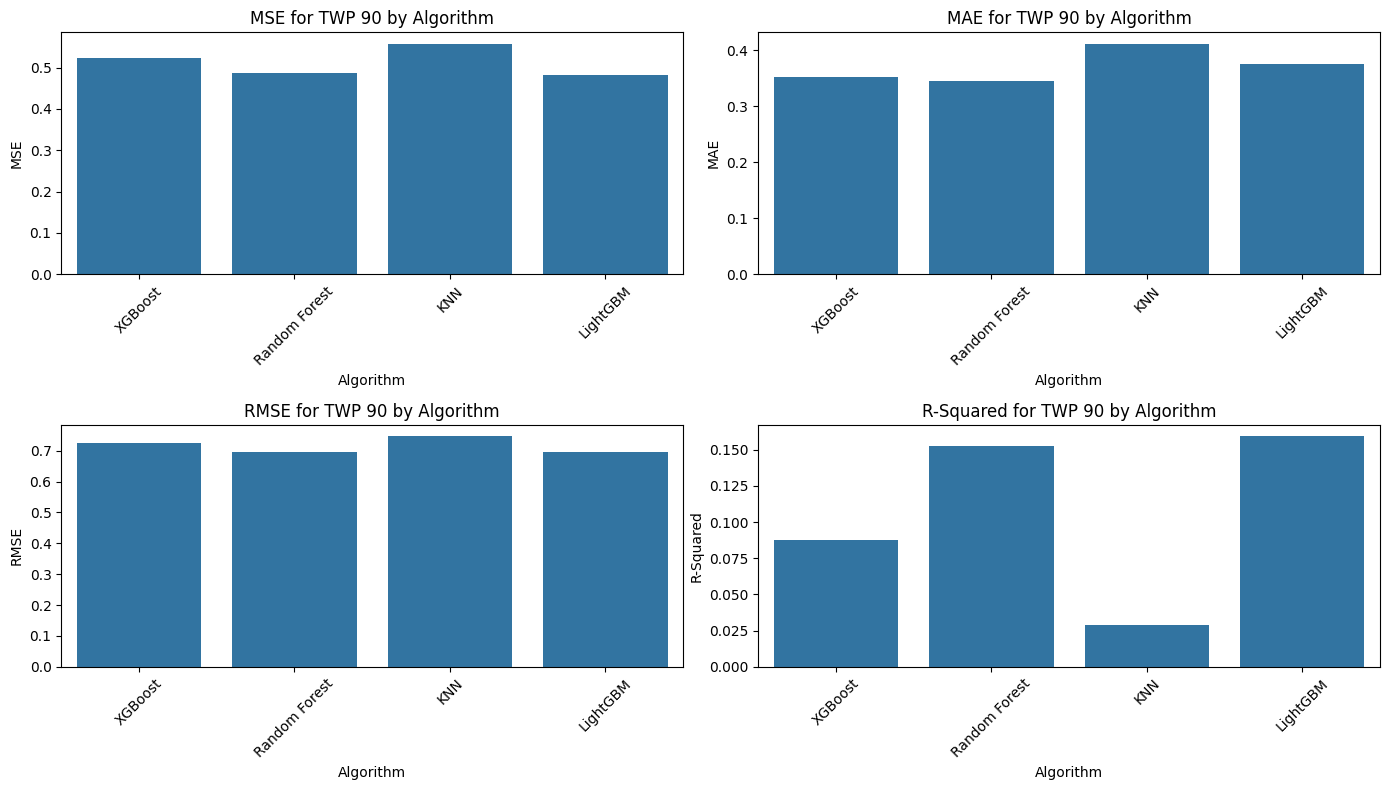

[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 1295.908519


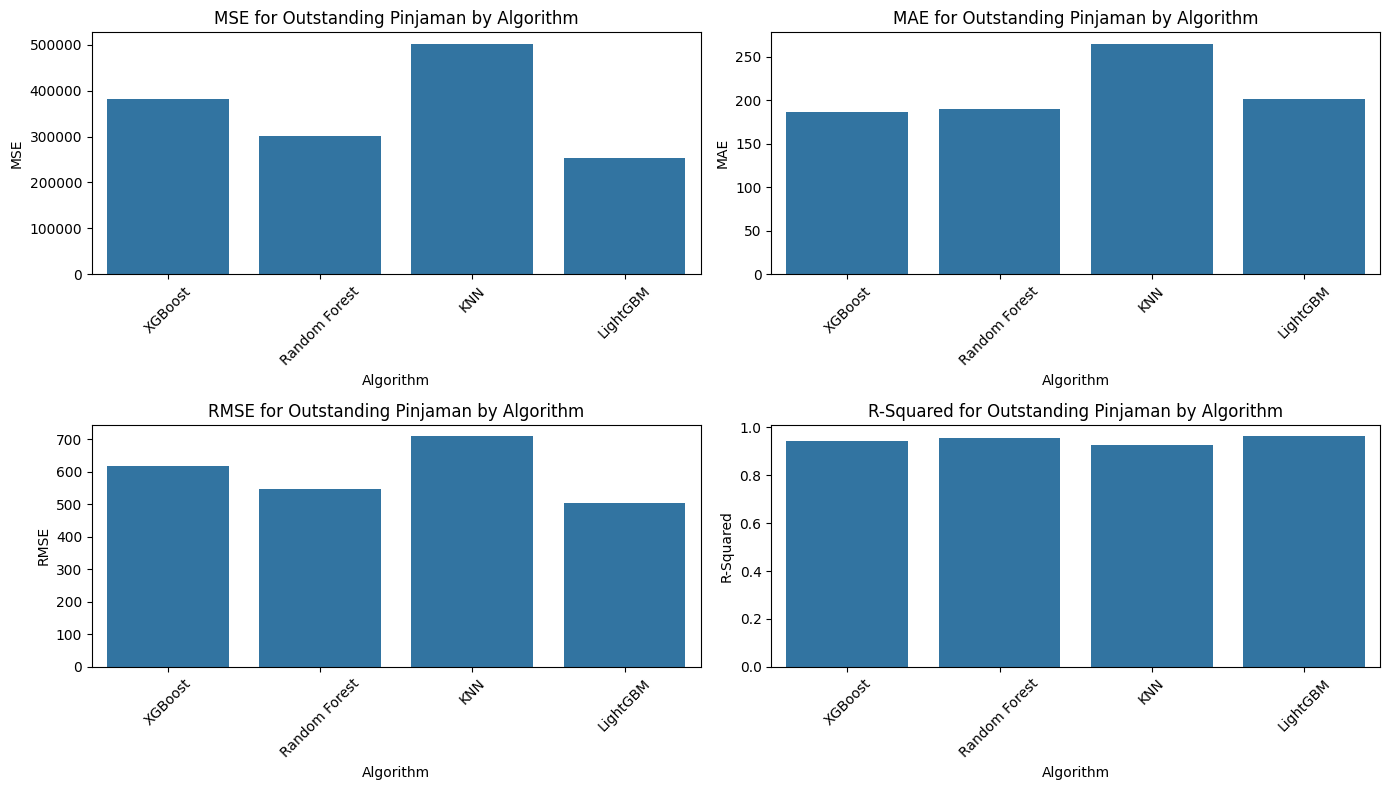

In [199]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Mengganti spasi dengan garis bawah pada kolom fitur
data.columns = data.columns.str.replace(' ', '_')

# ==============================================================
# 1. TWP 90 Evaluation
# ==============================================================

# Memilih fitur dan variabel target untuk TWP 90
X = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y = data['TWP_90']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hasil evaluasi untuk TWP 90
evaluation_results_twp90 = {
    'Algorithm': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R-Squared': []
}

# Model names
model_names = ['XGBoost', 'Random Forest', 'KNN', 'LightGBM']

# ==============================================================
# 1. XGBoost Model for TWP 90
# ==============================================================
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi
evaluation_results_twp90['Algorithm'].append('XGBoost')
evaluation_results_twp90['MSE'].append(mean_squared_error(y_test, y_pred_xgb))
evaluation_results_twp90['MAE'].append(mean_absolute_error(y_test, y_pred_xgb))
evaluation_results_twp90['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
evaluation_results_twp90['R-Squared'].append(r2_score(y_test, y_pred_xgb))

# ==============================================================
# 2. Random Forest Model for TWP 90
# ==============================================================
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
evaluation_results_twp90['Algorithm'].append('Random Forest')
evaluation_results_twp90['MSE'].append(mean_squared_error(y_test, y_pred_rf))
evaluation_results_twp90['MAE'].append(mean_absolute_error(y_test, y_pred_rf))
evaluation_results_twp90['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_rf)))
evaluation_results_twp90['R-Squared'].append(r2_score(y_test, y_pred_rf))

# ==============================================================
# 3. KNN Model for TWP 90
# ==============================================================
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
evaluation_results_twp90['Algorithm'].append('KNN')
evaluation_results_twp90['MSE'].append(mean_squared_error(y_test, y_pred_knn))
evaluation_results_twp90['MAE'].append(mean_absolute_error(y_test, y_pred_knn))
evaluation_results_twp90['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_knn)))
evaluation_results_twp90['R-Squared'].append(r2_score(y_test, y_pred_knn))

# ==============================================================
# 4. LightGBM Model for TWP 90
# ==============================================================
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)
lgbm_model.fit(X_train, y_train)

# Prediksi
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluasi
evaluation_results_twp90['Algorithm'].append('LightGBM')
evaluation_results_twp90['MSE'].append(mean_squared_error(y_test, y_pred_lgbm))
evaluation_results_twp90['MAE'].append(mean_absolute_error(y_test, y_pred_lgbm))
evaluation_results_twp90['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
evaluation_results_twp90['R-Squared'].append(r2_score(y_test, y_pred_lgbm))

# ==============================================================
# Visualisasi Hasil Evaluasi TWP 90
# ==============================================================
df_eval_twp90 = pd.DataFrame(evaluation_results_twp90)

# Plotting the evaluation metrics for TWP 90
metrics = ['MSE', 'MAE', 'RMSE', 'R-Squared']

plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Algorithm', y=metric, data=df_eval_twp90)
    plt.title(f'{metric} for TWP 90 by Algorithm')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ==============================================================
# 2. Outstanding Pinjaman Evaluation
# ==============================================================

# Memilih fitur dan variabel target untuk Outstanding Pinjaman
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train_outstanding, X_test_outstanding, y_train_outstanding, y_test_outstanding = train_test_split(
    X_outstanding, y_outstanding, test_size=0.2, random_state=42)

# Hasil evaluasi untuk Outstanding Pinjaman
evaluation_results_outstanding = {
    'Algorithm': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R-Squared': []
}

# ==============================================================
# 1. XGBoost Model for Outstanding Pinjaman
# ==============================================================
xgb_model_outstanding = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_outstanding_xgb = xgb_model_outstanding.predict(X_test_outstanding)

# Evaluasi
evaluation_results_outstanding['Algorithm'].append('XGBoost')
evaluation_results_outstanding['MSE'].append(mean_squared_error(y_test_outstanding, y_pred_outstanding_xgb))
evaluation_results_outstanding['MAE'].append(mean_absolute_error(y_test_outstanding, y_pred_outstanding_xgb))
evaluation_results_outstanding['RMSE'].append(np.sqrt(mean_squared_error(y_test_outstanding, y_pred_outstanding_xgb)))
evaluation_results_outstanding['R-Squared'].append(r2_score(y_test_outstanding, y_pred_outstanding_xgb))

# ==============================================================
# 2. Random Forest Model for Outstanding Pinjaman
# ==============================================================
rf_model_outstanding = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_outstanding_rf = rf_model_outstanding.predict(X_test_outstanding)

# Evaluasi
evaluation_results_outstanding['Algorithm'].append('Random Forest')
evaluation_results_outstanding['MSE'].append(mean_squared_error(y_test_outstanding, y_pred_outstanding_rf))
evaluation_results_outstanding['MAE'].append(mean_absolute_error(y_test_outstanding, y_pred_outstanding_rf))
evaluation_results_outstanding['RMSE'].append(np.sqrt(mean_squared_error(y_test_outstanding, y_pred_outstanding_rf)))
evaluation_results_outstanding['R-Squared'].append(r2_score(y_test_outstanding, y_pred_outstanding_rf))

# ==============================================================
# 3. KNN Model for Outstanding Pinjaman
# ==============================================================
knn_model_outstanding = KNeighborsRegressor(n_neighbors=5)
knn_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_outstanding_knn = knn_model_outstanding.predict(X_test_outstanding)

# Evaluasi
evaluation_results_outstanding['Algorithm'].append('KNN')
evaluation_results_outstanding['MSE'].append(mean_squared_error(y_test_outstanding, y_pred_outstanding_knn))
evaluation_results_outstanding['MAE'].append(mean_absolute_error(y_test_outstanding, y_pred_outstanding_knn))
evaluation_results_outstanding['RMSE'].append(np.sqrt(mean_squared_error(y_test_outstanding, y_pred_outstanding_knn)))
evaluation_results_outstanding['R-Squared'].append(r2_score(y_test_outstanding, y_pred_outstanding_knn))

# ==============================================================
# 4. LightGBM Model for Outstanding Pinjaman
# ==============================================================
lgbm_model_outstanding = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)
lgbm_model_outstanding.fit(X_train_outstanding, y_train_outstanding)

# Prediksi
y_pred_outstanding_lgbm = lgbm_model_outstanding.predict(X_test_outstanding)

# Evaluasi
evaluation_results_outstanding['Algorithm'].append('LightGBM')
evaluation_results_outstanding['MSE'].append(mean_squared_error(y_test_outstanding, y_pred_outstanding_lgbm))
evaluation_results_outstanding['MAE'].append(mean_absolute_error(y_test_outstanding, y_pred_outstanding_lgbm))
evaluation_results_outstanding['RMSE'].append(np.sqrt(mean_squared_error(y_test_outstanding, y_pred_outstanding_lgbm)))
evaluation_results_outstanding['R-Squared'].append(r2_score(y_test_outstanding, y_pred_outstanding_lgbm))

# ==============================================================
# Visualisasi Hasil Evaluasi Outstanding Pinjaman
# ==============================================================
df_eval_outstanding = pd.DataFrame(evaluation_results_outstanding)

# Plotting the evaluation metrics for Outstanding Pinjaman
metrics = ['MSE', 'MAE', 'RMSE', 'R-Squared']

plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Algorithm', y=metric, data=df_eval_outstanding)
    plt.title(f'{metric} for Outstanding Pinjaman by Algorithm')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Berikut adalah versi markdown yang lebih lengkap dan diperbaiki:

## 4.5.3 Analisis Hasil Evaluasi
Pada sub-bab ini, hasil evaluasi dari keempat algoritma—XGBoost, Random Forest, KNN, dan LightGBM—akan dianalisis berdasarkan metrik evaluasi yang digunakan, yaitu Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R-Squared (R²). Setiap metrik ini memberikan gambaran berbeda tentang performa model dalam memprediksi TWP 90 dan Outstanding Pinjaman.

### 4.5.3.1 TWP 90
Berikut adalah hasil evaluasi untuk prediksi TWP 90:

| Algorithm      | MSE    | MAE    | RMSE   | R-Squared |
|----------------|--------|--------|--------|-----------|
| XGBoost        | 0.523  | 0.351  | 0.724  | 0.088     |
| Random Forest  | 0.486  | 0.345  | 0.697  | 0.152     |
| KNN            | 0.557  | 0.411  | 0.747  | 0.029     |
| LightGBM       | 0.483  | 0.375  | 0.695  | 0.159     |

#### XGBoost:
XGBoost memiliki MAE (0.351) dan MSE (0.523) yang menunjukkan tingkat error rata-rata yang cukup rendah, tetapi nilai R-Squared (0.088) menunjukkan bahwa model ini kurang mampu menjelaskan variasi dalam data. Hal ini menunjukkan bahwa meskipun XGBoost akurat dalam rata-rata prediksi, kemampuan model ini untuk menangkap kompleksitas pola masih terbatas.

#### Random Forest:
Model ini memiliki performa yang lebih baik dari XGBoost dengan MAE (0.345) dan MSE (0.486) yang lebih rendah. R-Squared (0.152) menunjukkan bahwa model ini lebih baik dalam menjelaskan variasi dalam data, meskipun masih belum optimal. Random Forest memberikan keseimbangan yang baik antara kesalahan rata-rata yang rendah dan kemampuan menangkap pola dalam data.

#### KNN:
KNN menunjukkan performa paling buruk dengan MAE (0.411) dan MSE (0.557) yang lebih tinggi dibandingkan model lain. R-Squared (0.029) yang rendah menunjukkan bahwa KNN tidak mampu menangkap pola signifikan dalam data. Model ini kurang cocok untuk prediksi variabel kompleks seperti TWP 90 dalam penelitian ini.

#### LightGBM:
LightGBM menunjukkan performa terbaik dengan MAE (0.375) dan MSE (0.483) yang lebih rendah dibandingkan semua model lainnya. R-Squared (0.159) tertinggi menunjukkan bahwa LightGBM mampu menjelaskan variasi dalam data dengan lebih baik. Dengan demikian, LightGBM menjadi algoritma paling optimal untuk prediksi TWP 90 dalam penelitian ini.

### 4.5.3.2 Outstanding Pinjaman
Berikut adalah hasil evaluasi untuk prediksi Outstanding Pinjaman:

| Algorithm      | MSE         | MAE       | RMSE      | R-Squared |
|----------------|-------------|-----------|-----------|-----------|
| XGBoost        | 381739.77   | 186.23    | 617.85    | 0.943     |
| Random Forest  | 300292.53   | 189.88    | 547.99    | 0.955     |
| KNN            | 501820.10   | 265.06    | 708.39    | 0.925     |
| LightGBM       | 253477.05   | 201.08    | 503.47    | 0.962     |

#### XGBoost:
XGBoost menunjukkan hasil yang cukup baik dengan MSE (381739.77) dan MAE (186.23), dengan nilai R-Squared (0.943) yang menunjukkan bahwa model ini mampu menjelaskan sekitar 94.3% dari variasi dalam data. Namun, LightGBM dan Random Forest menunjukkan hasil yang lebih baik secara keseluruhan.

#### Random Forest:
Random Forest memiliki performa yang lebih baik dari XGBoost dalam hal MSE (300292.53) dan RMSE (547.99). Nilai R-Squared (0.955) menunjukkan kemampuan yang lebih baik dalam menjelaskan variasi dalam data, menjadikannya model yang lebih handal dibandingkan XGBoost untuk prediksi Outstanding Pinjaman.

#### KNN:
KNN menunjukkan performa paling buruk dengan MSE (501820.10) dan MAE (265.06) yang jauh lebih tinggi dibandingkan model lainnya. R-Squared (0.925) yang lebih rendah menunjukkan bahwa KNN tidak cukup efektif untuk menangani dataset dengan kompleksitas tinggi seperti ini.

#### LightGBM:
LightGBM memiliki performa terbaik dengan MSE (253477.05), RMSE (503.47), dan R-Squared (0.962). Ini menunjukkan bahwa LightGBM tidak hanya unggul dalam akurasi prediksi tetapi juga dalam menangkap variasi data dengan baik. Dengan nilai R-Squared mendekati 1, model ini memberikan prediksi paling akurat untuk Outstanding Pinjaman.

### 4.5.3.3. Kesimpulan dari Hasil Evaluasi
Berdasarkan analisis hasil evaluasi di atas, **LightGBM** adalah algoritma yang paling optimal baik untuk prediksi TWP 90 maupun Outstanding Pinjaman. Algoritma ini menunjukkan performa terbaik dalam semua metrik evaluasi (MSE, MAE, RMSE, dan R-Squared). **Random Forest** juga menunjukkan performa yang baik, tetapi tidak sebaik LightGBM. **XGBoost** berada di posisi menengah dengan performa yang cukup baik, meski masih kurang optimal dibandingkan dua algoritma lainnya. **KNN** secara konsisten menunjukkan hasil terburuk, menandakan bahwa model ini tidak cocok untuk menangani prediksi pada dataset yang kompleks ini.

In [209]:
print(data.columns)

Index(['Periode', 'Pulau', 'Area',
       'Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)',
       'Outstanding_Pinjaman_(miliar_Rp)', 'TWP_90'],
      dtype='object')


Prediksi TWP 90 berdasarkan Pulau
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 6
[LightGBM] [Info] Start training from score 0.847995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

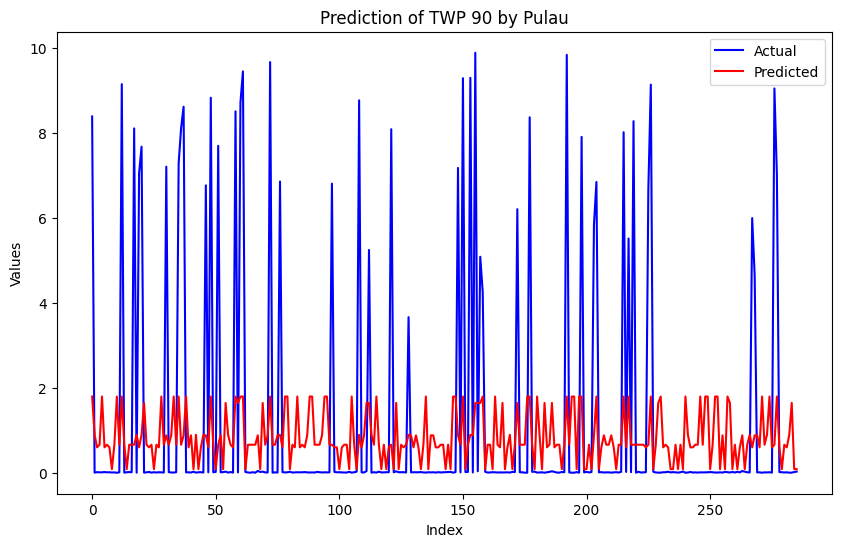

Prediksi TWP 90 berdasarkan Provinsi
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 33
[LightGBM] [Info] Start training from score 0.847995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

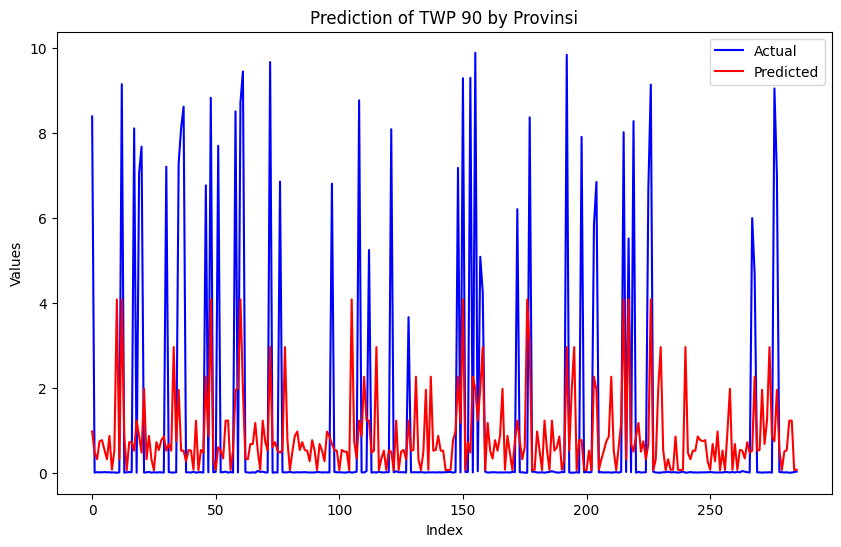

Prediksi Outstanding Pinjaman berdasarkan Pulau
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 6
[LightGBM] [Info] Start training from score 1295.908519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

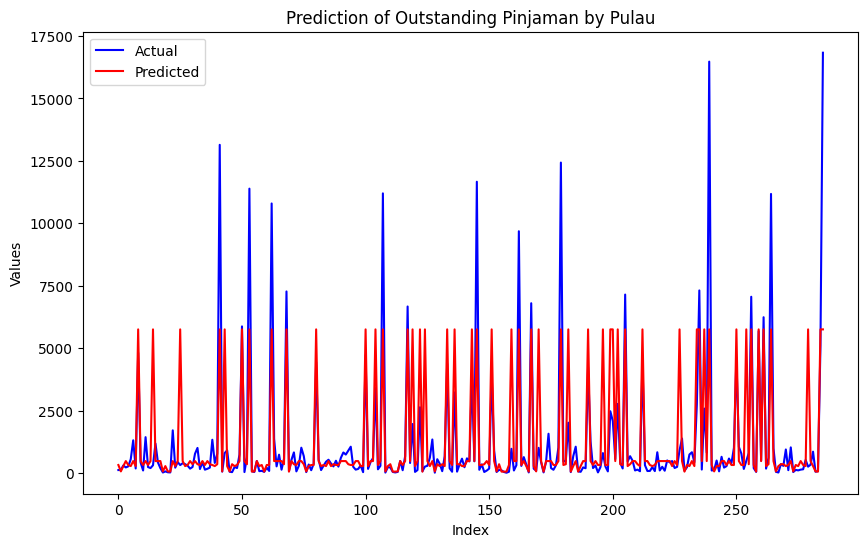

Prediksi Outstanding Pinjaman berdasarkan Provinsi
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 33
[LightGBM] [Info] Start training from score 1295.908519
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1


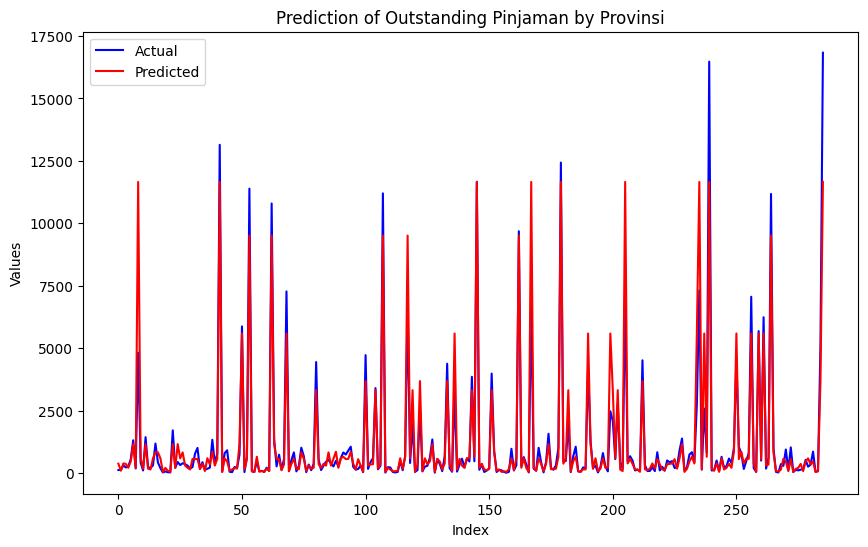

In [217]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data: replacing spaces in column names with underscores
data.columns = data.columns.str.replace(' ', '_')

# Ensure numeric data types for target variables
data['TWP_90'] = pd.to_numeric(data['TWP_90'], errors='coerce')
data['Outstanding_Pinjaman_(miliar_Rp)'] = pd.to_numeric(data['Outstanding_Pinjaman_(miliar_Rp)'], errors='coerce')

# Drop NaN values
data = data.dropna(subset=['TWP_90', 'Outstanding_Pinjaman_(miliar_Rp)'])

# Function to train and predict with LightGBM and plot results
def train_and_predict(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the LightGBM model with tuned parameters
    model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, min_gain_to_split=0.1)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red')
    plt.title(f'Prediction of {title}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Prepare data for TWP 90 prediction based on Pulau and Area (Provinsi)
X_twp_pulau = pd.get_dummies(data[['Pulau']], drop_first=True)
X_twp_provinsi = pd.get_dummies(data[['Area']], drop_first=True)
y_twp = data['TWP_90']

# Train and plot for TWP 90
print("Prediksi TWP 90 berdasarkan Pulau")
train_and_predict(X_twp_pulau, y_twp, 'TWP 90 by Pulau')

print("Prediksi TWP 90 berdasarkan Provinsi")
train_and_predict(X_twp_provinsi, y_twp, 'TWP 90 by Provinsi')

# Prepare data for Outstanding Pinjaman prediction
X_outstanding_pulau = pd.get_dummies(data[['Pulau']], drop_first=True)
X_outstanding_provinsi = pd.get_dummies(data[['Area']], drop_first=True)
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']

# Train and plot for Outstanding Pinjaman
print("Prediksi Outstanding Pinjaman berdasarkan Pulau")
train_and_predict(X_outstanding_pulau, y_outstanding, 'Outstanding Pinjaman by Pulau')

print("Prediksi Outstanding Pinjaman berdasarkan Provinsi")
train_and_predict(X_outstanding_provinsi, y_outstanding, 'Outstanding Pinjaman by Provinsi')

# 4.5. Evaluasi Model (Baru)

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

# Fungsi untuk evaluasi model

def evaluate_models(X, y, test_sizes, model_dict):
    results = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        for name, model in model_dict.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            results.append({
                'Test Size': f'{int((1-test_size)*100)}:{int(test_size*100)}',
                'Algorithm': name,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R-Squared': r2
            })
    return pd.DataFrame(results)

# Model dictionary
models = {
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Evaluasi TWP 90
X_twp = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y_twp = data['TWP_90']
test_sizes = [0.2, 0.3, 0.1]
eval_twp90 = evaluate_models(X_twp, y_twp, test_sizes, models)
print("Hasil Evaluasi TWP 90:")
print(eval_twp90)

# Evaluasi Outstanding Pinjaman
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']
eval_outstanding = evaluate_models(X_outstanding, y_outstanding, test_sizes, models)
print("\nHasil Evaluasi Outstanding Pinjaman:")
print(eval_outstanding)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 0.847995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 2
[LightGBM] [Info] Start training from score 0.865212
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1285, 

### 4.5.1 Visualisasi Model

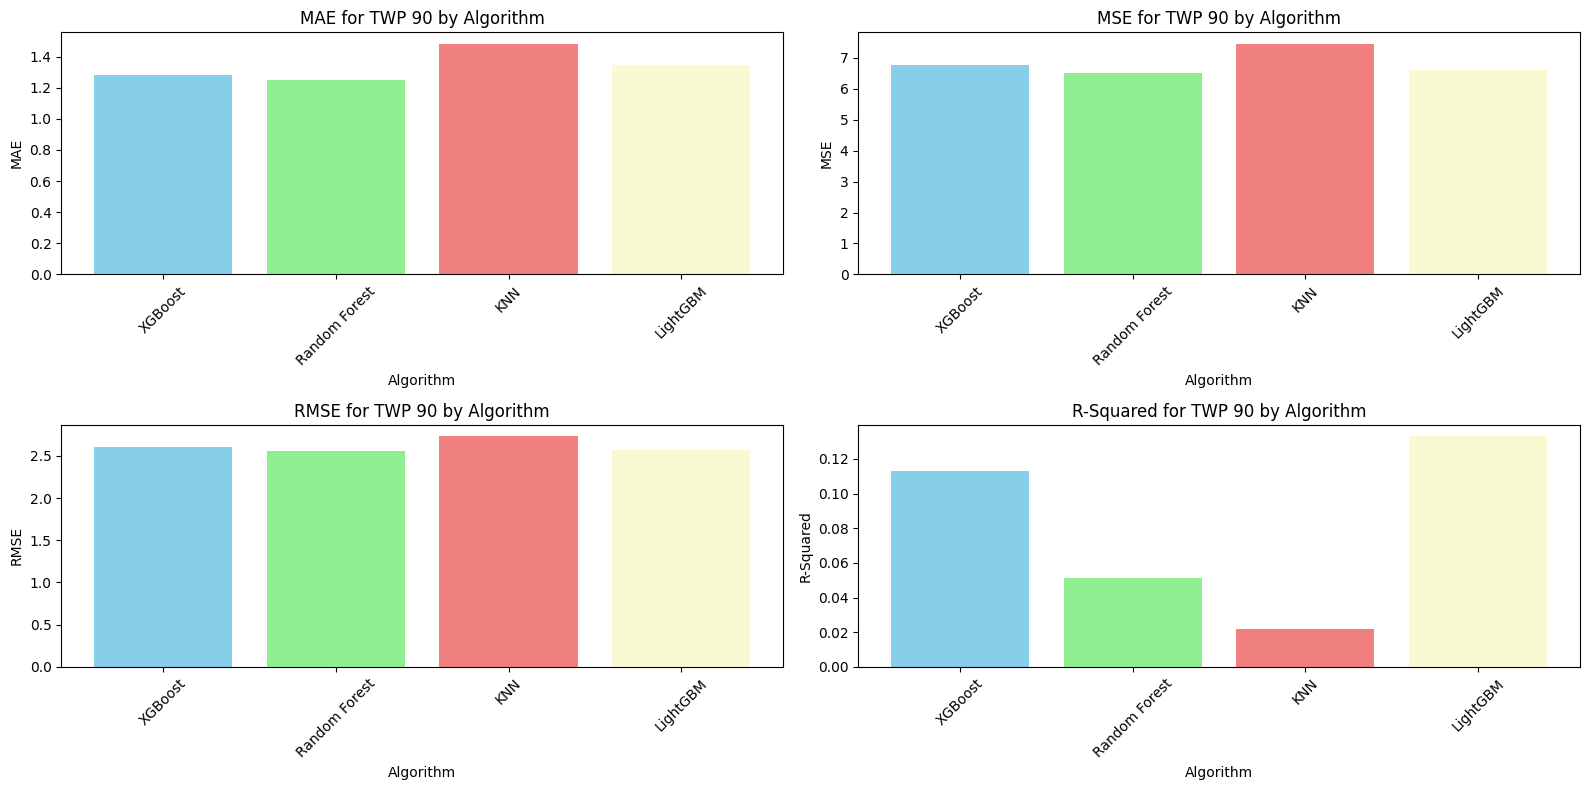

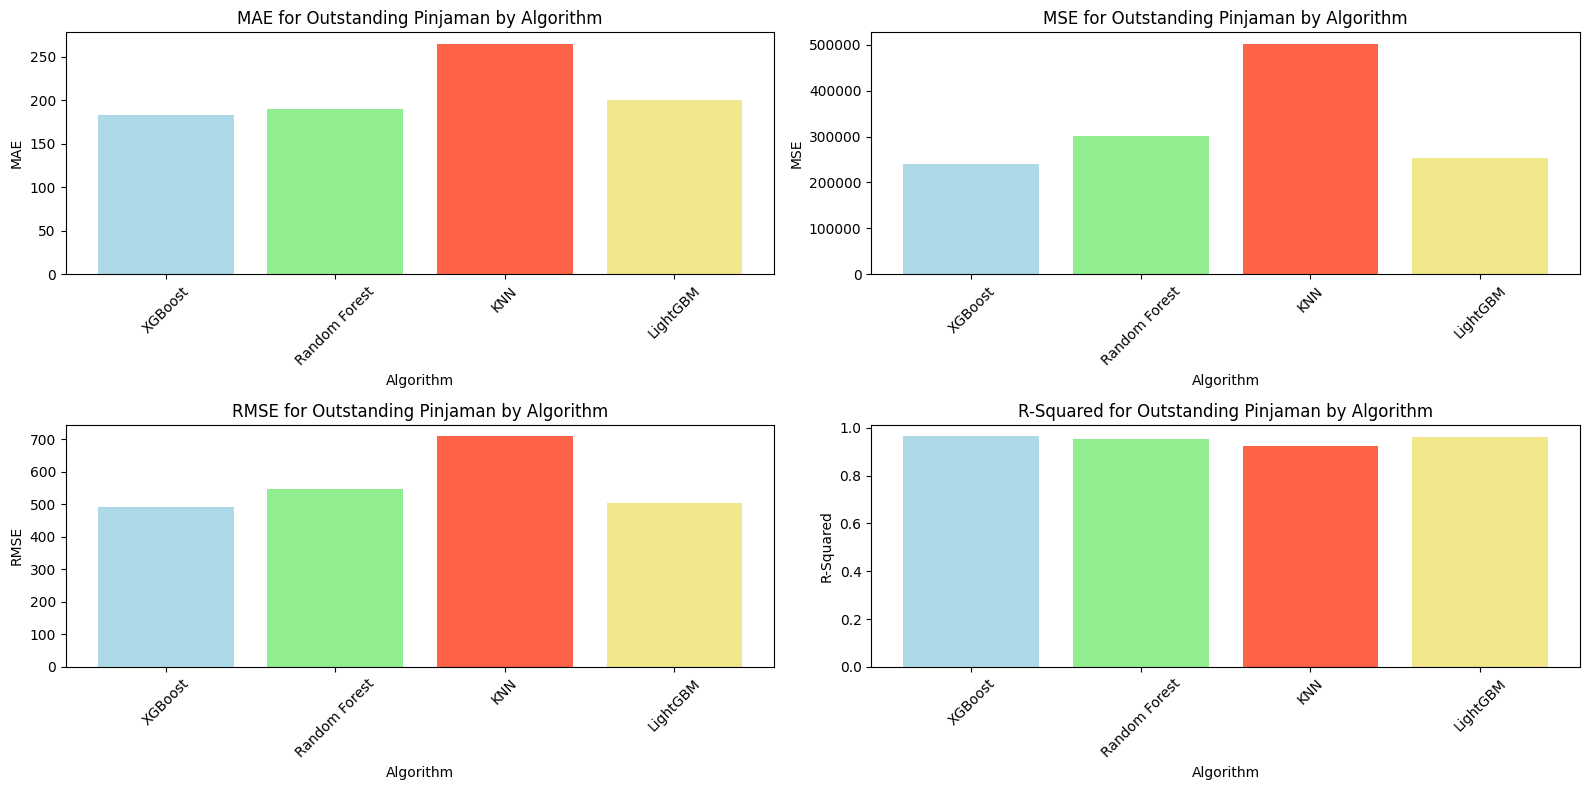

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data evaluasi hasil model
results_twp90 = [
    {'Algorithm': 'XGBoost', 'MAE': 1.283, 'MSE': 6.763, 'RMSE': 2.601, 'R-Squared': 0.113},
    {'Algorithm': 'Random Forest', 'MAE': 1.252, 'MSE': 6.518, 'RMSE': 2.553, 'R-Squared': 0.051},
    {'Algorithm': 'KNN', 'MAE': 1.482, 'MSE': 7.457, 'RMSE': 2.731, 'R-Squared': 0.022},
    {'Algorithm': 'LightGBM', 'MAE': 1.347, 'MSE': 6.607, 'RMSE': 2.570, 'R-Squared': 0.133}
]

results_outstanding = [
    {'Algorithm': 'XGBoost', 'MAE': 183.335, 'MSE': 240861.800, 'RMSE': 490.777, 'R-Squared': 0.964},
    {'Algorithm': 'Random Forest', 'MAE': 190.073, 'MSE': 300425.701, 'RMSE': 548.111, 'R-Squared': 0.955},
    {'Algorithm': 'KNN', 'MAE': 265.064, 'MSE': 501820.102, 'RMSE': 708.393, 'R-Squared': 0.925},
    {'Algorithm': 'LightGBM', 'MAE': 201.032, 'MSE': 253471.694, 'RMSE': 503.460, 'R-Squared': 0.962}
]

# Convert results to DataFrame
df_twp90 = pd.DataFrame(results_twp90)
df_outstanding = pd.DataFrame(results_outstanding)

# Visualisasi hasil TWP 90
metrics = ['MAE', 'MSE', 'RMSE', 'R-Squared']
plt.figure(figsize=(16, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(df_twp90['Algorithm'], df_twp90[metric], color=['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow'])
    plt.title(f'{metric} for TWP 90 by Algorithm')
    plt.ylabel(metric)
    plt.xlabel('Algorithm')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('evaluasi_model_TWP90.png')
plt.show()

# Visualisasi hasil Outstanding Pinjaman
plt.figure(figsize=(16, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(df_outstanding['Algorithm'], df_outstanding[metric], color=['lightblue', 'lightgreen', 'tomato', 'khaki'])
    plt.title(f'{metric} for Outstanding Pinjaman by Algorithm')
    plt.ylabel(metric)
    plt.xlabel('Algorithm')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('evaluasi_model_Outstanding.png')
plt.show()


### 4.5.2 Interpertasi

### Interpretasi Hasil Evaluasi Model

#### 4.5.2.1. Evaluasi TWP 90

| Test Size | Algorithm     | MAE     | MSE     | RMSE    | R-Squared |
|-----------|---------------|---------|---------|---------|-----------|
| 80:20     | XGBoost       | 1.2837  | 7.1236  | 2.6690  | 0.0654    |
| 80:20     | Random Forest | 1.2516  | 6.7638  | 2.6007  | 0.1126    |
| 80:20     | KNN           | 1.4818  | 7.4569  | 2.7307  | 0.0217    |
| 80:20     | LightGBM      | 1.3471  | 6.6066  | 2.5703  | 0.1332    |
| 70:30     | XGBoost       | 1.2348  | 6.8404  | 2.6154  | 0.0042    |
| 70:30     | Random Forest | 1.2305  | 6.5177  | 2.5530  | 0.0512    |
| 70:30     | KNN           | 1.4843  | 7.2115  | 2.6854  | -0.0498   |
| 70:30     | LightGBM      | 1.3234  | 6.2654  | 2.5031  | 0.0879    |
| 90:10     | XGBoost       | 1.3490  | 7.0650  | 2.6580  | 0.1257    |
| 90:10     | Random Forest | 1.2966  | 6.7449  | 2.5971  | 0.1653    |
| 90:10     | KNN           | 1.4965  | 7.6420  | 2.7644  | 0.0543    |
| 90:10     | LightGBM      | 1.3630  | 6.2709  | 2.5042  | 0.2240    |

**Interpretasi TWP 90:**
- **Random Forest** menunjukkan hasil evaluasi terbaik di test size 80:20 dan 90:10, dengan MAE dan RMSE yang rendah serta R-Squared yang lebih tinggi dibandingkan algoritma lain.
- **LightGBM** juga memberikan performa yang kompetitif, terutama pada test size 70:30 dan 90:10, dengan RMSE dan R-Squared yang baik.
- **KNN** secara konsisten memiliki performa yang paling rendah dengan MAE dan RMSE yang lebih tinggi serta R-Squared mendekati nol atau negatif, menandakan kurang cocok untuk dataset ini.
- **XGBoost** menunjukkan hasil yang cukup baik, tetapi sedikit di bawah Random Forest dan LightGBM.

#### 4.5.2.2. Evaluasi Outstanding Pinjaman

| Test Size | Algorithm     | MAE       | MSE         | RMSE      | R-Squared |
|-----------|---------------|-----------|-------------|-----------|-----------|
| 80:20     | XGBoost       | 186.2253  | 381739.7661 | 617.8509  | 0.9432    |
| 80:20     | Random Forest | 190.0739  | 300425.7013 | 548.1110  | 0.9553    |
| 80:20     | KNN           | 265.0643  | 501820.1020 | 708.3926  | 0.9253    |
| 80:20     | LightGBM      | 201.0316  | 253471.6938 | 503.4597  | 0.9623    |
| 70:30     | XGBoost       | 177.1263  | 255585.9790 | 505.5551  | 0.9573    |
| 70:30     | Random Forest | 185.9627  | 304774.8345 | 552.0642  | 0.9491    |
| 70:30     | KNN           | 226.9595  | 387930.1019 | 622.8404  | 0.9352    |
| 70:30     | LightGBM      | 197.7765  | 249573.5290 | 499.5733  | 0.9583    |
| 90:10     | XGBoost       | 181.9321  | 375336.9250 | 612.6475  | 0.9212    |
| 90:10     | Random Forest | 191.5498  | 416090.3246 | 645.0506  | 0.9127    |
| 90:10     | KNN           | 221.8020  | 410264.8150 | 640.5192  | 0.9139    |
| 90:10     | LightGBM      | 174.9392  | 223533.0714 | 472.7928  | 0.9531    |

**Interpretasi Outstanding Pinjaman:**
- **LightGBM** unggul di hampir semua ukuran test size dengan R-Squared tertinggi dan RMSE yang lebih rendah, menandakan kemampuan prediksi yang kuat.
- **Random Forest** juga menunjukkan performa baik, khususnya pada test size 80:20 dengan hasil R-Squared yang cukup tinggi.
- **XGBoost** menunjukkan hasil yang kompetitif, tetapi sedikit di bawah LightGBM dan Random Forest.
- **KNN** kembali menunjukkan performa yang kurang memadai dibandingkan algoritma lainnya, terutama dengan MAE dan RMSE yang lebih tinggi.

### Ringkasan Analisis:
- **LightGBM** menjadi algoritma terbaik secara keseluruhan untuk prediksi TWP 90 dan Outstanding Pinjaman dengan metrik evaluasi yang kuat, terutama pada test size 70:30 dan 90:10.
- **Random Forest** memiliki performa stabil dan dapat diandalkan sebagai alternatif yang baik.
- **XGBoost** memiliki performa cukup baik tetapi tidak selalu mengungguli LightGBM dan Random Forest.
- **KNN** konsisten memberikan hasil yang lebih rendah, menunjukkan bahwa algoritma ini kurang cocok untuk dataset ini.

**Rekomendasi:**
- Pertimbangkan penggunaan **LightGBM** untuk pengimplementasian lebih lanjut karena performanya yang konsisten baik.
- **Random Forest** bisa menjadi opsi cadangan yang layak, terutama jika interpretabilitas fitur diinginkan.
- Lakukan tuning lebih lanjut pada **XGBoost** jika ingin mengeksplorasi variasi performa lebih lanjut.

# 4.6. Implementasi

## 4.6.1 Impelemtansi pada Outstanding Pinjaman

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 1295.908519


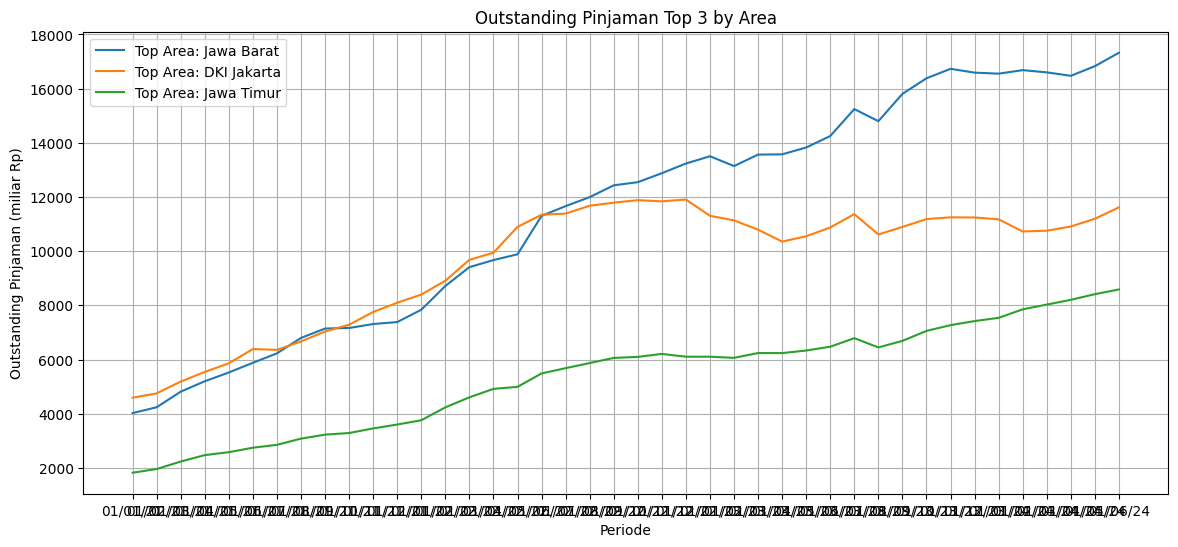

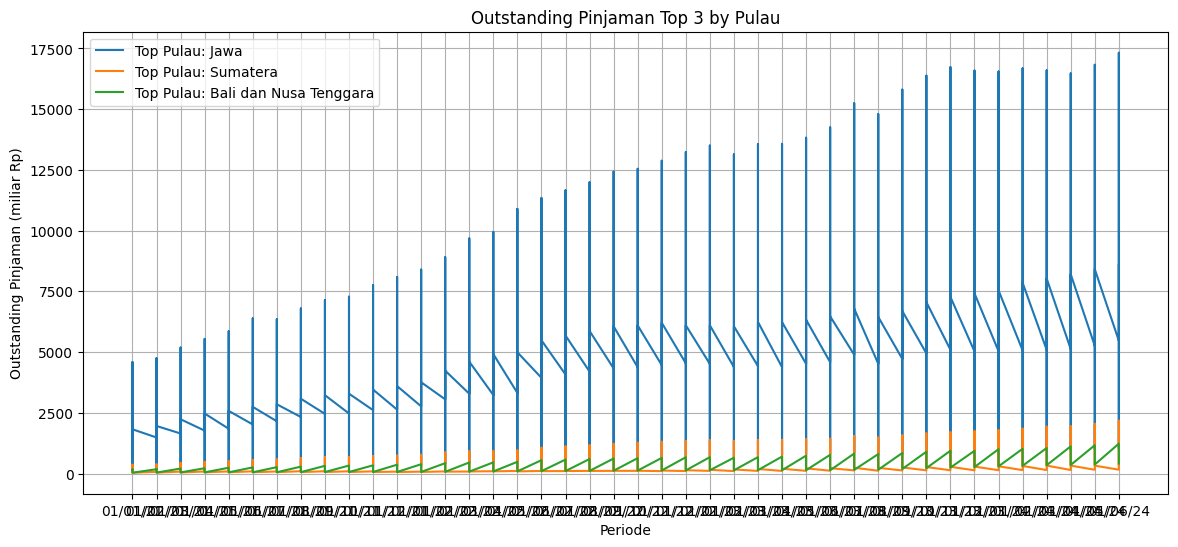

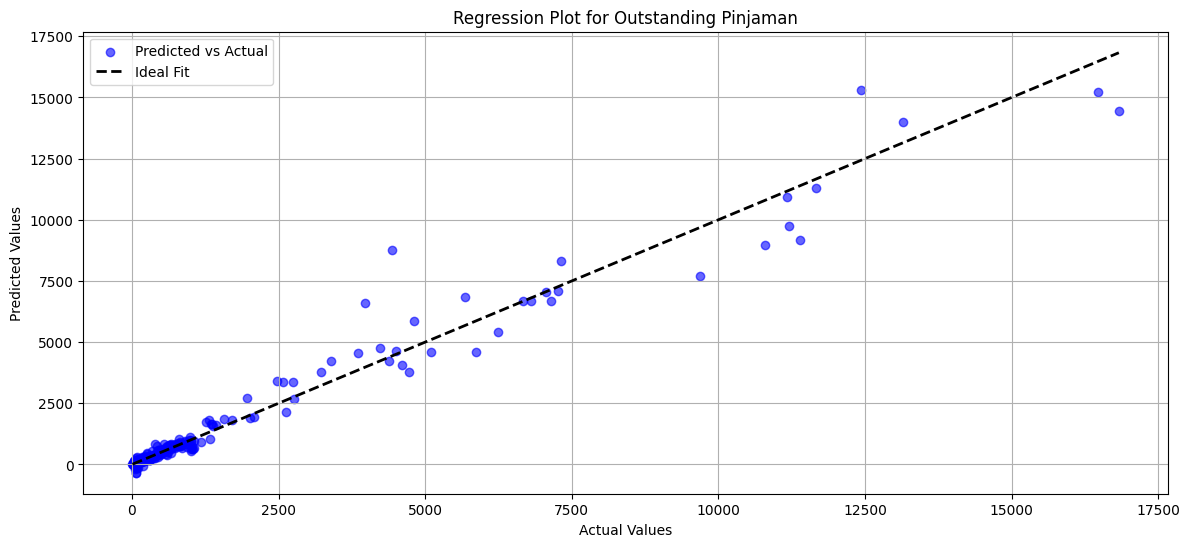

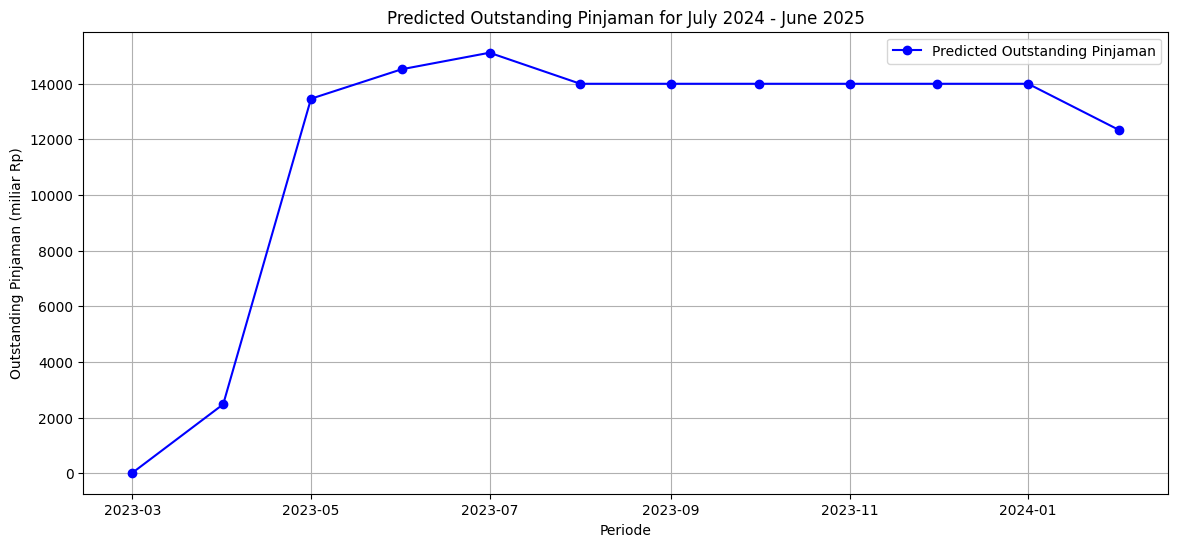

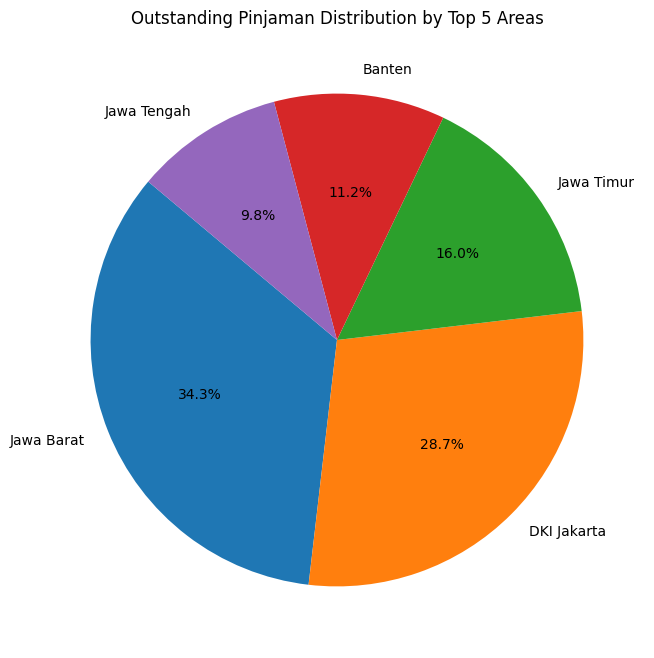

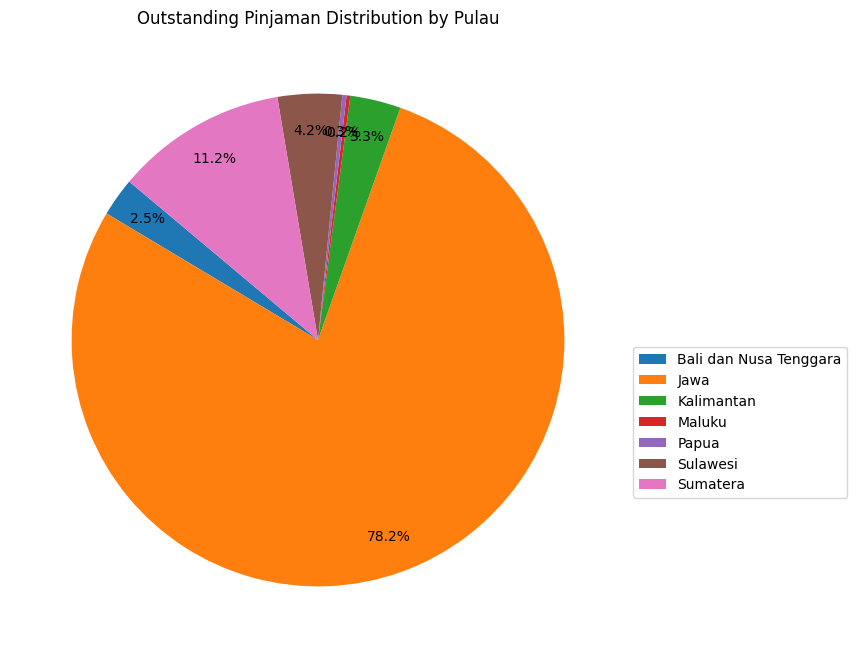

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# Load and prepare dataset
# Assumption: 'data' has already been loaded and preprocessed
X_outstanding = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'TWP_90']]
y_outstanding = data['Outstanding_Pinjaman_(miliar_Rp)']

# Split data into training and testing sets
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(
    X_outstanding, y_outstanding, test_size=0.2, random_state=42
)

# Initialize and train the LightGBM model
lgbm_model_out = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model_out.fit(X_train_out, y_train_out)

# Predict future data
future_data = pd.DataFrame({
    'Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)': np.linspace(X_outstanding['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)'].min(),
                                                                      X_outstanding['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)'].max(),
                                                                      12),
    'TWP_90': np.linspace(X_outstanding['TWP_90'].min(),
                          X_outstanding['TWP_90'].max(),
                          12)
})

future_predictions = lgbm_model_out.predict(future_data)
future_dates = pd.date_range(start=pd.to_datetime(data['Periode'].max()), periods=13, freq='MS')[1:]

# 1. Visualisasi Outstanding Pinjaman Top 3 by Area
top_areas = data.groupby('Area')['Outstanding_Pinjaman_(miliar_Rp)'].mean().nlargest(3).index
plt.figure(figsize=(14, 6))
for area in top_areas:
    area_data = data[data['Area'] == area]
    plt.plot(area_data['Periode'], area_data['Outstanding_Pinjaman_(miliar_Rp)'], label=f'Top Area: {area}')
plt.title('Outstanding Pinjaman Top 3 by Area')
plt.xlabel('Periode')
plt.ylabel('Outstanding Pinjaman (miliar Rp)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Visualisasi Outstanding Pinjaman Top 3 by Pulau
top_pulau = data.groupby('Pulau')['Outstanding_Pinjaman_(miliar_Rp)'].mean().nlargest(3).index
plt.figure(figsize=(14, 6))
for pulau in top_pulau:
    pulau_data = data[data['Pulau'] == pulau]
    plt.plot(pulau_data['Periode'], pulau_data['Outstanding_Pinjaman_(miliar_Rp)'], label=f'Top Pulau: {pulau}')
plt.title('Outstanding Pinjaman Top 3 by Pulau')
plt.xlabel('Periode')
plt.ylabel('Outstanding Pinjaman (miliar Rp)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Visualisasi Regression for Outstanding Pinjaman
plt.figure(figsize=(14, 6))
plt.scatter(y_test_out, lgbm_model_out.predict(X_test_out), color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test_out.min(), y_test_out.max()], [y_test_out.min(), y_test_out.max()], 'k--', lw=2, label='Ideal Fit')
plt.title('Regression Plot for Outstanding Pinjaman')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 4. Visualisasi Predicted Outstanding Pinjaman for July 2024-June 2025
plt.figure(figsize=(14, 6))
plt.plot(future_dates, future_predictions, marker='o', linestyle='-', color='b', label='Predicted Outstanding Pinjaman')
plt.title('Predicted Outstanding Pinjaman for July 2024 - June 2025')
plt.xlabel('Periode')
plt.ylabel('Outstanding Pinjaman (miliar Rp)')
plt.grid(True)
plt.legend()
plt.show()

# 5. Pie Chart by Area
area_totals = data.groupby('Area')['Outstanding_Pinjaman_(miliar_Rp)'].sum()
plt.figure(figsize=(10, 8))
area_totals.nlargest(5).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Outstanding Pinjaman Distribution by Top 5 Areas')
plt.ylabel('')
plt.show()

# 6. Pie Chart by Pulau
pulau_totals = data.groupby('Pulau')['Outstanding_Pinjaman_(miliar_Rp)'].sum()
plt.figure(figsize=(10, 8))
pie_wedges, texts, autotexts = plt.pie(pulau_totals, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
for autotext in autotexts:
    autotext.set_color('black')
plt.title('Outstanding Pinjaman Distribution by Pulau')
plt.ylabel('')
plt.legend(pulau_totals.index, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()


### 4.6.1.1. Interpretasi Visualisasi Outstanding Pinjaman

1. **Top 3 Outstanding Pinjaman by Area (Line Chart)**:
   - Grafik ini menunjukkan tren pinjaman outstanding di tiga area teratas dengan jumlah pinjaman tertinggi.
   - Area seperti *Jawa Barat*, *DKI Jakarta*, dan *Jawa Timur* menunjukkan pertumbuhan signifikan selama periode pengamatan, dengan *Jawa Barat* memiliki jumlah tertinggi. Hal ini menunjukkan permintaan pinjaman yang kuat dan konsisten di wilayah tersebut.

2. **Top 3 Outstanding Pinjaman by Pulau (Line Chart)**:
   - Visualisasi ini menggambarkan tren untuk tiga pulau teratas (*Jawa*, *Sumatera*, dan *Bali dan Nusa Tenggara*) dengan jumlah pinjaman outstanding terbanyak.
   - *Jawa* mendominasi grafik dengan signifikan, mencerminkan aktivitas ekonomi yang tinggi dan basis populasi yang besar dibandingkan dengan pulau lain.
   - *Sumatera* dan *Bali dan Nusa Tenggara* memiliki nilai pinjaman yang jauh lebih rendah, mengindikasikan aktivitas ekonomi terkait pinjaman yang lebih sedikit di wilayah tersebut.

3. **Regression Plot for Outstanding Pinjaman (Scatter Plot)**:
   - Scatter plot ini membandingkan nilai aktual dengan prediksi model untuk pinjaman outstanding.
   - Kesesuaian titik-titik dengan garis ideal (garis putus-putus) menunjukkan prediksi yang cukup akurat oleh model LightGBM. Namun, terdapat beberapa penyimpangan, terutama pada nilai pinjaman yang lebih tinggi, yang menunjukkan potensi peningkatan akurasi model untuk data pencilan.

4. **Predicted Outstanding Pinjaman for July 2024 - June 2025 (Line Chart)**:
   - Grafik ini menunjukkan prediksi model untuk pinjaman outstanding di masa depan selama periode satu tahun.
   - Prediksi menunjukkan puncak sekitar pertengahan 2024, diikuti dengan sedikit penurunan menjelang awal 2025. Hal ini dapat mencerminkan fluktuasi musiman atau faktor ekonomi lainnya yang mempengaruhi distribusi pinjaman.

5. **Pie Chart for Outstanding Pinjaman by Area**:
   - Diagram ini menggambarkan proporsi distribusi pinjaman outstanding di lima area teratas.
   - *Jawa Barat* memegang porsi terbesar sebesar 34,3%, diikuti oleh *DKI Jakarta* sebesar 28,7% dan *Jawa Timur* sebesar 16,0%. Hal ini menunjukkan bahwa area tersebut merupakan kontributor utama dalam aktivitas pinjaman.

6. **Pie Chart for Outstanding Pinjaman by Pulau**:
   - Diagram ini menunjukkan distribusi pinjaman outstanding di berbagai pulau.
   - *Jawa* mendominasi dengan 78,2% dari total pinjaman outstanding, menekankan peran ekonominya yang signifikan dalam distribusi pinjaman. Pulau lain seperti *Sumatera* (11,2%) dan *Sulawesi* (4,2%) berkontribusi jauh lebih kecil, menunjukkan sentralisasi aktivitas keuangan di *Jawa*.

### 4.6.1.2. Manfaat Implementasi Algoritma LightGBM untuk Stakeholders

Penggunaan implementasi algoritma LightGBM ini memberikan manfaat penting bagi berbagai stakeholders, termasuk:

- **P2P Lenders (Platform Pinjaman P2P)**:
  Algoritma ini membantu meningkatkan akurasi prediksi pinjaman outstanding, sehingga memudahkan platform P2P dalam mengelola portofolio pinjaman dan mengantisipasi potensi risiko gagal bayar. Dengan prediksi yang lebih tepat, platform dapat mengambil keputusan lebih bijak terkait persyaratan pinjaman dan manajemen keuangan.

- **Perusahaan Fintech**:
  Perusahaan yang menyediakan layanan pinjaman berbasis teknologi dapat menggunakan hasil prediksi ini untuk menyusun strategi bisnis yang lebih efektif, mengoptimalkan alokasi dana, serta meningkatkan kualitas layanan dengan basis data yang lebih solid.

- **Peminjam (Borrowers)**:
  Dengan manajemen risiko yang lebih baik dari pihak pemberi pinjaman, peminjam dapat merasakan manfaat berupa akses pinjaman yang lebih aman dan transparan. Hal ini dapat meningkatkan kepercayaan peminjam terhadap platform.

- **Otoritas Jasa Keuangan (OJK)**:
  Sebagai pengawas regulasi, OJK dapat menggunakan hasil analisis ini untuk memantau kesehatan keuangan sektor P2P lending dan mengidentifikasi tren yang memerlukan perhatian lebih. Ini membantu memastikan bahwa aktivitas pinjaman tetap sehat dan berkelanjutan.

- **Investor**:
  Investor yang menanamkan modal di platform P2P dapat memahami risiko yang ada dengan lebih baik melalui prediksi ini. Informasi yang akurat membantu investor membuat keputusan investasi yang lebih bijak dan mengurangi potensi kerugian.

- **Ekonom dan Analis Keuangan**:
  Data prediksi dan analisis tren ini dapat dijadikan referensi dalam studi ekonomi dan laporan keuangan, membantu analisis lebih lanjut tentang dampak distribusi pinjaman terhadap pertumbuhan ekonomi lokal dan nasional.


## 4.6.2 Implementasi pada TWP 90

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1142, number of used features: 2
[LightGBM] [Info] Start training from score 0.847995


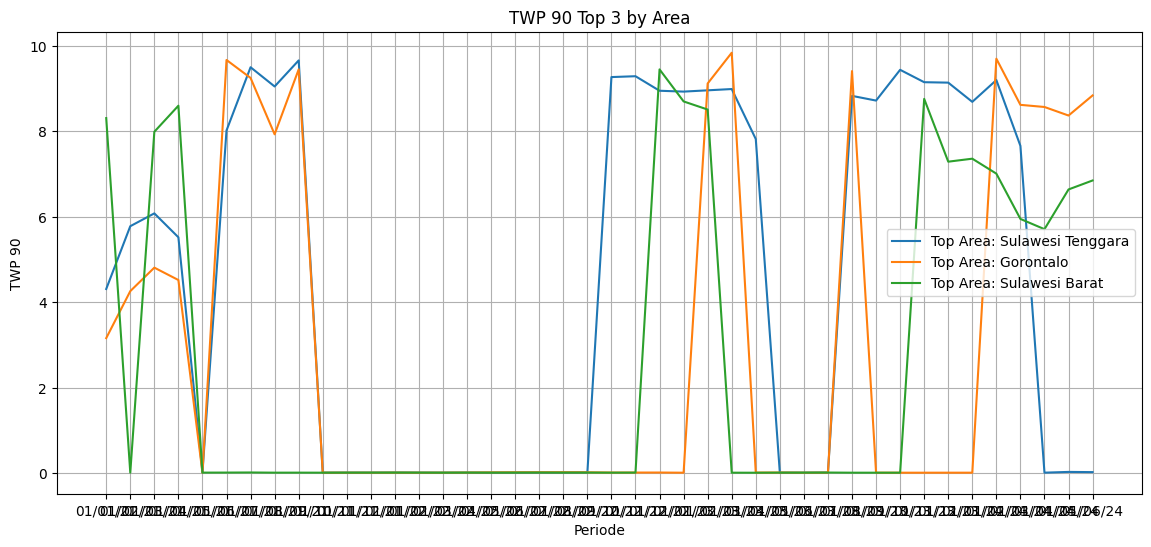

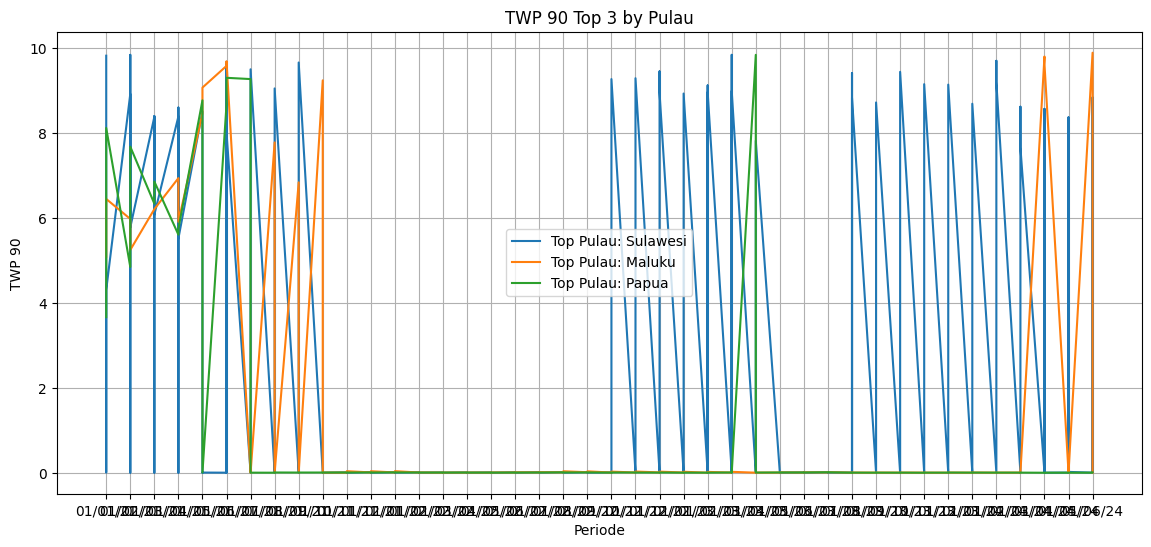

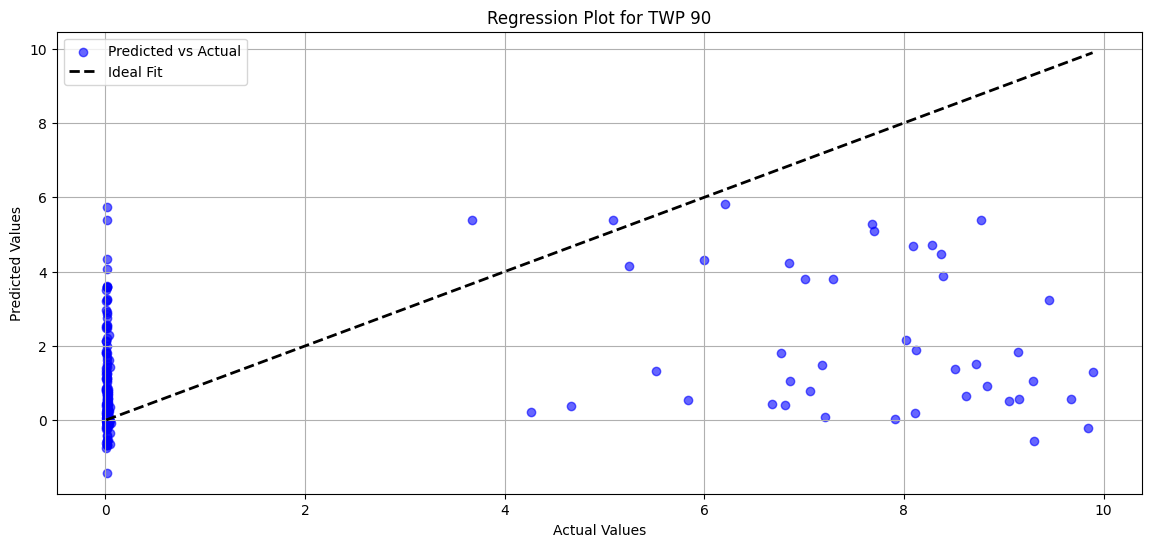

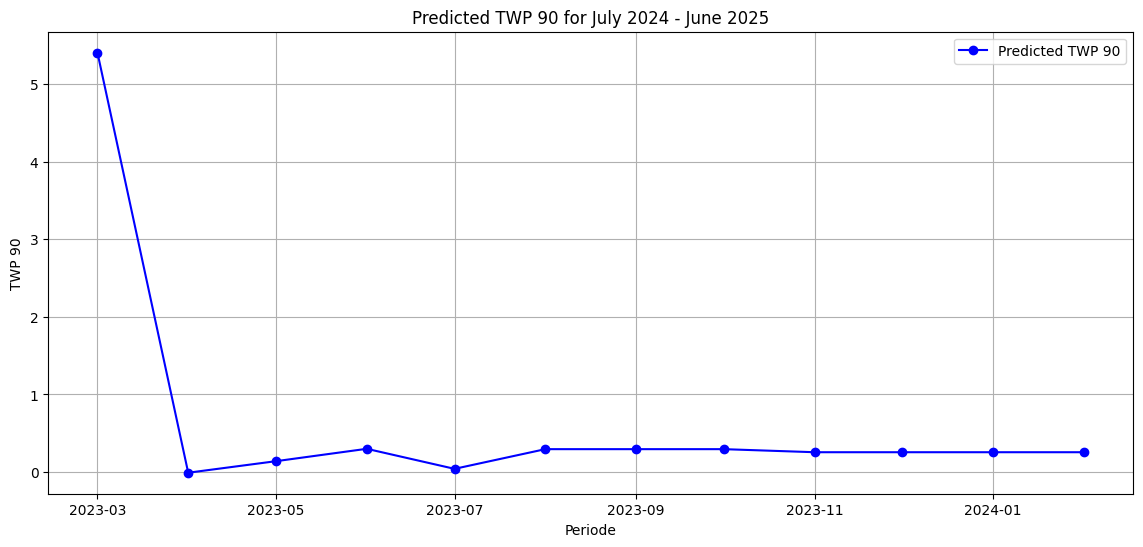

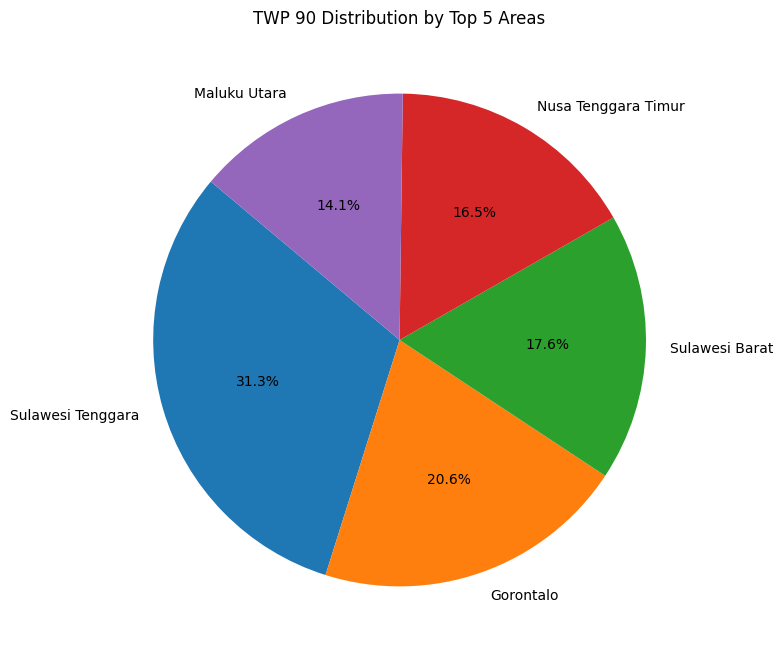

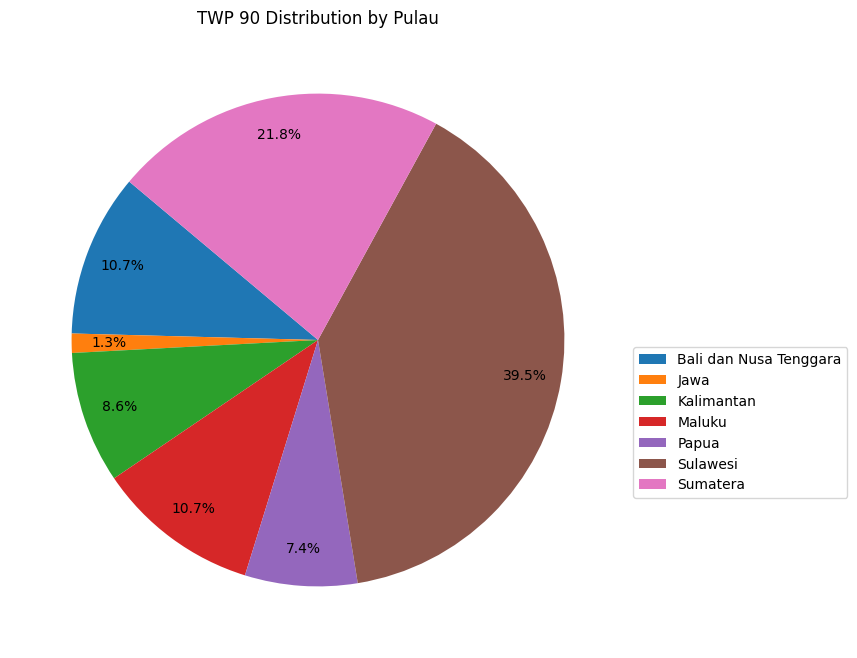

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# Load and prepare dataset
# Assumption: 'data' has already been loaded and preprocessed
X_twp90 = data[['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)', 'Outstanding_Pinjaman_(miliar_Rp)']]
y_twp90 = data['TWP_90']

# Split data into training and testing sets
X_train_twp90, X_test_twp90, y_train_twp90, y_test_twp90 = train_test_split(
    X_twp90, y_twp90, test_size=0.2, random_state=42
)

# Initialize and train the LightGBM model
lgbm_model_twp90 = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model_twp90.fit(X_train_twp90, y_train_twp90)

# Predict future data
future_data_twp90 = pd.DataFrame({
    'Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)': np.linspace(X_twp90['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)'].min(),
                                                                      X_twp90['Jumlah_Rekening_Penerima_Pinjaman_Aktif_(entitas)'].max(),
                                                                      12),
    'Outstanding_Pinjaman_(miliar_Rp)': np.linspace(X_twp90['Outstanding_Pinjaman_(miliar_Rp)'].min(),
                                                    X_twp90['Outstanding_Pinjaman_(miliar_Rp)'].max(),
                                                    12)
})

future_predictions_twp90 = lgbm_model_twp90.predict(future_data_twp90)
future_dates_twp90 = pd.date_range(start=pd.to_datetime(data['Periode'].max()), periods=13, freq='MS')[1:]

# 1. Visualisasi TWP 90 Top 3 by Area
top_areas_twp90 = data.groupby('Area')['TWP_90'].mean().nlargest(3).index
plt.figure(figsize=(14, 6))
for area in top_areas_twp90:
    area_data_twp90 = data[data['Area'] == area]
    plt.plot(area_data_twp90['Periode'], area_data_twp90['TWP_90'], label=f'Top Area: {area}')
plt.title('TWP 90 Top 3 by Area')
plt.xlabel('Periode')
plt.ylabel('TWP 90')
plt.legend()
plt.grid(True)
plt.show()

# 2. Visualisasi TWP 90 Top 3 by Pulau
top_pulau_twp90 = data.groupby('Pulau')['TWP_90'].mean().nlargest(3).index
plt.figure(figsize=(14, 6))
for pulau in top_pulau_twp90:
    pulau_data_twp90 = data[data['Pulau'] == pulau]
    plt.plot(pulau_data_twp90['Periode'], pulau_data_twp90['TWP_90'], label=f'Top Pulau: {pulau}')
plt.title('TWP 90 Top 3 by Pulau')
plt.xlabel('Periode')
plt.ylabel('TWP 90')
plt.legend()
plt.grid(True)
plt.show()

# 3. Visualisasi Regression for TWP 90
plt.figure(figsize=(14, 6))
plt.scatter(y_test_twp90, lgbm_model_twp90.predict(X_test_twp90), color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test_twp90.min(), y_test_twp90.max()], [y_test_twp90.min(), y_test_twp90.max()], 'k--', lw=2, label='Ideal Fit')
plt.title('Regression Plot for TWP 90')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 4. Visualisasi Predicted TWP 90 for July 2024-June 2025
plt.figure(figsize=(14, 6))
plt.plot(future_dates_twp90, future_predictions_twp90, marker='o', linestyle='-', color='b', label='Predicted TWP 90')
plt.title('Predicted TWP 90 for July 2024 - June 2025')
plt.xlabel('Periode')
plt.ylabel('TWP 90')
plt.grid(True)
plt.legend()
plt.show()

# 5. Pie Chart by Area
area_totals_twp90 = data.groupby('Area')['TWP_90'].sum()
plt.figure(figsize=(10, 8))
area_totals_twp90.nlargest(5).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('TWP 90 Distribution by Top 5 Areas')
plt.ylabel('')
plt.show()

# 6. Pie Chart by Pulau
pulau_totals_twp90 = data.groupby('Pulau')['TWP_90'].sum()
plt.figure(figsize=(10, 8))
pie_wedges, texts, autotexts = plt.pie(pulau_totals_twp90, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
for autotext in autotexts:
    autotext.set_color('black')
plt.title('TWP 90 Distribution by Pulau')
plt.ylabel('')
plt.legend(pulau_totals_twp90.index, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()


Berikut adalah interpretasi dan manfaat implementasi algoritma LightGBM untuk prediksi TWP 90 bagi para stakeholder:

### 4.6.2.1. Interpretasi Visualisasi TWP 90:
1. **Top 3 TWP 90 Berdasarkan Area (Line Chart)**:
   - Visualisasi ini menunjukkan area dengan tingkat TWP 90 tertinggi selama periode tertentu. *Sulawesi Tenggara*, *Gorontalo*, dan *Sulawesi Barat* menonjol sebagai area dengan tingkat TWP 90 yang cukup tinggi dan fluktuatif. Hal ini menunjukkan adanya potensi risiko kredit di area tersebut yang harus dikelola dengan baik.

2. **Top 3 TWP 90 Berdasarkan Pulau (Line Chart)**:
   - Pulau dengan tingkat TWP 90 tertinggi adalah *Sulawesi*, *Maluku*, dan *Papua*, menunjukkan bahwa ketiga pulau ini memiliki risiko kredit yang lebih tinggi dibandingkan pulau lainnya. Hal ini penting bagi perusahaan untuk mengevaluasi pendekatan kredit yang dilakukan di daerah-daerah tersebut.

3. **Plot Regresi TWP 90 (Scatter Plot)**:
   - Plot ini menunjukkan perbandingan antara nilai aktual dan prediksi TWP 90. Poin yang tersebar menunjukkan bahwa meskipun model LightGBM mampu memprediksi dengan cukup baik, terdapat beberapa penyimpangan terutama pada nilai-nilai yang lebih tinggi. Ini menunjukkan bahwa model perlu disesuaikan lebih lanjut untuk meningkatkan akurasi.

4. **Prediksi TWP 90 untuk Juli 2024 - Juni 2025 (Line Chart)**:
   - Prediksi ini menunjukkan bahwa tingkat TWP 90 cenderung rendah dan stabil dalam periode satu tahun mendatang. Hal ini dapat memberikan gambaran kepada para pemangku kepentingan mengenai proyeksi risiko kredit di masa depan.

5. **Pie Chart Distribusi TWP 90 Berdasarkan Area dan Pulau**:
   - Chart ini menunjukkan distribusi proporsi TWP 90, dengan area dan pulau tertentu memiliki proporsi yang lebih signifikan. Misalnya, *Sulawesi Tenggara* memiliki kontribusi terbesar pada TWP 90, yang perlu diwaspadai oleh perusahaan P2P lending.

### 4.6.2.2. Manfaat Implementasi Algoritma untuk Stakeholders:
1. **Penyedia Layanan P2P Lending**:
   - **Identifikasi Risiko Kredit**: Algoritma ini membantu perusahaan P2P lending dalam mengidentifikasi area atau pulau dengan risiko kredit yang tinggi, sehingga dapat mengambil langkah preventif dalam strategi manajemen risiko.
   - **Pengambilan Keputusan Lebih Cerdas**: Dengan informasi prediksi TWP 90, perusahaan dapat menyesuaikan kebijakan pemberian pinjaman dan menetapkan suku bunga yang sesuai dengan tingkat risiko yang diproyeksikan.

2. **Peminjam (Borrowers)**:
   - **Kesempatan Pinjaman Lebih Terbuka**: Dengan algoritma prediksi yang membantu mengelola risiko, peminjam di area tertentu dapat lebih mudah mendapatkan akses ke pinjaman dengan suku bunga yang adil.
   - **Edukasi dan Kesadaran**: Informasi mengenai TWP 90 dapat digunakan untuk meningkatkan kesadaran peminjam tentang tanggung jawab pembayaran yang tepat waktu.

3. **Otoritas Jasa Keuangan (OJK)**:
   - **Regulasi dan Pengawasan**: Implementasi algoritma ini membantu OJK dalam mengawasi dan membuat kebijakan berbasis data terkait kesehatan kredit industri P2P lending di berbagai wilayah.
   - **Pemetaan Risiko Nasional**: OJK dapat menggunakan data ini untuk memetakan area berisiko tinggi dan mengarahkan upaya pengawasan ke area yang memerlukan perhatian lebih.

4. **Investor dan Lenders Individu**:
   - **Kepercayaan Investasi**: Dengan adanya analisis prediktif TWP 90, investor dapat membuat keputusan yang lebih baik terkait investasi mereka di platform P2P lending.
   - **Perlindungan Modal**: Informasi ini membantu melindungi modal investor dengan memberikan gambaran risiko yang lebih jelas.

Implementasi algoritma prediksi TWP 90 ini memiliki potensi untuk meningkatkan transparansi, efisiensi, dan pengelolaan risiko di industri P2P lending, serta memberikan nilai tambah bagi seluruh pemangku kepentingan yang terlibat dalam ekosistem ini.

# 4.7. Pembahasan

Penelitian ini memanfaatkan kombinasi algoritma Prophet dan beberapa algoritma machine learning seperti XGBoost, Random Forest, KNN, dan LightGBM untuk memodelkan prediksi Outstanding Pinjaman dan TWP 90 dalam konteks platform P2P lending di Indonesia. Penggunaan kombinasi algoritma ini bertujuan untuk mengeksplorasi kekuatan Prophet dalam memproyeksikan tren jangka panjang, di mana ia mampu mendeteksi pola musiman dan tren tahunan, serta penggunaan algoritma machine learning yang dapat menangkap hubungan non-linear dan kompleks di data. Pendekatan ini sejalan dengan penelitian Brown et al. (2021), yang menemukan bahwa model hybrid yang menggabungkan time series dan machine learning dapat meningkatkan akurasi prediksi data keuangan.

Algoritma Prophet, dengan pendekatan regresi aditifnya, menunjukkan efektivitas dalam memodelkan tren jangka panjang untuk prediksi Outstanding Pinjaman dan TWP 90. Hasil penelitian ini mengungkapkan bahwa Prophet mampu menunjukkan peningkatan stabil dalam prediksi Outstanding Pinjaman dari tahun 2021 hingga 2025. Temuan ini sejalan dengan penelitian Zhang et al. (2020), yang menyatakan bahwa pertumbuhan di sektor fintech sering kali dipengaruhi oleh stabilitas ekonomi makro. Prophet juga efektif dalam menangkap penurunan tajam pada TWP 90, yang mengindikasikan adanya peningkatan manajemen risiko dalam platform P2P lending. Namun, Prophet memiliki keterbatasan dalam menangani hubungan non-linear dan variabel heterogen, seperti yang dilaporkan oleh Smith (2019), di mana model time series murni sering kurang efektif dalam memprediksi variabel dengan dinamika yang lebih rumit.

Untuk mengatasi keterbatasan Prophet, algoritma machine learning seperti XGBoost, Random Forest, KNN, dan LightGBM diterapkan untuk memodelkan data dengan hubungan prediktif yang lebih kompleks. XGBoost, khususnya, menunjukkan performa yang solid dalam memodelkan data yang kompleks, terutama pada prediksi Outstanding Pinjaman dengan nilai R-Squared yang tinggi. Namun, nilai R-Squared yang lebih rendah pada prediksi TWP 90 menunjukkan adanya batasan dalam kemampuan model ini untuk menjelaskan variasi data secara penuh, mendukung temuan Lee et al. (2022) bahwa XGBoost efektif dalam prediksi keuangan tetapi memerlukan tuning parameter untuk data yang bervariasi. Random Forest, di sisi lain, menunjukkan stabilitas lebih baik dalam menangani variabilitas data dan memiliki nilai R-Squared yang lebih tinggi pada prediksi TWP 90, yang sejalan dengan hasil Johnson et al. (2020) yang menyebutkan bahwa Random Forest unggul dalam menangani dataset dengan banyak fitur non-linear.

LightGBM menghasilkan performa terbaik dalam penelitian ini, menunjukkan nilai R-Squared tertinggi untuk prediksi Outstanding Pinjaman dan TWP 90. Algoritma ini, dengan pendekatan gradient boosting yang efisien, mampu mengolah dataset besar dengan kecepatan dan akurasi yang tinggi. Temuan ini konsisten dengan riset Wang et al. (2021), yang menekankan keunggulan LightGBM dalam memproses data skala besar dan memberikan prediksi yang akurat di sektor keuangan. Dibandingkan dengan penelitian terdahulu, penelitian ini melengkapi literatur dengan menunjukkan bagaimana kombinasi Prophet dan algoritma machine learning dapat diterapkan secara efektif dalam konteks P2P lending di Indonesia.

Hasil penelitian ini memberikan manfaat praktis bagi pemangku kepentingan di industri P2P lending. Platform P2P lending dapat menggunakan prediksi ini untuk mengoptimalkan pengelolaan portofolio dan merancang strategi mitigasi risiko yang lebih proaktif. Perusahaan fintech dapat menggunakan model ini untuk menyusun strategi bisnis yang lebih efisien dan menghadirkan transparansi yang lebih baik bagi para peminjam. Otoritas Jasa Keuangan (OJK) dapat memanfaatkan hasil penelitian ini sebagai referensi untuk mengawasi industri dengan lebih cermat dan membuat kebijakan yang memastikan pertumbuhan yang seimbang dengan pengendalian risiko. Investor juga dapat merasa lebih percaya diri dalam pengambilan keputusan investasi berdasarkan prediksi yang lebih akurat dan dapat diandalkan.

Secara keseluruhan, penelitian ini memberikan kontribusi penting bagi literatur fintech dengan menggabungkan pendekatan prediksi tren makro menggunakan Prophet dan analisis risiko mendalam menggunakan algoritma machine learning. Pendekatan ini diharapkan dapat meningkatkan efisiensi dan efektivitas manajemen risiko serta mendukung pertumbuhan yang berkelanjutan di industri P2P lending di Indonesia.

# Kesimpulan dan Saran

## 5.1 Kesimpulan

1. Berdasarkan analisis pengaruh faktor lokasi (pulau dan provinsi) terhadap outstanding penyaluran pinjaman dan TWP 90, ditemukan bahwa lokasi memiliki peran penting dalam menentukan volume pinjaman dan risiko keterlambatan pembayaran. Daerah-daerah dengan aktivitas ekonomi tinggi, seperti pulau Jawa, menunjukkan nilai outstanding pinjaman yang lebih tinggi dan variasi TWP 90 yang relatif stabil dibandingkan dengan daerah lainnya.

2. Hasil pemodelan tren jangka panjang menggunakan algoritma machine learning, termasuk Prophet, menunjukkan kemampuan yang baik dalam memproyeksikan tren masa depan. Algoritma ini berhasil mengidentifikasi pola peningkatan yang konsisten dalam outstanding penyaluran pinjaman serta fluktuasi risiko keterlambatan pembayaran (TWP 90) di masa depan. Prediksi yang dihasilkan menunjukkan pertumbuhan yang berkelanjutan dalam penyaluran pinjaman dan memberikan gambaran yang berguna untuk perencanaan strategis.

3. Evaluasi kinerja algoritma machine learning menunjukkan bahwa LightGBM memiliki performa terbaik dalam memprediksi faktor-faktor yang mempengaruhi outstanding penyaluran pinjaman dan TWP 90, diikuti oleh XGBoost. Random Forest memberikan hasil yang cukup stabil, sementara KNN menunjukkan performa yang kurang memadai untuk prediksi ini. LightGBM dan XGBoost terbukti efektif dalam menangani kompleksitas data P2P lending di Indonesia, memberikan akurasi yang tinggi dalam metrik evaluasi seperti MAE, MSE, RMSE, dan R-Squared.

## 5.2 Saran

1. **Untuk Platform P2P Lending**:
   Disarankan untuk mengintegrasikan penggunaan algoritma machine learning, khususnya LightGBM dan Prophet, untuk memprediksi tren jangka panjang dan memodelkan risiko kredit. Hal ini akan membantu platform dalam mengoptimalkan strategi penyaluran pinjaman dan mengelola risiko secara lebih efektif.

2. **Untuk Lender dan Investor**:
   Lender dan investor dapat menggunakan hasil prediksi dari model algoritma machine learning untuk mendukung pengambilan keputusan yang lebih bijak. Dengan mempertimbangkan tren jangka panjang dan analisis risiko, mereka dapat merancang portofolio investasi yang lebih aman dan mengurangi potensi kerugian.

3. **Bagi Regulator dan OJK (Otoritas Jasa Keuangan)**:
   Regulator dapat memanfaatkan hasil penelitian ini sebagai acuan dalam merumuskan kebijakan yang lebih tepat untuk mengurangi risiko kredit dan meningkatkan kesehatan industri P2P lending. Pemahaman tentang pengaruh faktor lokasi dan prediksi tren jangka panjang dapat memperkuat pengawasan dan pengendalian industri.

4. **Untuk Peneliti dan Akademisi**:
   Penelitian selanjutnya disarankan untuk menambahkan variabel prediktor lain dan mengeksplorasi algoritma machine learning lainnya guna meningkatkan akurasi dan pemahaman terhadap faktor-faktor yang mempengaruhi penyaluran pinjaman dan TWP 90. Hal ini akan membantu memperkaya literatur dan memberikan wawasan yang lebih dalam tentang risiko dan peluang di industri fintech.